# Insurance Claims- Fraud Detection

Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
#Importing libraries for data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Data from Github 
df = pd.read_csv("Automobile_insurance_fraud.csv")

df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

Getting insights about our data

In [3]:
#Number of rows and columns
df.shape

(1000, 40)

In the dataset , there are 1000 rows and 40 columns.

In [4]:
#Column Names in our dataset
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
#Information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
#Data Types of our features in our dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In the above cell we can see the first 5 and last 5 rows of our dataset. We see that in our dataset there are a total of 1000 rows and 40 columns present. We see a mixture of numerical data columns and text data columns that will need to be converted to numerical format before training our model. Also the problem statement says that we are suppose to predict the fraud reported column so it makes this to be a Classification problem!

Handle Missing Values

In [7]:
#Check for missing values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

The column _c39 is not required for our model.

In [8]:
#Drop _c39
df.drop(['_c39'],axis=1,inplace=True)

I am dropping the "policy_number" and "incident_location" columns since I feel it is pretty much useless showing just a list of unique identifiers on each row without adding much insight into the prediction of our target label.

In [9]:
#Updated dataset
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [10]:
#Statistical Analysis of our dataset
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

<AxesSubplot:>

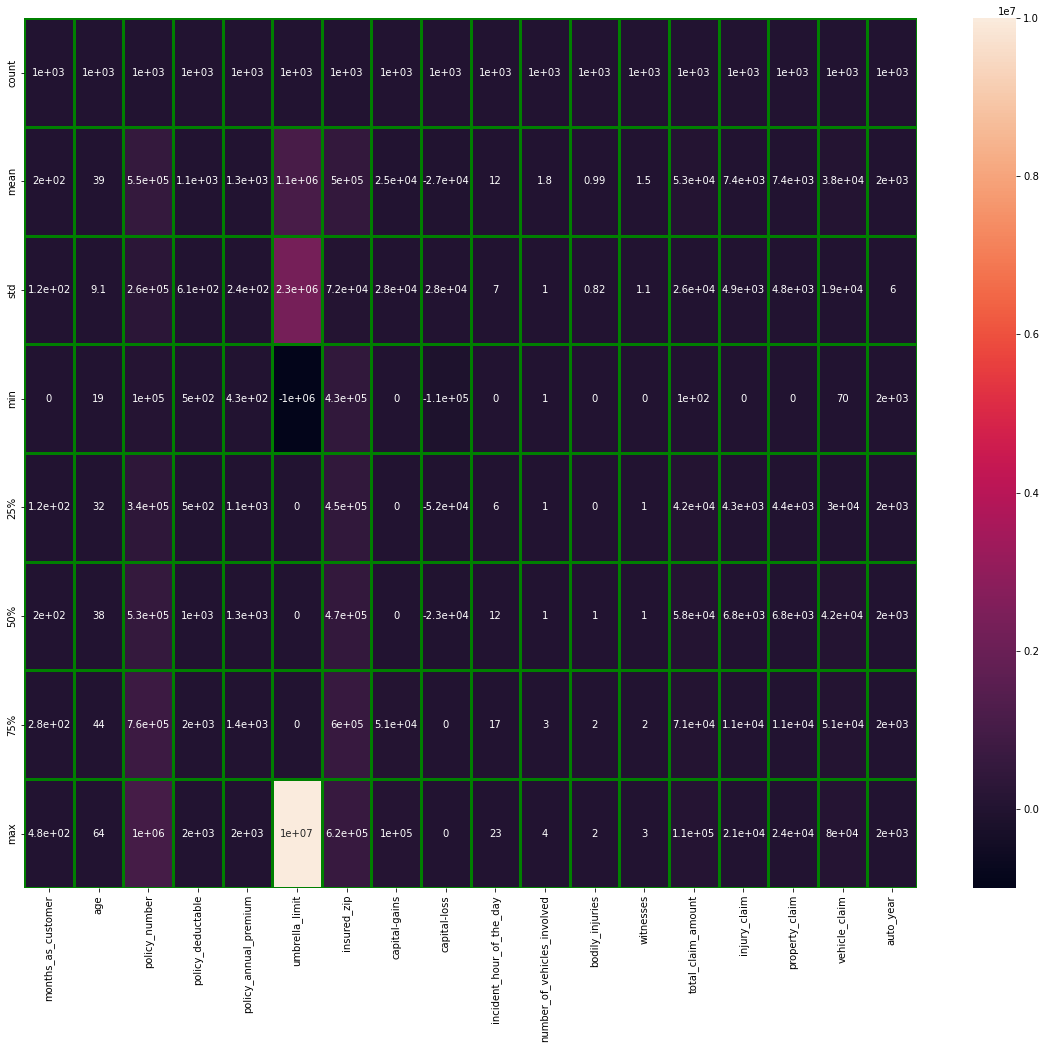

In [11]:
#Graphical method
plt.figure(figsize=(20,16))
sns.heatmap(df.describe(),annot=True,linecolor='green',linewidths=3)

df.describe function gives a good picture of the distribution of our data

In [12]:
#Gives the count of the distinct elements
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Using the nunique method we are able to list down all the unique values present in our dataset columns. I do not see any column with one single unique value either so that is good. However there are 2 columns which have all the 1000 rows filled with unique data that will need to be removed as it won't help in our label prediction anyway.

Now I will start with the visualization part.

# Univariate Analysis

Data consists of only one variable. The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes. It does not deal with causes or relationships and the main purpose of the analysis is to describe the data and find patterns that exist within it.

But before doing anything, I will separate the dataset into numerical and categorical variables for better analysis of the data.

In [13]:
categorical_variables = df.select_dtypes(include=['O'])

categorical_variables.head()

policy_bind_date policy_state policy_csl insured_sex  \
0       17-10-2014           OH    250/500        MALE   
1       27-06-2006           IN    250/500        MALE   
2       06-09-2000           OH    100/300      FEMALE   
3       25-05-1990           IL    250/500      FEMALE   
4       06-06-2014           IL   500/1000        MALE   

  insured_education_level insured_occupation insured_hobbies  \
0                      MD       craft-repair        sleeping   
1                      MD  machine-op-inspct         reading   
2                     PhD              sales     board-games   
3                     PhD       armed-forces     board-games   
4               Associate              sales     board-games   

  insured_relationship incident_date             incident_type  ...  \
0              husband    25-01-2015  Single Vehicle Collision  ...   
1       other-relative    21-01-2015             Vehicle Theft  ...   
2            own-child    22-02-2015   Multi-vehicle Collision  ...   
3            unmarried    10-01-2015  Single Vehicle Collision  ...   
4            unmarried    17-02-2015             Vehicle Theft  ...   

  incident_severity authorities_contacted incident_state incident_city  \
0      Major Damage                Police             SC      Columbus   
1      Minor Damage                Police             VA     Riverwood   
2      Minor Damage                Police             NY      Columbus   
3      Major Damage                Police             OH     Arlington   
4      Minor Damage                  None             NY     Arlington   

   incident_location property_damage police_report_available  auto_make  \
0     9935 4th Drive             YES                     YES       Saab   
1       6608 MLK Hwy               ?                       ?   Mercedes   
2  7121 Francis Lane              NO                      NO      Dodge   
3   6956 Maple Drive               ?                      NO  Chevrolet   
4       3041 3rd Ave              NO                      NO     Accura   

  auto_model fraud_reported  
0        92x              Y  
1       E400              Y  
2        RAM              N  
3      Tahoe              Y  
4        RSX              N  

[5 rows x 21 columns]

In [14]:
#Find the frequency values of each feature which are of categorical data type
for col in categorical_variables:
    c = df[col].value_counts()
    print(c)
    print("--"*50)


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
----------------------------------------------------------------------------------------------------
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
----------------------------------------------------------------------------------------------------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
----------------------------------------------------------------------------------------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
----------------------------------------------------------------------------------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtyp

Checking the number of rows covered by all the unique values present in our object data type columns. My observations from this are:

policy_bind_date has date related data
incident_date again has date related data
These two columns are marked as object data type but they hold date related information and will need to be handled accordingly.

Also we see rows that are filled with a "?" data in the below columns:

collision_type

property_damage

police_report_available

I will start with the count plot to check for frequency of class in each features.

<AxesSubplot:xlabel='policy_bind_date', ylabel='count'>

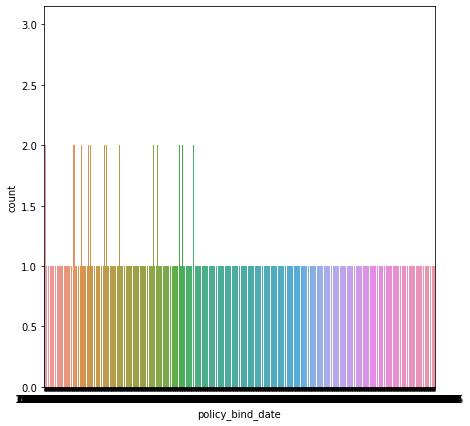

In [15]:
plt.figure(figsize=(7,7))
sns.countplot(df['policy_bind_date'])

<AxesSubplot:xlabel='policy_state', ylabel='count'>

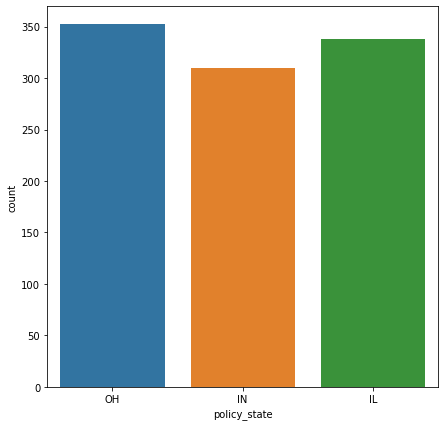

In [16]:
plt.figure(figsize=(7,7))
sns.countplot(df['policy_state'])

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

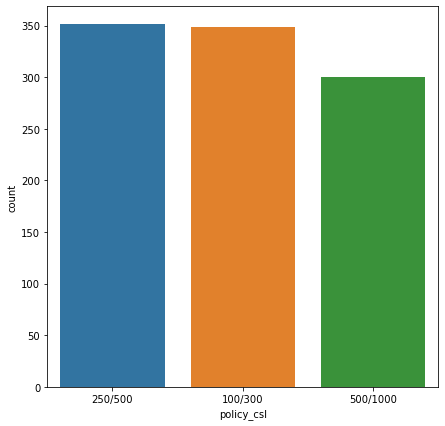

In [17]:
plt.figure(figsize=(7,7))
sns.countplot(df['policy_csl'])

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

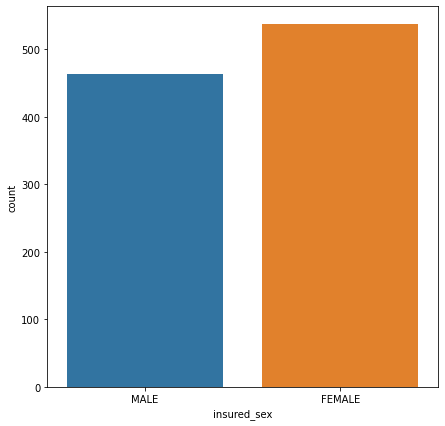

In [18]:
plt.figure(figsize=(7,7))
sns.countplot(df['insured_sex'])

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

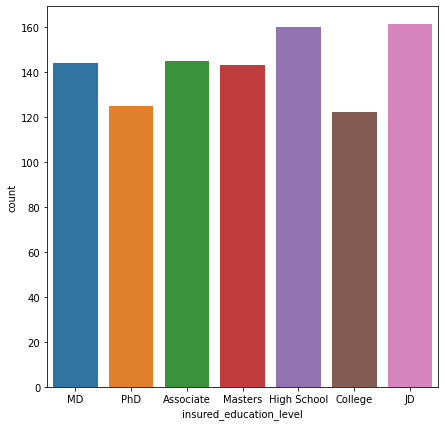

In [19]:
plt.figure(figsize=(7,7))
sns.countplot(df['insured_education_level'])

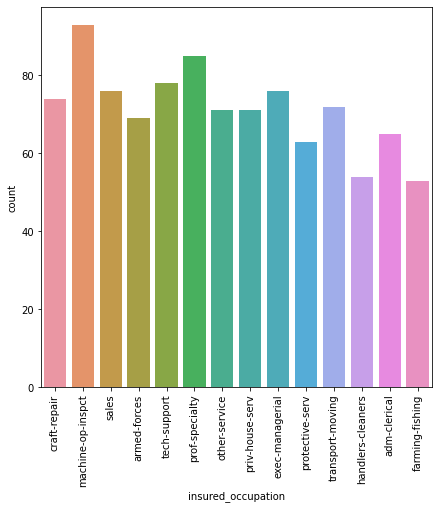

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(df['insured_occupation'])
plt.xticks(rotation=90)
plt.show()

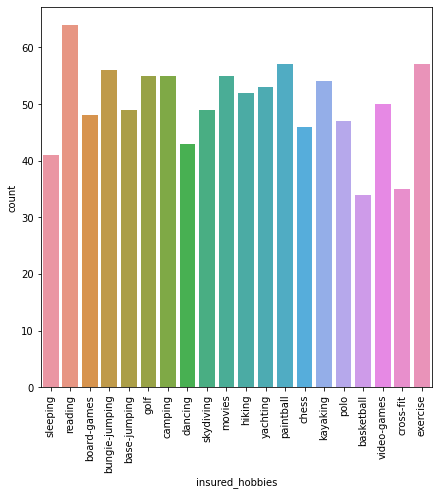

In [21]:
plt.figure(figsize=(7,7))
sns.countplot(df['insured_hobbies'])
plt.xticks(rotation=90)
plt.show()

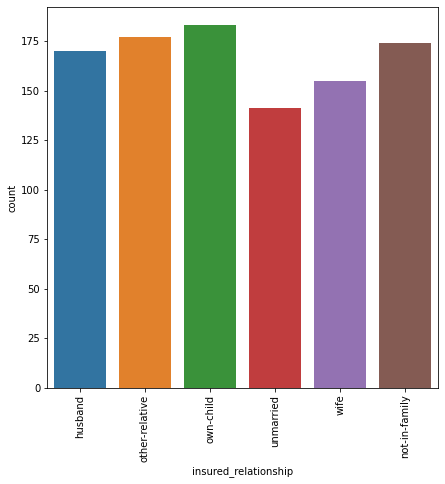

In [22]:
plt.figure(figsize=(7,7))
sns.countplot(df['insured_relationship'])
plt.xticks(rotation=90)
plt.show()

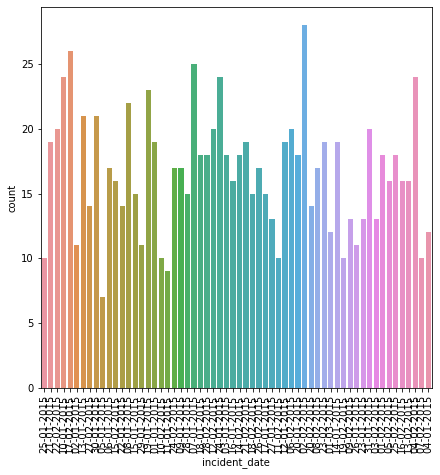

In [23]:
plt.figure(figsize=(7,7))
sns.countplot(df['incident_date'])
plt.xticks(rotation=90)
plt.show()

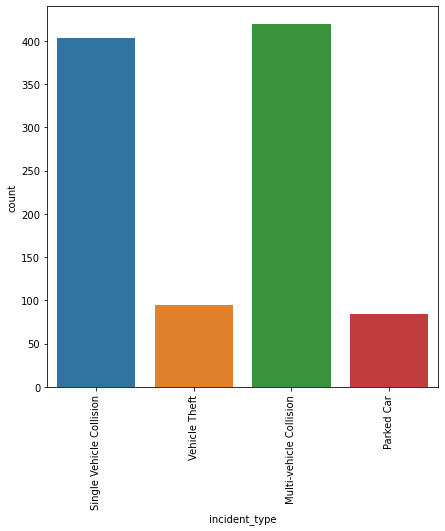

In [24]:
plt.figure(figsize=(7,7))
sns.countplot(df['incident_type'])
plt.xticks(rotation=90)
plt.show()

In [25]:
categorical_variables.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

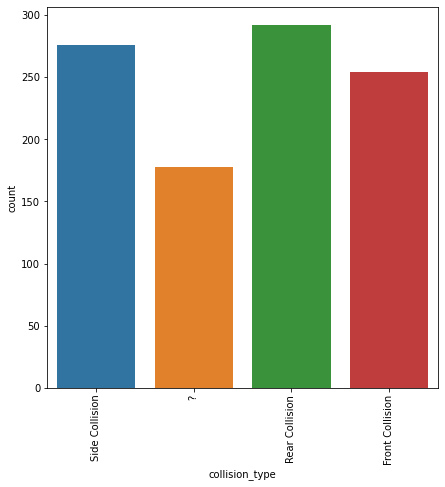

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(df['collision_type'])
plt.xticks(rotation=90)
plt.show()

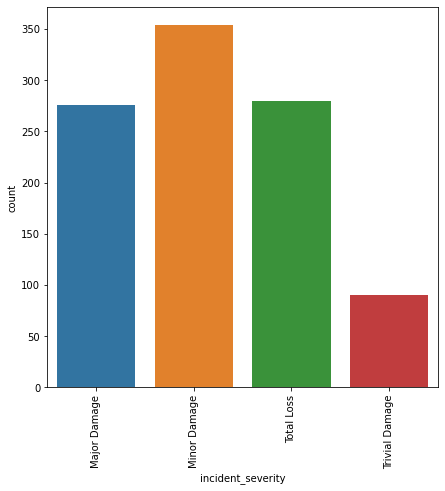

In [27]:
plt.figure(figsize=(7,7))
sns.countplot(df['incident_severity'])
plt.xticks(rotation=90)
plt.show()

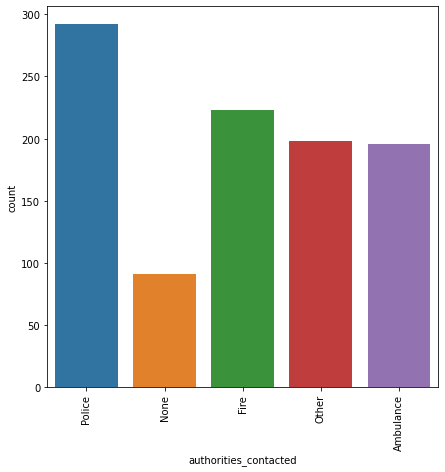

In [28]:
plt.figure(figsize=(7,7))
sns.countplot(df['authorities_contacted'])
plt.xticks(rotation=90)
plt.show()

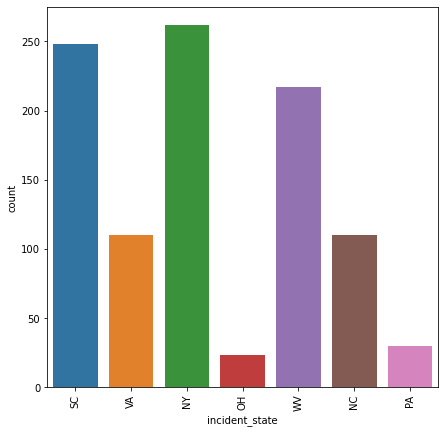

In [29]:
plt.figure(figsize=(7,7))
sns.countplot(df['incident_state'])
plt.xticks(rotation=90)
plt.show()

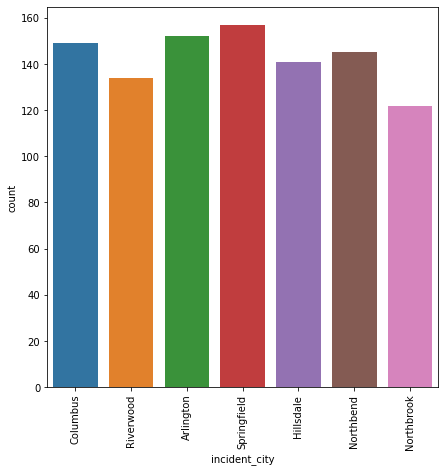

In [30]:
plt.figure(figsize=(7,7))
sns.countplot(df['incident_city'])
plt.xticks(rotation=90)
plt.show()

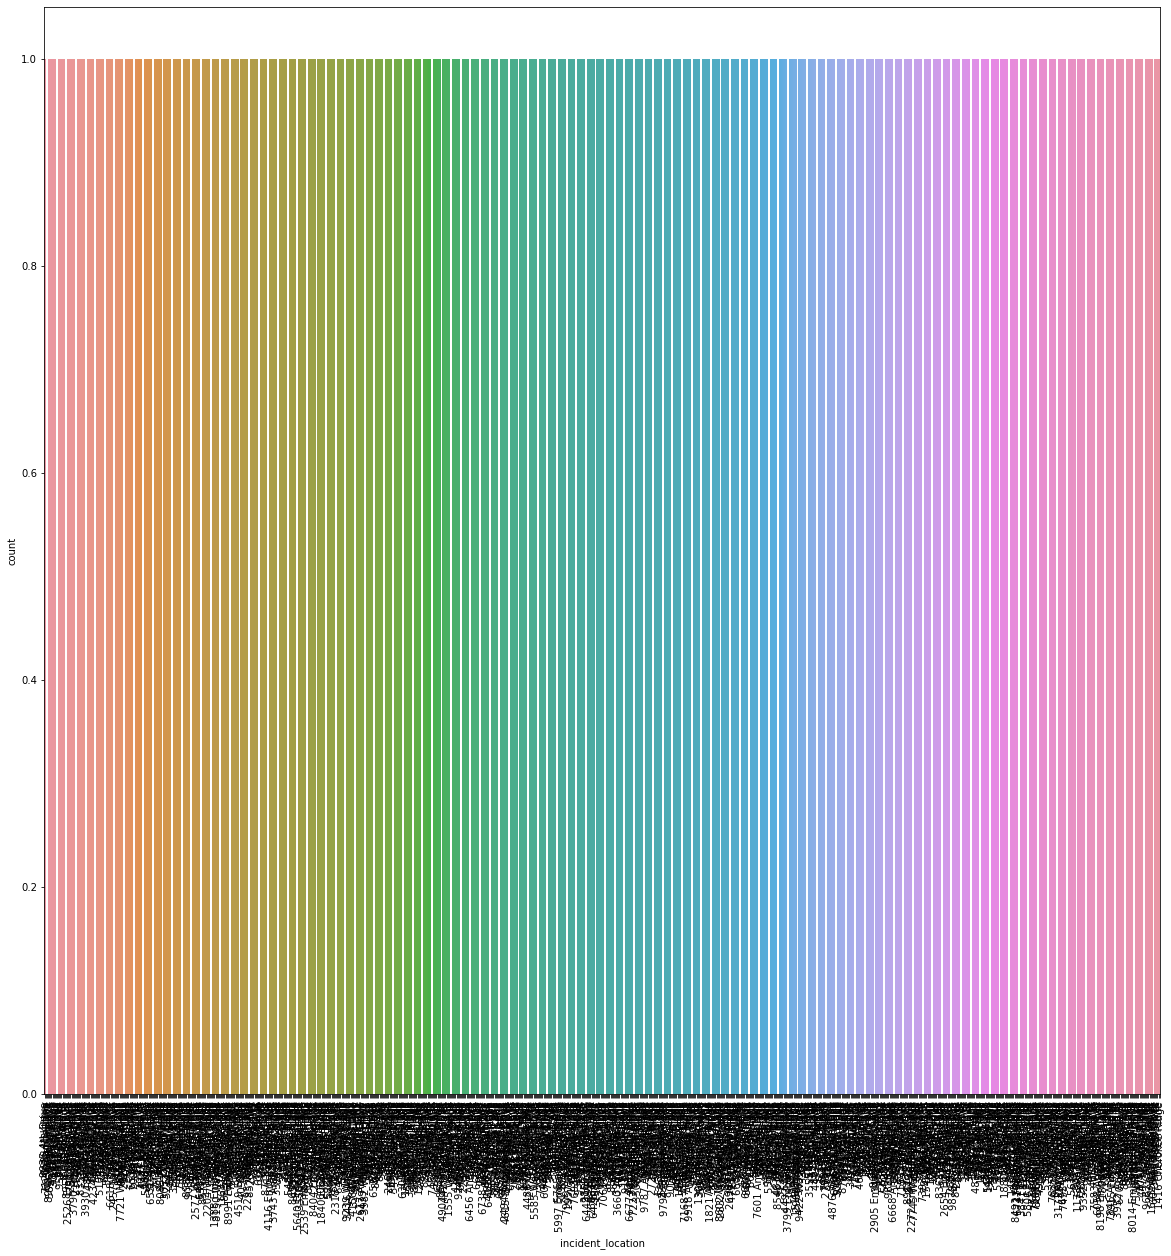

In [31]:
plt.figure(figsize=(20,20))
sns.countplot(df['incident_location'])
plt.xticks(rotation=90)
plt.show()

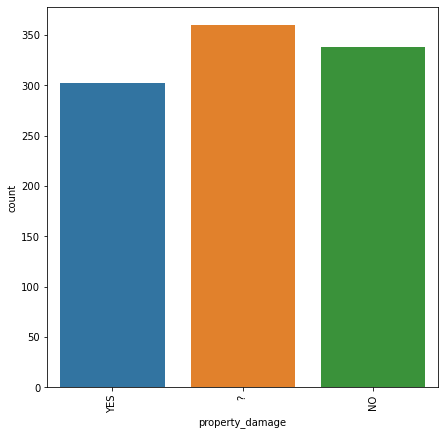

In [32]:
plt.figure(figsize=(7,7))
sns.countplot(df['property_damage'])
plt.xticks(rotation=90)
plt.show()

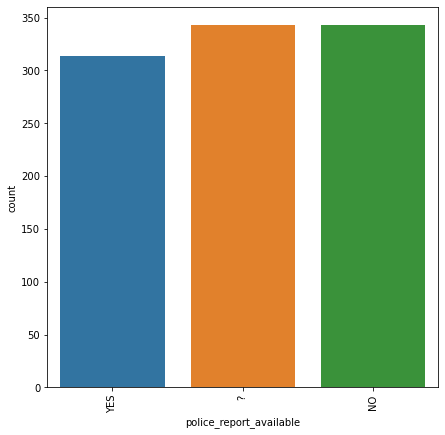

In [33]:
plt.figure(figsize=(7,7))
sns.countplot(df['police_report_available'])
plt.xticks(rotation=90)
plt.show()

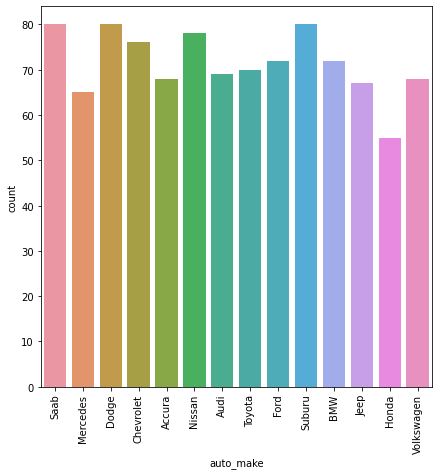

In [34]:
plt.figure(figsize=(7,7))
sns.countplot(df['auto_make'])
plt.xticks(rotation=90)
plt.show()

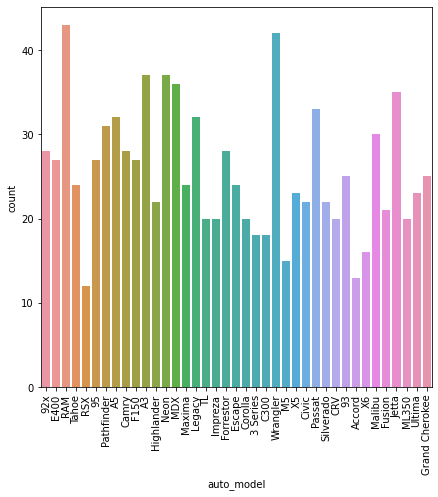

In [35]:
plt.figure(figsize=(7,7))
sns.countplot(df['auto_model'])
plt.xticks(rotation=90)
plt.show()

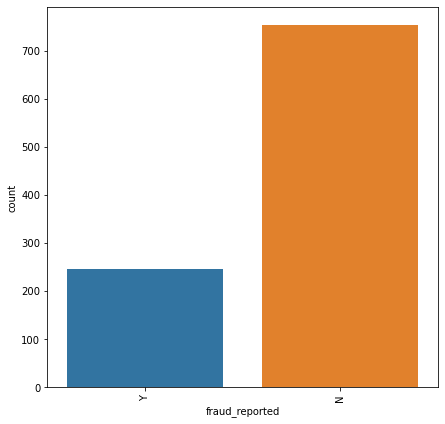

In [36]:
plt.figure(figsize=(7,7))
sns.countplot(df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

In the above count plots we can see the categorical data distribution among the dataset rows covering double digit category in a set number of data points for each value.

My observations:

we see that the umbrella limit is the highest for the number 0 than any other value listed in that column
with respect to occupation of all the insured people we see the highest data coverage by machine operation inspector and professional speciality designations
taking a look at vehicle companies we see a higher scale of data for saab, dodge, nissan, suburu and volkswagen
the listeing of hobbies held by insured people has the highest data coverage on reading
if we take a look at the vehicle models that were registered for incidents then we see lots of data rows covered by RAM and Wrangler automobile models

In [37]:
numerical_variables = df.select_dtypes(include=['number'])
numerical_variables.shape

(1000, 18)

In [38]:
numerical_variables

months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
..                  ...  ...            ...                ...   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940               2000   
999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1413.14         5000000       430632          35100   
3                  1415.74         6000000       608117          48900   
4                  1583.91         6000000       610706          66000   
..                     ...             ...          ...            ...   
995                1310.80               0       431289              0   
996                1436.79               0       608177          70900   
997                1383.49         3000000       442797          35100   
998                1356.92         5000000       441714              0   
999                 766.19               0       612260              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0               0                         5                            1   
1               0                         8                            1   
2               0                         7                            3   
3          -62400                         5                            1   
4          -46000                        20                            1   
..            ...                       ...                          ...   
995             0                        20                            1   
996             0                        23                            1   
997             0                         4                            3   
998             0                         2                            1   
999             0                         6                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  auto_year  
0             13020          52080       2004  
1               780           3510       2007  
2              3850          23100       2007  
3              6340          50720       2014  
4               650           4550       2009  
..              ...            ...        ...  
995            8720          61040       2006  
996           18080          72320       2015  
997            7500          52500       1996  
998            5220          36540       1998  
999             920           3680       2007  

[100

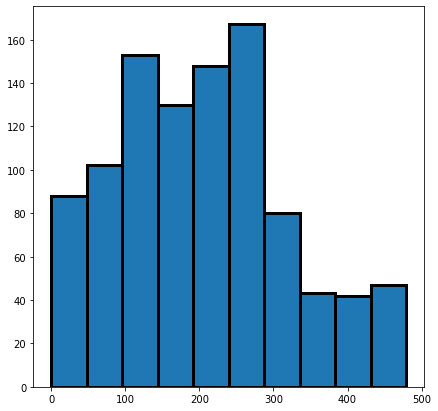

In [39]:
plt.figure(figsize=(7,7))
plt.hist(df['months_as_customer'],edgecolor='black',linewidth=3)
plt.show()

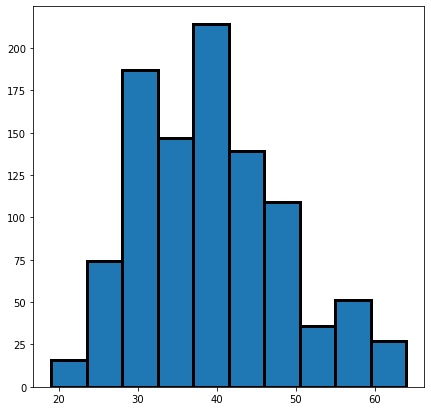

In [40]:
plt.figure(figsize=(7,7))
plt.hist(df['age'],edgecolor='black',linewidth=3)
plt.show()

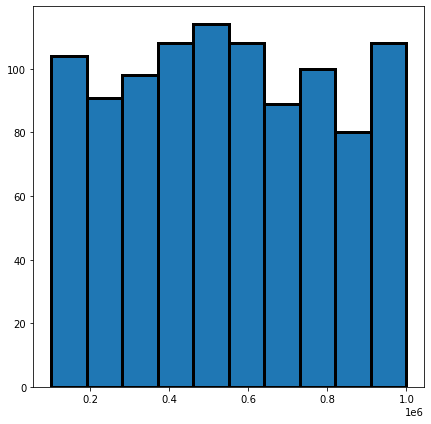

In [41]:
plt.figure(figsize=(7,7))
plt.hist(df['policy_number'],edgecolor='black',linewidth=3)
plt.show()

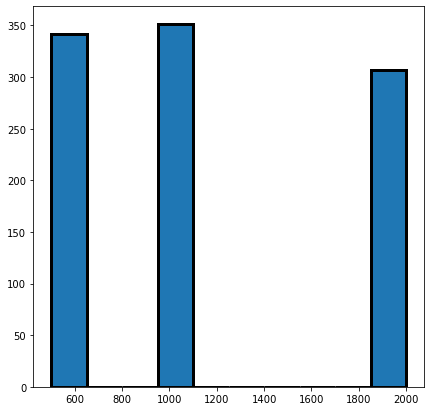

In [42]:
plt.figure(figsize=(7,7))
plt.hist(df['policy_deductable'],edgecolor='black',linewidth=3)
plt.show()

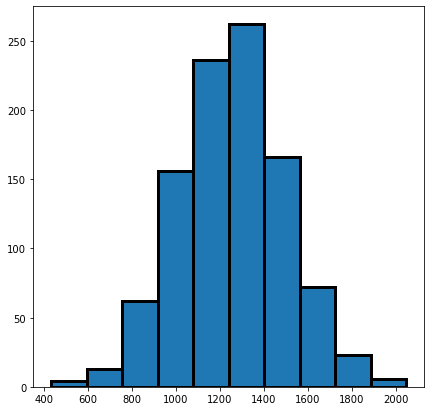

In [43]:
plt.figure(figsize=(7,7))
plt.hist(df['policy_annual_premium'],edgecolor='black',linewidth=3)
plt.show()

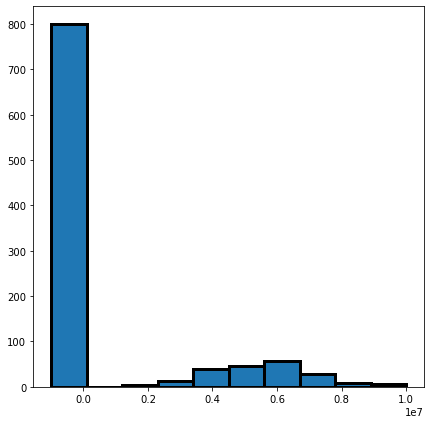

In [44]:
plt.figure(figsize=(7,7))
plt.hist(df['umbrella_limit'],edgecolor='black',linewidth=3)
plt.show()

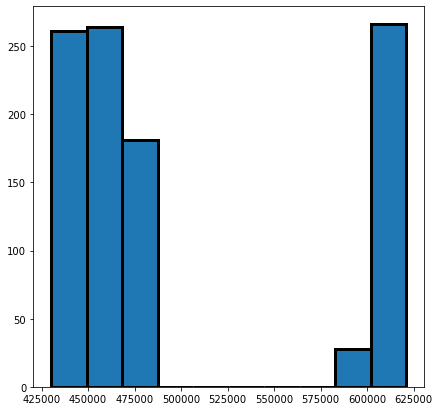

In [45]:
plt.figure(figsize=(7,7))
plt.hist(df['insured_zip'],edgecolor='black',linewidth=3)
plt.show()

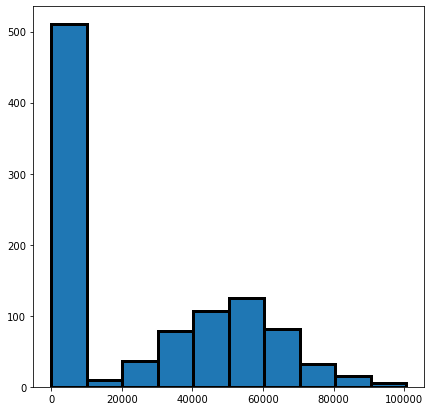

In [46]:
plt.figure(figsize=(7,7))
plt.hist(df['capital-gains'],edgecolor='black',linewidth=3)
plt.show()

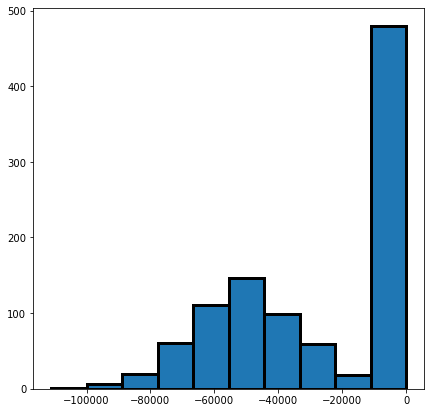

In [47]:
plt.figure(figsize=(7,7))
plt.hist(df['capital-loss'],edgecolor='black',linewidth=3)
plt.show()

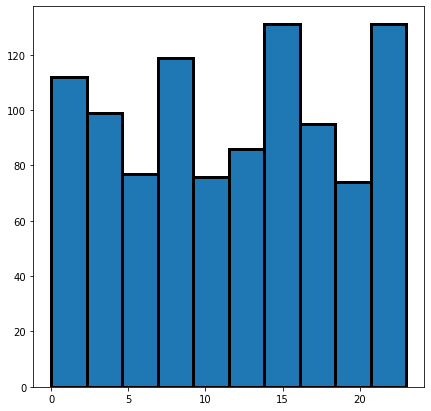

In [48]:
plt.figure(figsize=(7,7))
plt.hist(df['incident_hour_of_the_day'],edgecolor='black',linewidth=3)
plt.show()

In [49]:
numerical_variables.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

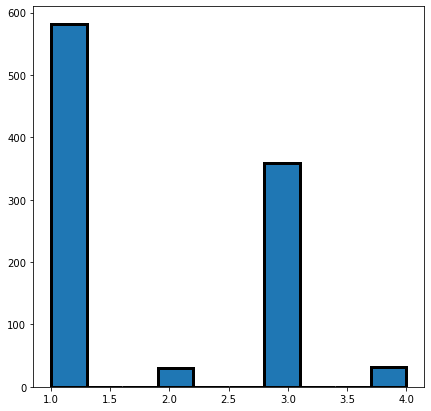

In [50]:
plt.figure(figsize=(7,7))
plt.hist(df['number_of_vehicles_involved'],edgecolor='black',linewidth=3)
plt.show()

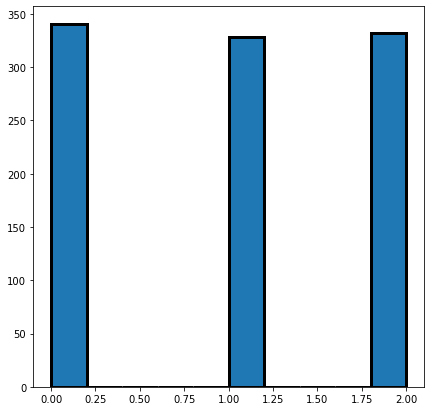

In [51]:
plt.figure(figsize=(7,7))
plt.hist(df['bodily_injuries'],edgecolor='black',linewidth=3)
plt.show()

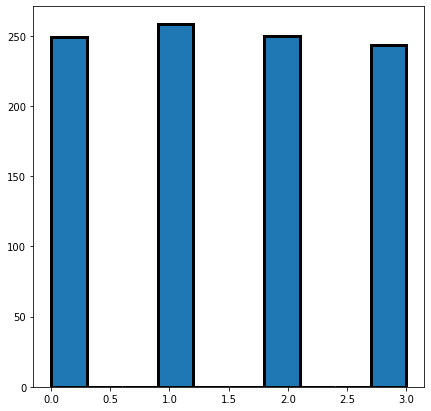

In [52]:
plt.figure(figsize=(7,7))
plt.hist(df['witnesses'],edgecolor='black',linewidth=3)
plt.show()

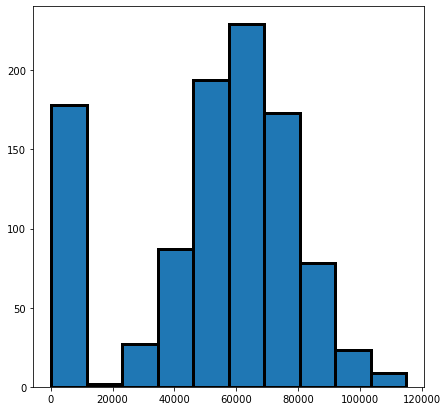

In [53]:
plt.figure(figsize=(7,7))
plt.hist(df['total_claim_amount'],edgecolor='black',linewidth=3)
plt.show()

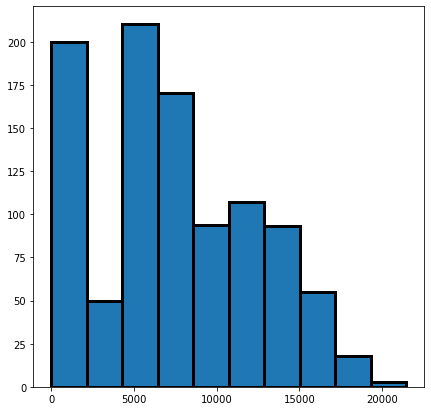

In [54]:
plt.figure(figsize=(7,7))
plt.hist(df['injury_claim'],edgecolor='black',linewidth=3)
plt.show()

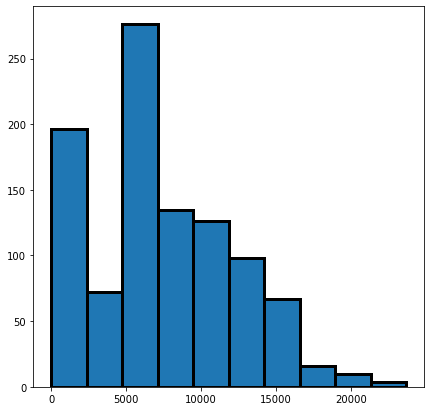

In [55]:
plt.figure(figsize=(7,7))
plt.hist(df['property_claim'],edgecolor='black',linewidth=3)
plt.show()

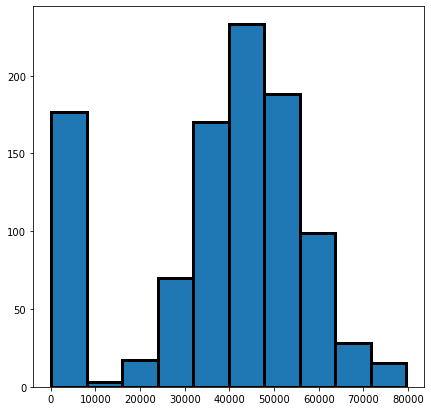

In [56]:
plt.figure(figsize=(7,7))
plt.hist(df['vehicle_claim'],edgecolor='black',linewidth=3)
plt.show()

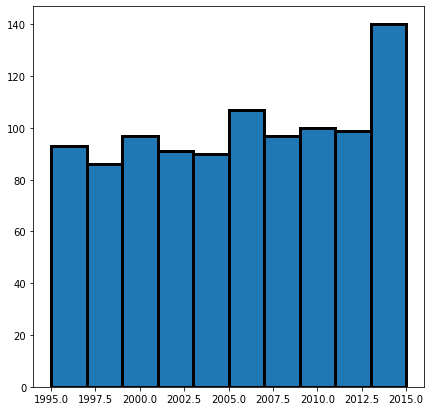

In [57]:
plt.figure(figsize=(7,7))
plt.hist(df['auto_year'],edgecolor='black',linewidth=3)
plt.show()

In categorical variables analysis , I have seen that some features have data ? which need to be removed or replaced

In [58]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [59]:
#Dropping ? in column collision_type
df.drop(df.index[df['collision_type']=='?'],inplace=True)

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


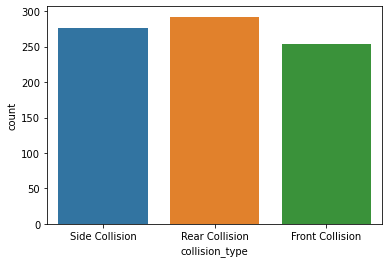

In [60]:
#Updated column
print(df['collision_type'].value_counts());
print(sns.countplot(df['collision_type']));

In [61]:
df['property_damage'].value_counts()

?      297
NO     273
YES    252
Name: property_damage, dtype: int64

In [62]:
#Dropping ? in column property_damage
df.drop(df.index[df['property_damage']=='?'],inplace=True)

NO     273
YES    252
Name: property_damage, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


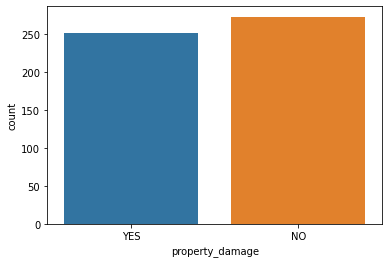

In [63]:
#Updated column
print(df['property_damage'].value_counts());
print(sns.countplot(df['property_damage']));

In [64]:
df['police_report_available'].value_counts()

NO     186
?      185
YES    154
Name: police_report_available, dtype: int64

In [65]:
#Dropping ? in column police_report_available
df.drop(df.index[df['police_report_available']=='?'],inplace=True)

NO     186
YES    154
Name: police_report_available, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


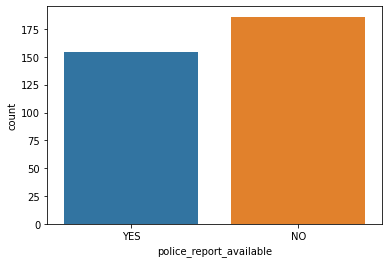

In [66]:
#Updated column
print(df['police_report_available'].value_counts());
print(sns.countplot(df['police_report_available']));

In [67]:
# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Year'] = df['policy_bind_date'].apply(lambda x:x.year)

In [68]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                  328   48         521585       2014-10-17           OH   
2                  134   29         687698       2000-06-09           OH   
5                  256   39         104594       2006-12-10           OH   
8                   27   33         485665       1997-05-02           IL   
11                 447   61         214618       1999-05-29           OH   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0     250/500               1000                1406.91               0   
2     100/300               2000                1413.14         5000000   
5     250/500               1000                1351.10               0   
8     100/300                500                1442.99               0   
11    100/300               2000                1137.16               0   

    insured_zip  ... injury_claim property_claim vehicle_claim auto_make  \
0        466132  ...         6510          13020         52080      Saab   
2        430632  ...         7700           3850         23100     Dodge   
5        478456  ...         6410           6410         51280      Saab   
8        601734  ...         2770           2770         22160    Toyota   
11       615561  ...        17680          17680         79560      Audi   

   auto_model  auto_year  fraud_reported policy_bind_Day policy_bind_Month  \
0         92x       2004               Y              17                10   
2         RAM       2007               N               9                 6   
5          95       2003               Y              10                12   
8       Camry       2012               N               2                 5   
11         A3       2006               N              29                 5   

   policy_bind_Year  
0              2014  
2              2000  
5              2006  
8              1997  
11             1999  

[5 rows x 42 columns]

In [69]:
# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_Month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_Year'] = df['incident_date'].apply(lambda x:x.year)

In [70]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                  328   48         521585       2014-10-17           OH   
2                  134   29         687698       2000-06-09           OH   
5                  256   39         104594       2006-12-10           OH   
8                   27   33         485665       1997-05-02           IL   
11                 447   61         214618       1999-05-29           OH   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0     250/500               1000                1406.91               0   
2     100/300               2000                1413.14         5000000   
5     250/500               1000                1351.10               0   
8     100/300                500                1442.99               0   
11    100/300               2000                1137.16               0   

    insured_zip  ... auto_make auto_model auto_year fraud_reported  \
0        466132  ...      Saab        92x      2004              Y   
2        430632  ...     Dodge        RAM      2007              N   
5        478456  ...      Saab         95      2003              Y   
8        601734  ...    Toyota      Camry      2012              N   
11       615561  ...      Audi         A3      2006              N   

   policy_bind_Day  policy_bind_Month  policy_bind_Year incident_Day  \
0               17                 10              2014           25   
2                9                  6              2000           22   
5               10                 12              2006            1   
8                2                  5              1997           30   
11              29                  5              1999           15   

   incident_Month incident_Year  
0               1          2015  
2               2          2015  
5               2          2015  
8               1          2015  
11              2          2015  

[5 rows x 45 columns]

In [71]:
# dropping the original Date columns after separating the desired outputs
df.drop(columns = ['policy_bind_date','incident_date'], axis=1, inplace=True)

In [72]:
df.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                  328   48         521585           OH    250/500   
2                  134   29         687698           OH    100/300   
5                  256   39         104594           OH    250/500   
8                   27   33         485665           IL    100/300   
11                 447   61         214618           OH    100/300   

    policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                1000                1406.91               0       466132   
2                2000                1413.14         5000000       430632   
5                1000                1351.10               0       478456   
8                 500                1442.99               0       601734   
11               2000                1137.16               0       615561   

   insured_sex  ... auto_make auto_model auto_year fraud_reported  \
0         MALE  ...      Saab        92x      2004              Y   
2       FEMALE  ...     Dodge        RAM      2007              N   
5       FEMALE  ...      Saab         95      2003              Y   
8       FEMALE  ...    Toyota      Camry      2012              N   
11      FEMALE  ...      Audi         A3      2006              N   

    policy_bind_Day  policy_bind_Month policy_bind_Year incident_Day  \
0                17                 10             2014           25   
2                 9                  6             2000           22   
5                10                 12             2006            1   
8                 2                  5             1997           30   
11               29                  5             1999           15   

   incident_Month incident_Year  
0               1          2015  
2               2          2015  
5               2          2015  
8               1          2015  
11              2          2015  

[5 rows x 43 columns]

In [73]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [74]:
df.shape

(340, 43)

Bivariate Analysis

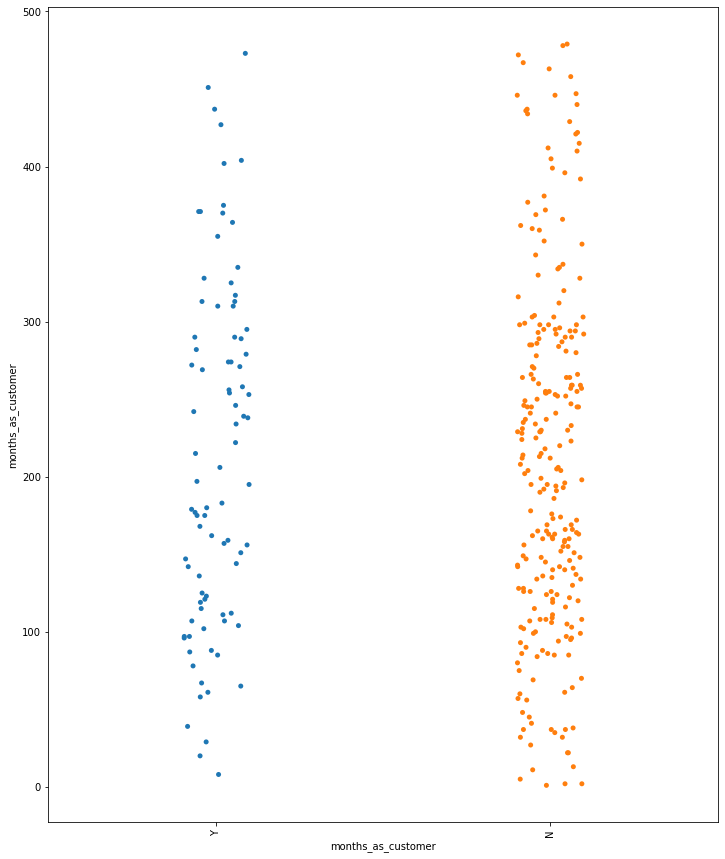

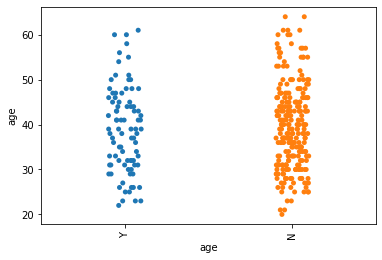

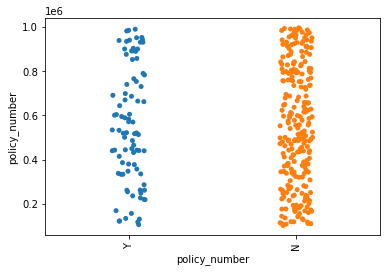

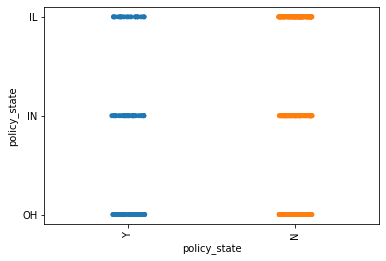

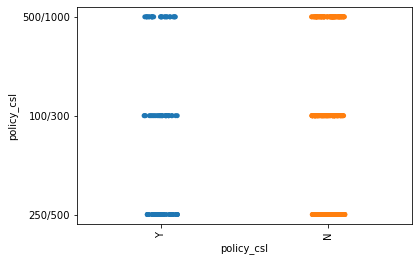

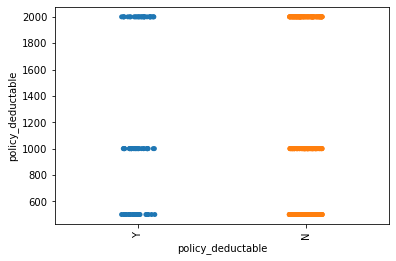

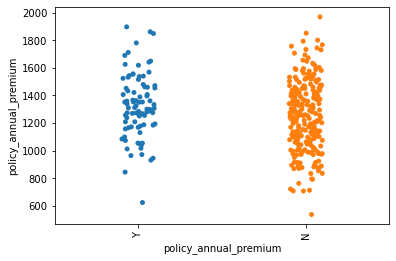

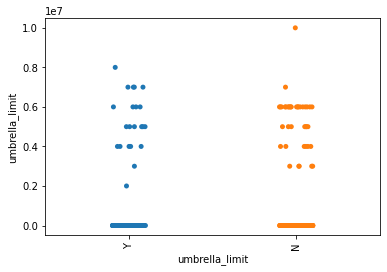

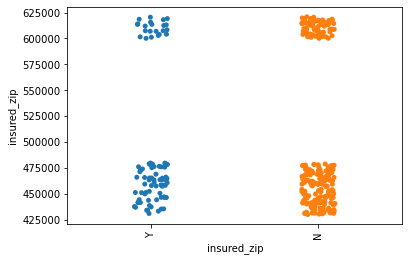

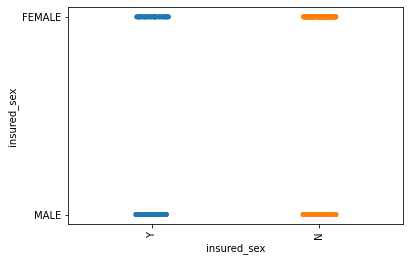

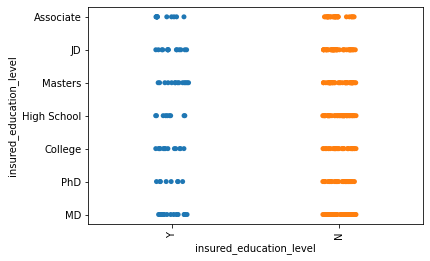

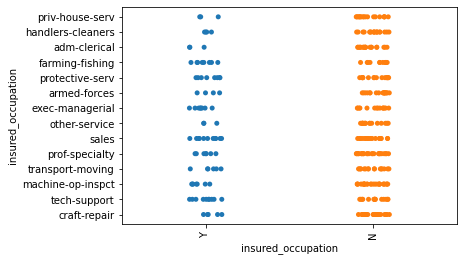

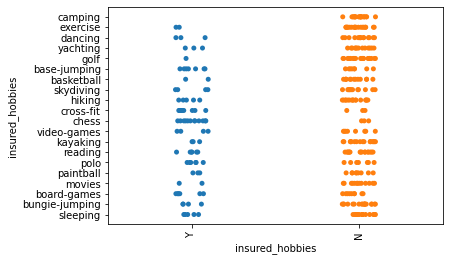

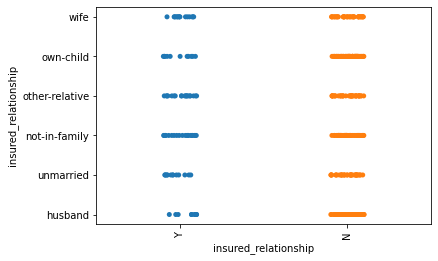

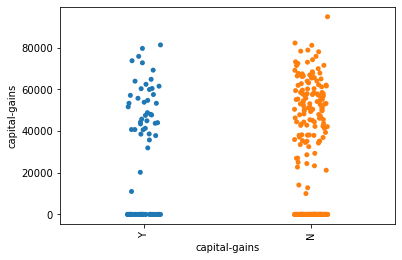

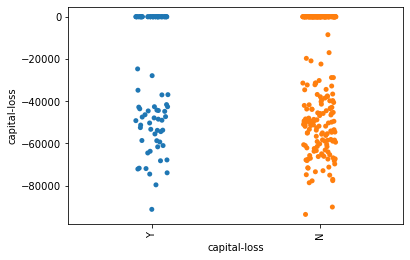

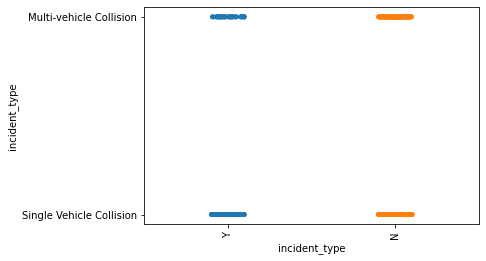

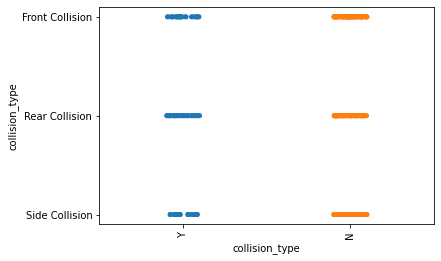

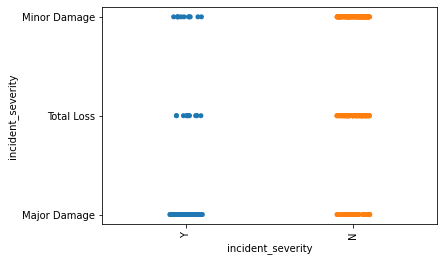

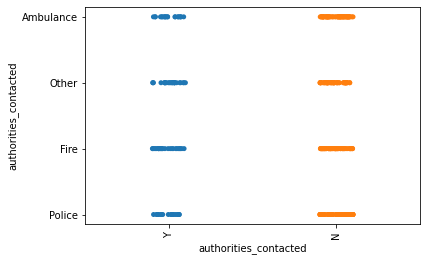

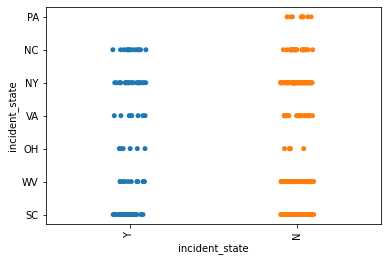

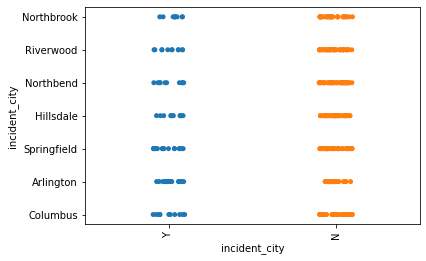

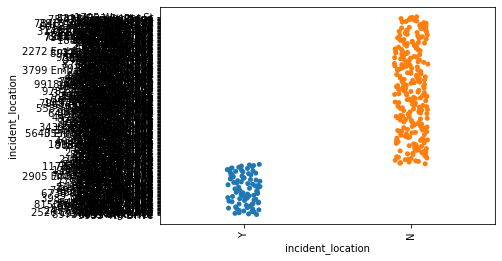

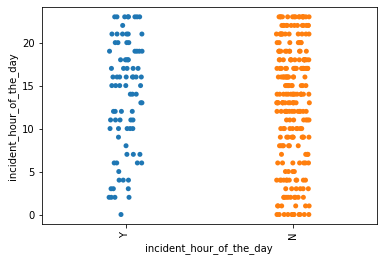

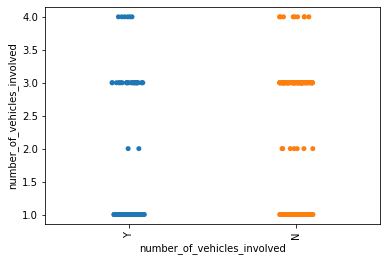

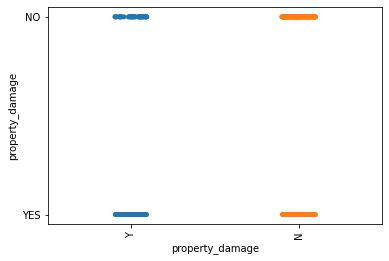

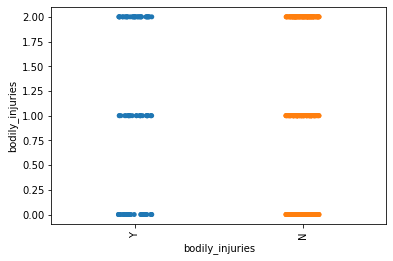

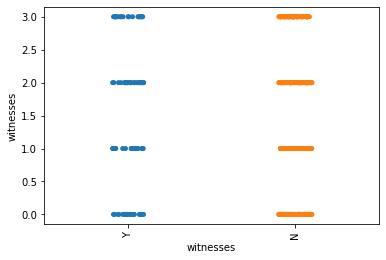

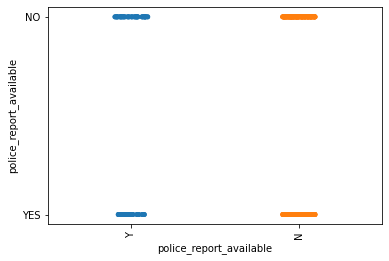

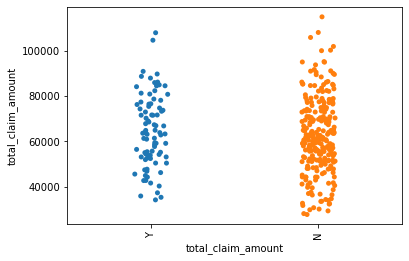

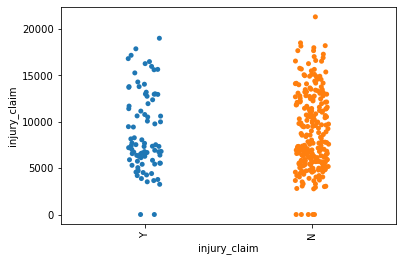

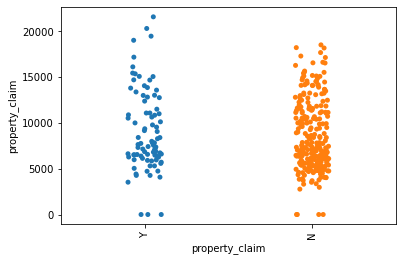

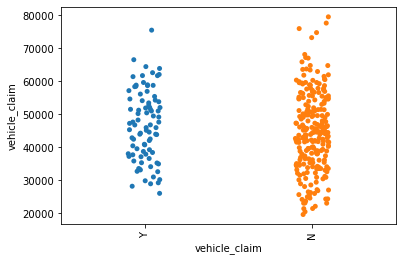

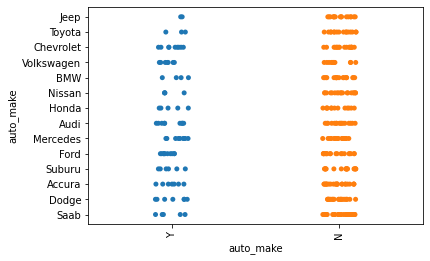

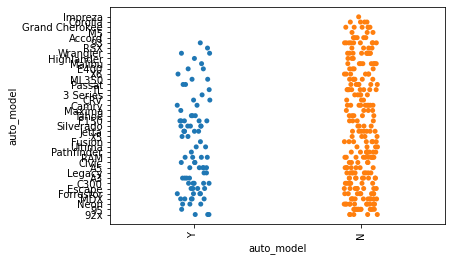

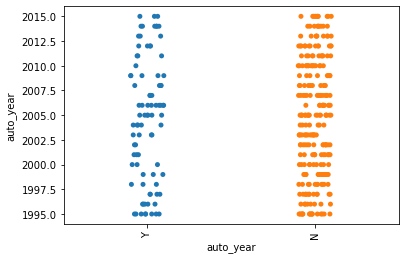

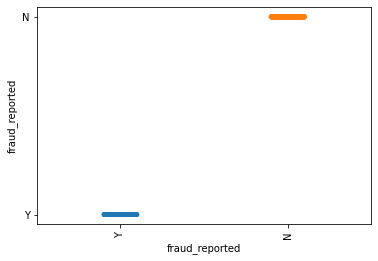

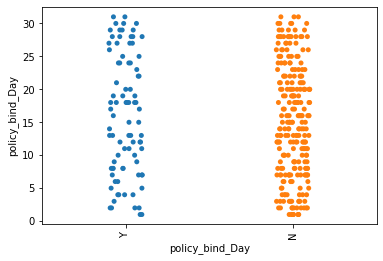

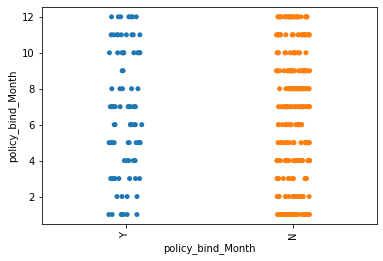

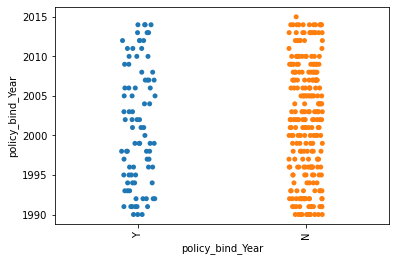

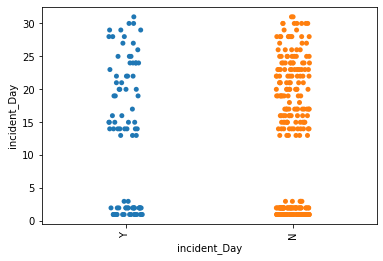

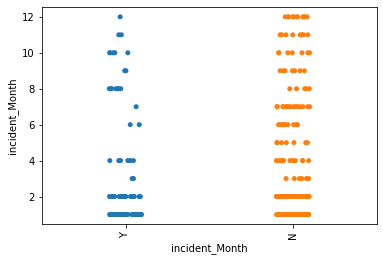

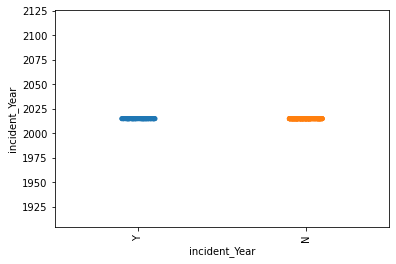

In [75]:
#Strip Plot
plt.figure(figsize=(12,15))
for i in df:
    sns.stripplot(df['fraud_reported'],df[i])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

Covered visualization on all the columns with respect to our label column.

Label Column: fraud_reported(2)

Less category columns as col1: insured_sex(2) policy_state(3) policy_csl(3) policy_deductable(3) bodily_injuries(3) police_report_available(3) property_damage(3) incident_type(4) collision_type(4) incident_severity(4) number_of_vehicles_involved(4) witnesses(4) authorities_contacted(5) insured_relationship(6) insured_education_level(7) incident_state(7) incident_city(7)

More category columns as col2: umbrella_limit(11) insured_occupation(14) auto_make(14) insured_hobbies(20) auto_model(39)

High unique value numeric columns as col3: incident_hour_of_the_day(24) age(46) capital-gains(338) capital-loss(354) months_as_customer(391) property_claim(626) injury_claim(638) vehicle_claim(726) total_claim_amount(763) policy_annual_premium(991) insured_zip(995)

In [76]:
categorical_variables.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [77]:
categorical_variables.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [78]:
categorical_variables.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

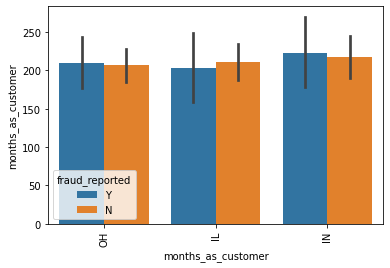

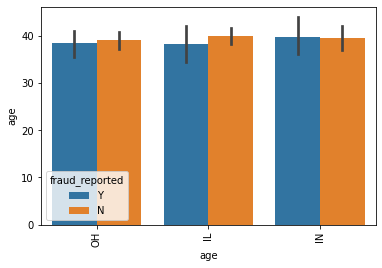

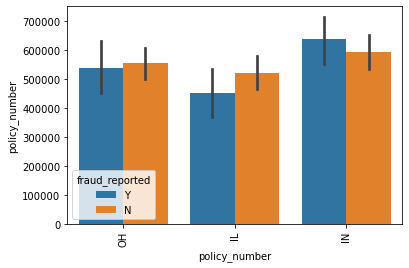

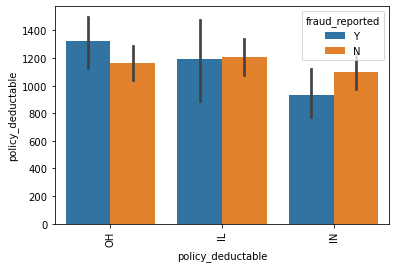

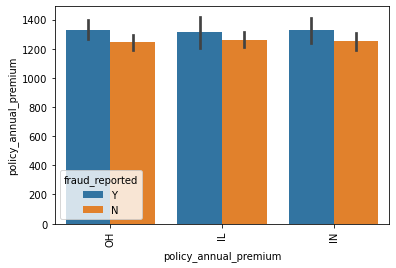

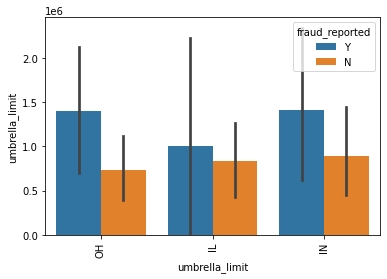

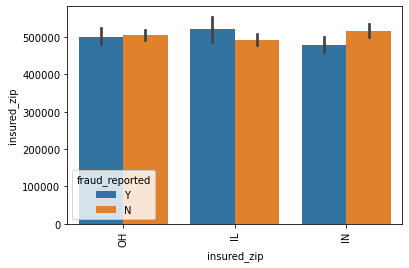

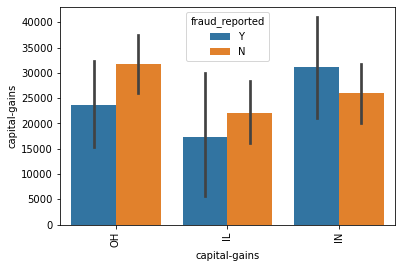

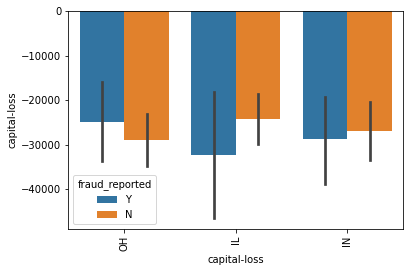

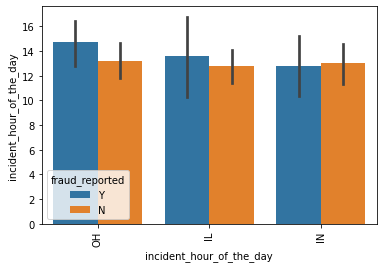

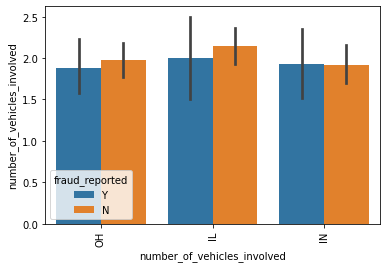

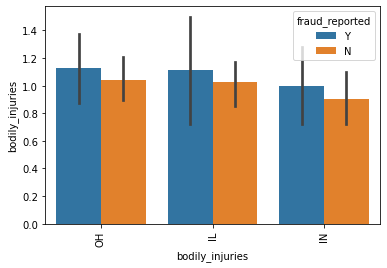

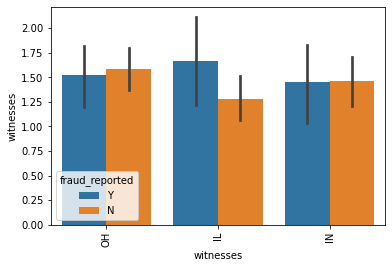

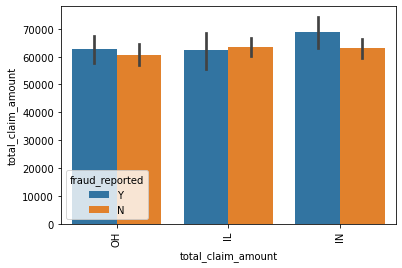

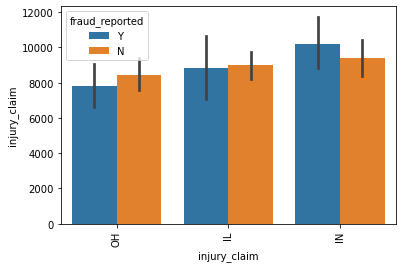

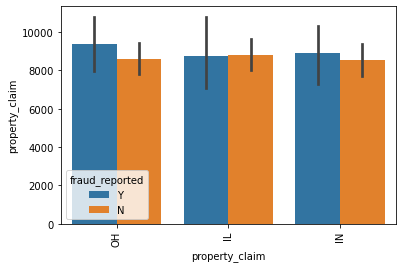

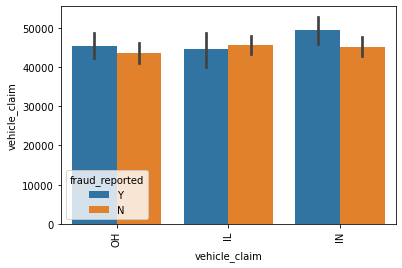

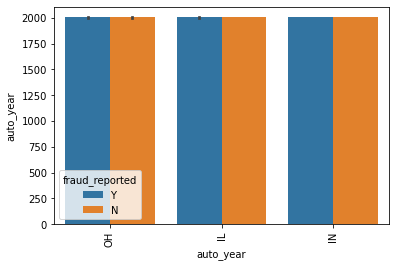

In [79]:
#Bar Plot of categorical vs numerical variables with hue being the target variable
for i in numerical_variables:
    sns.barplot(df['policy_state'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

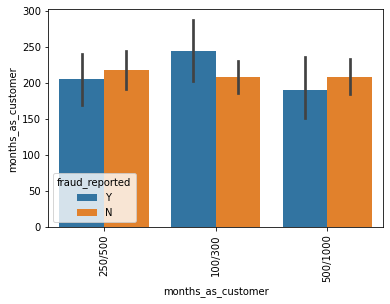

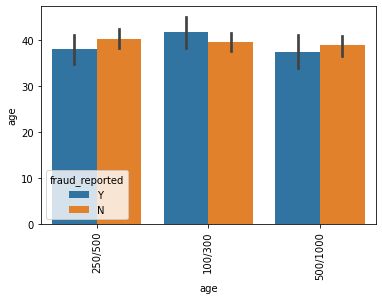

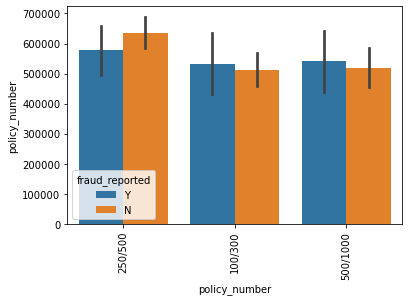

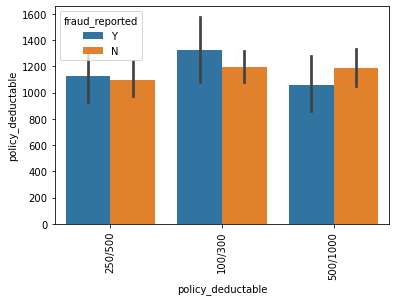

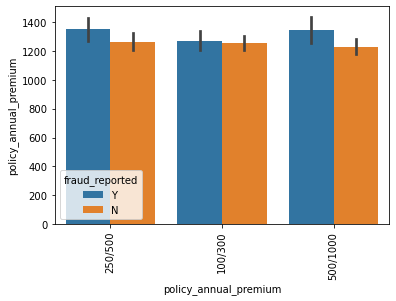

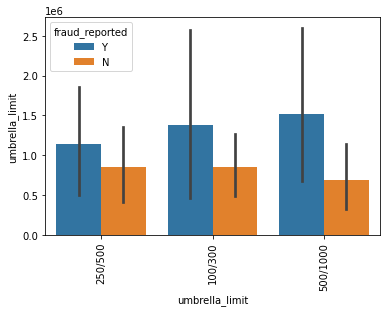

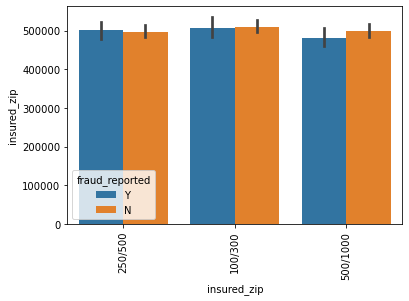

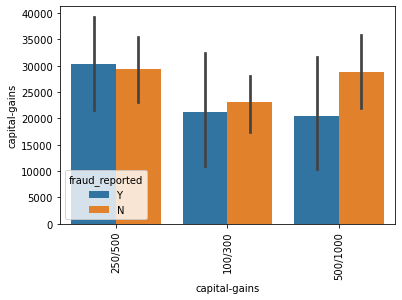

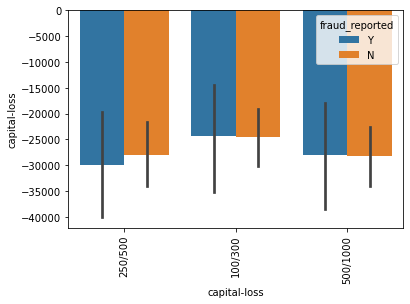

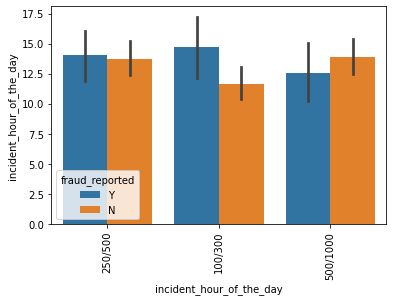

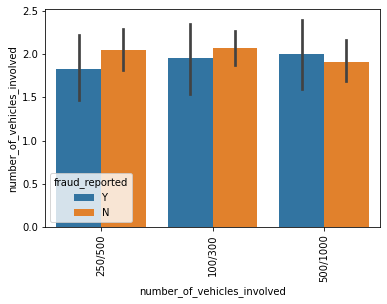

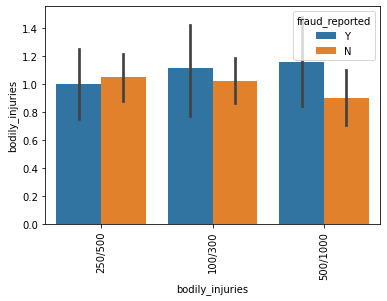

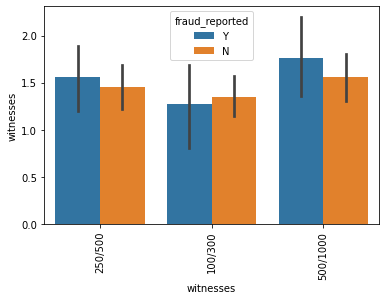

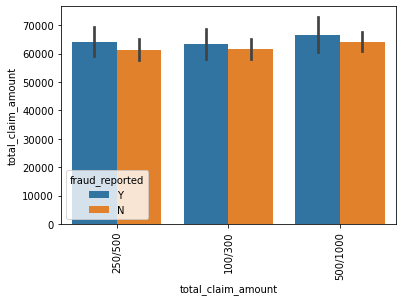

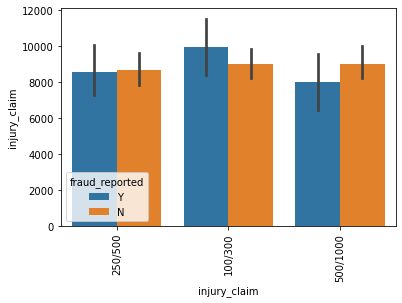

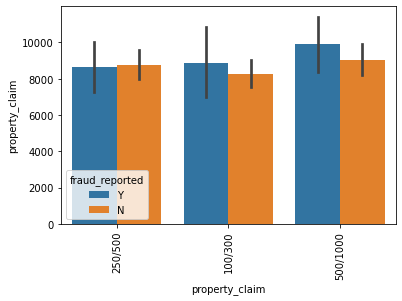

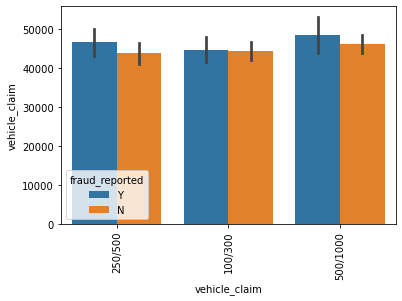

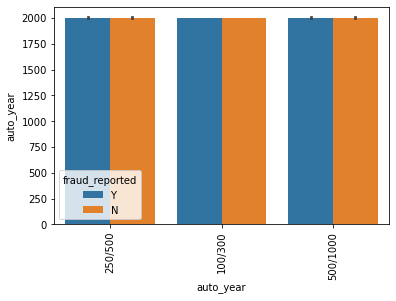

In [80]:
for i in numerical_variables:
    sns.barplot(df['policy_csl'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

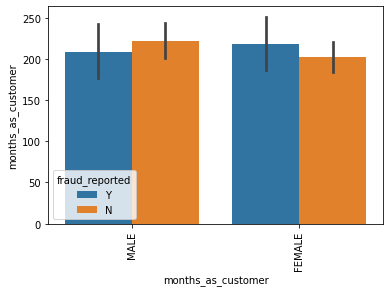

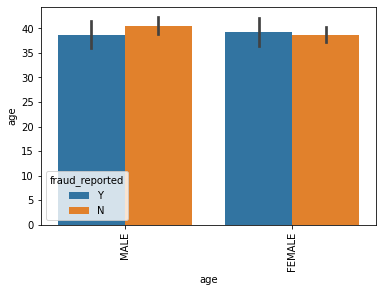

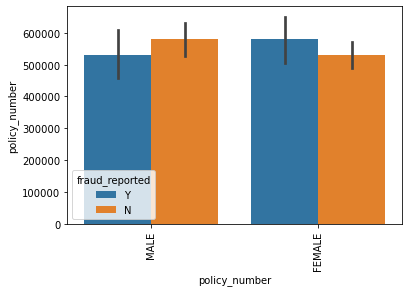

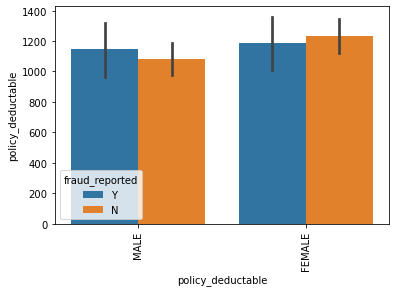

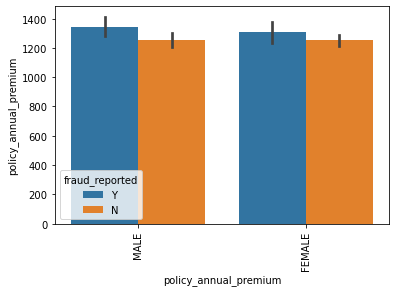

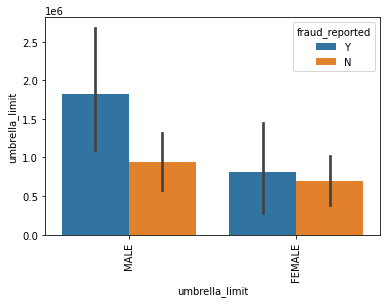

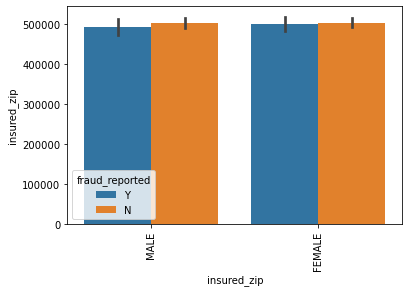

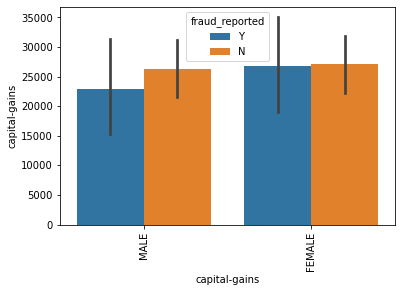

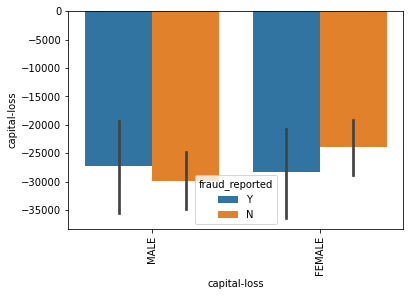

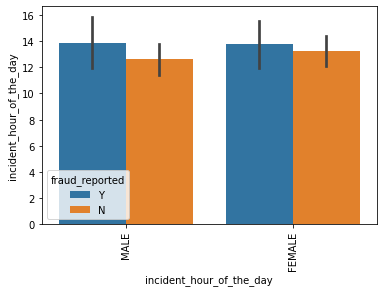

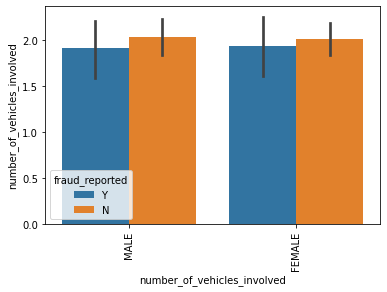

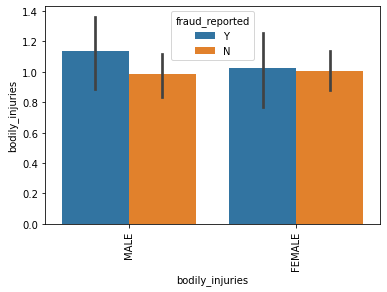

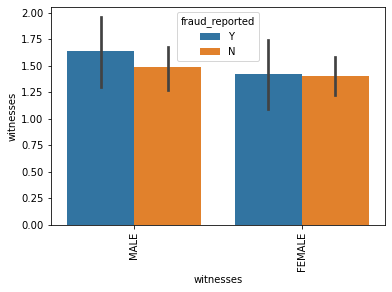

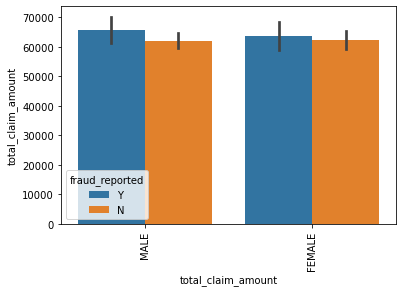

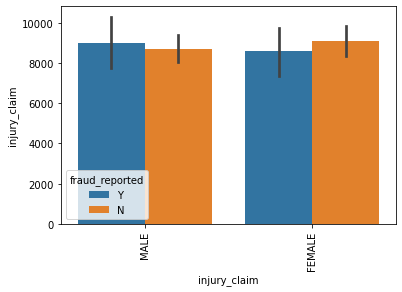

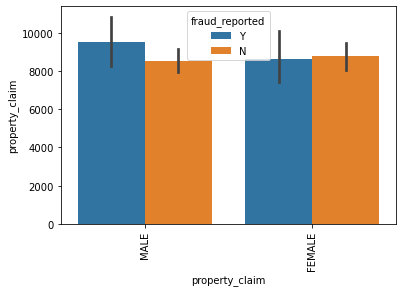

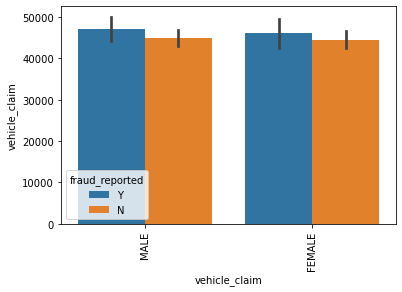

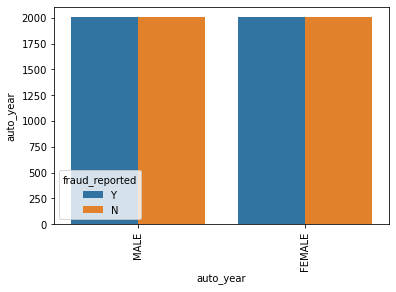

In [81]:
for i in numerical_variables:
    sns.barplot(df['insured_sex'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

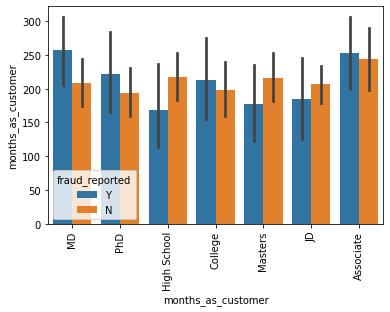

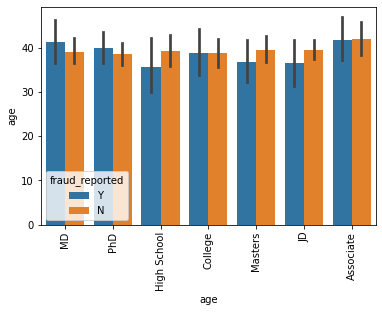

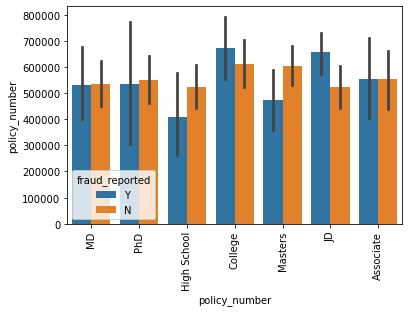

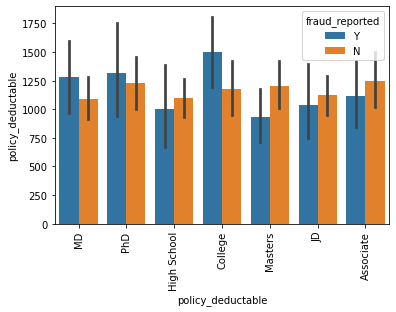

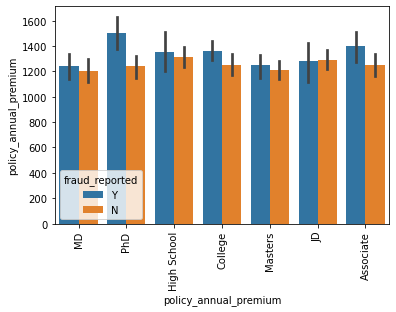

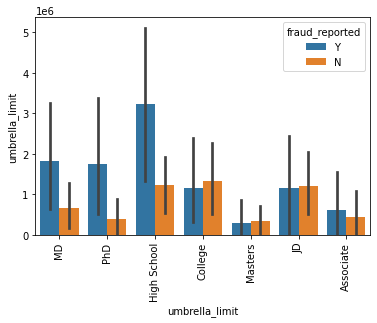

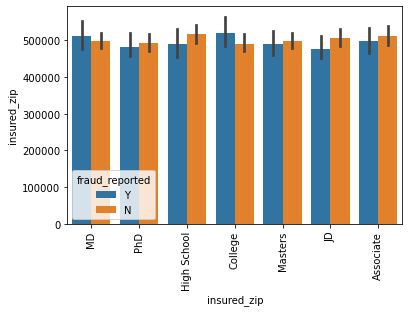

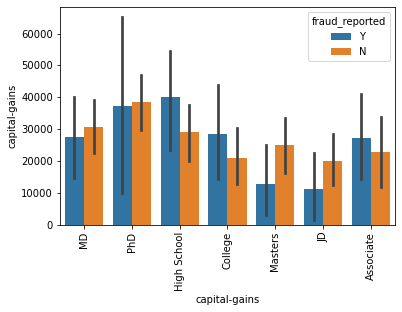

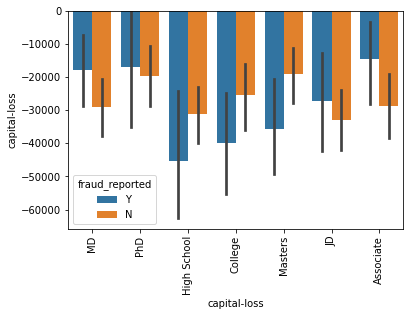

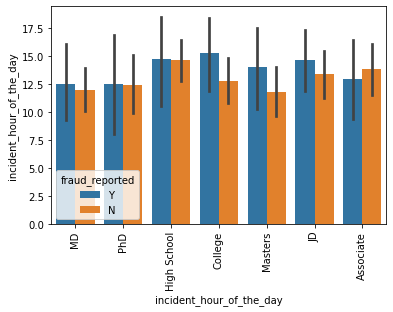

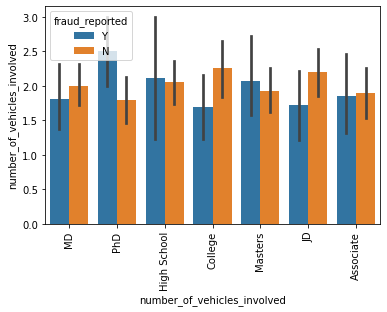

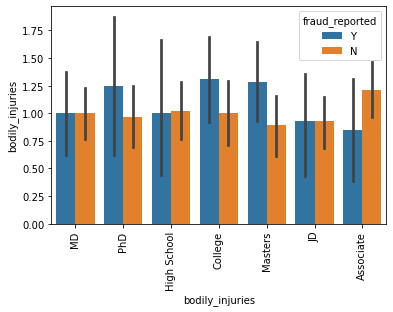

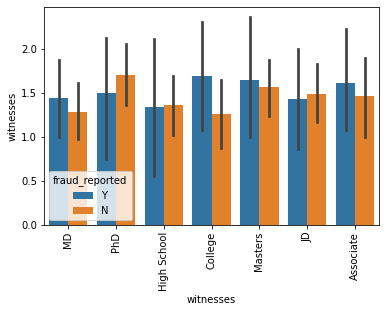

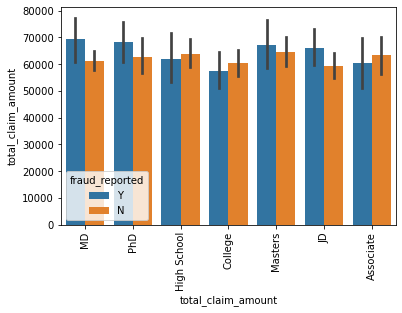

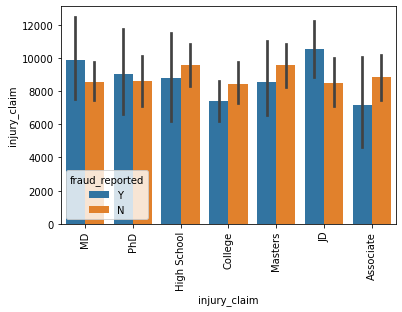

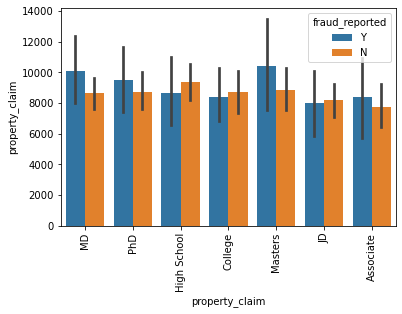

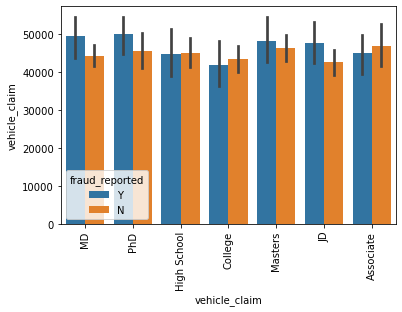

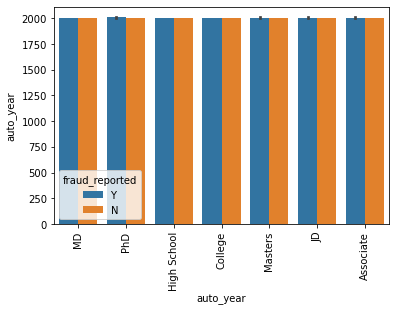

In [82]:
for i in numerical_variables:
    sns.barplot(df['insured_education_level'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

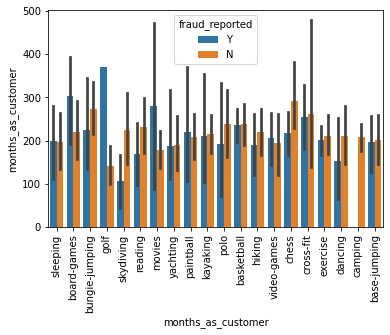

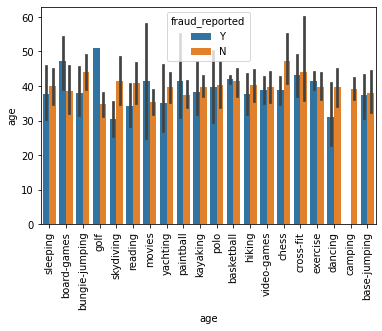

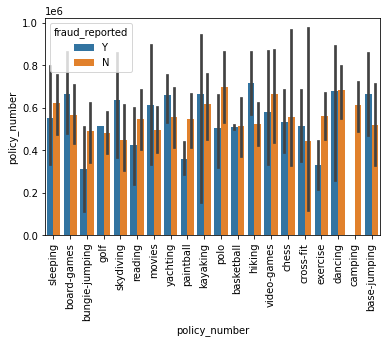

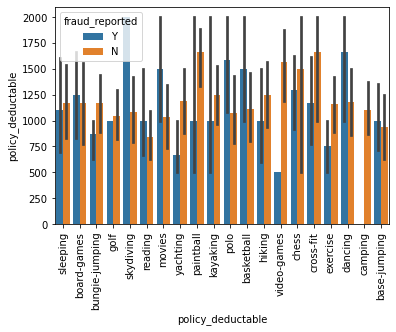

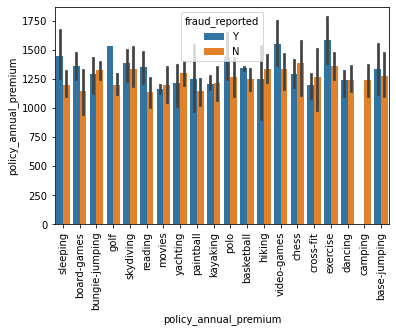

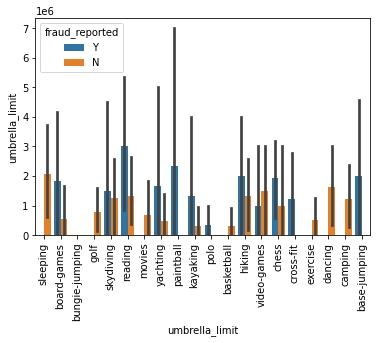

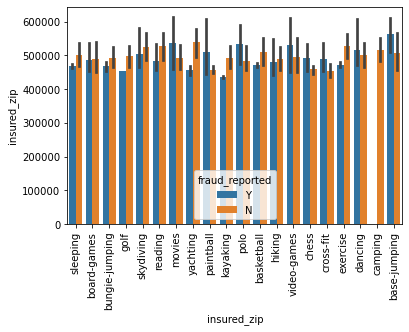

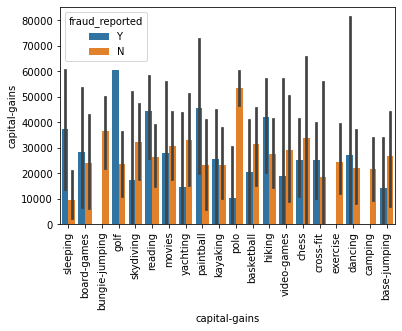

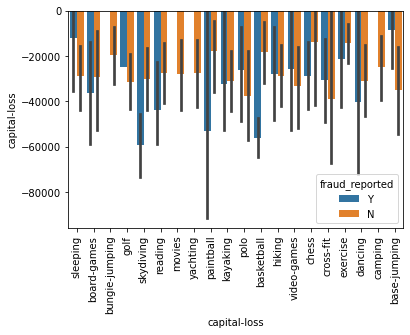

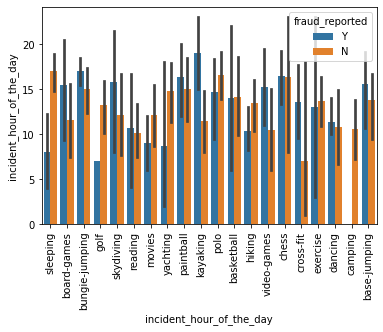

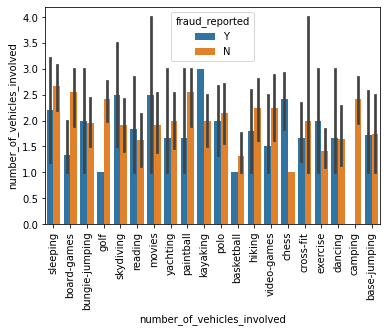

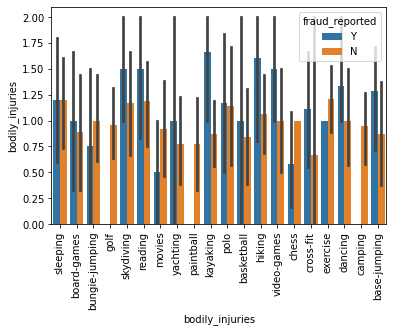

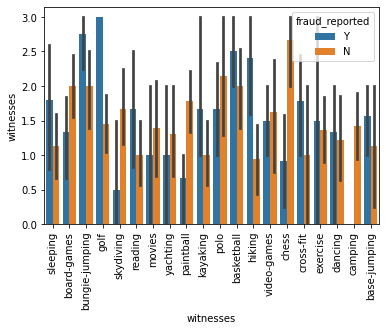

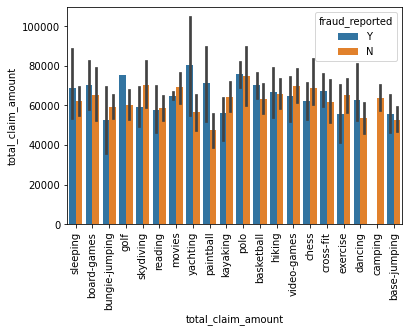

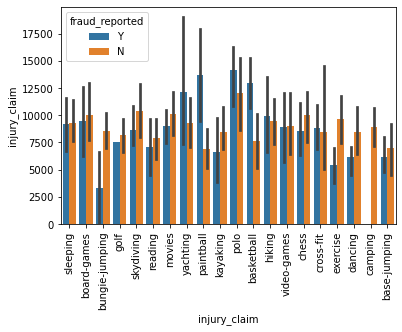

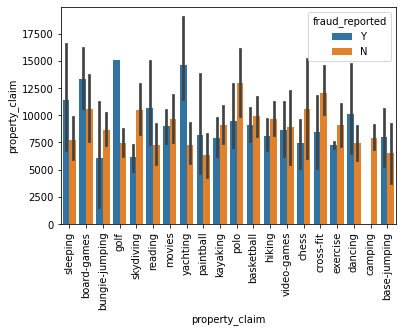

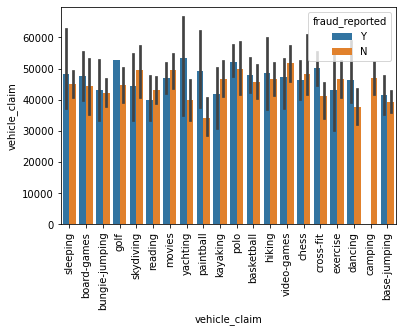

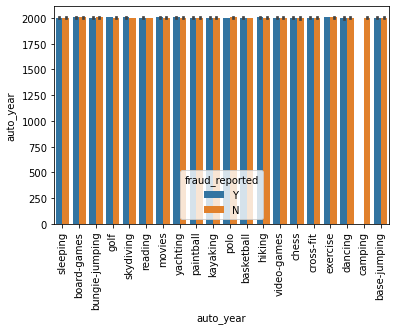

In [83]:
for i in numerical_variables:
    sns.barplot(df['insured_hobbies'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

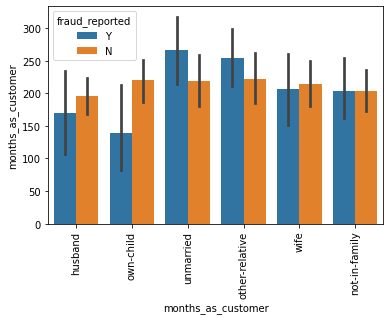

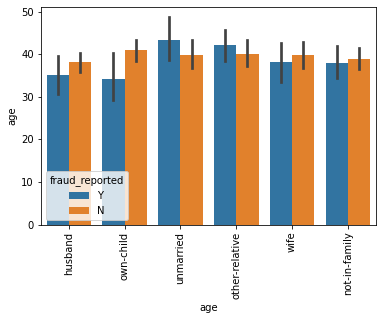

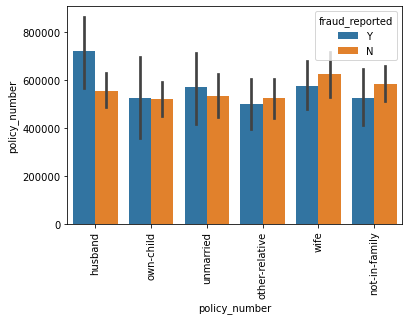

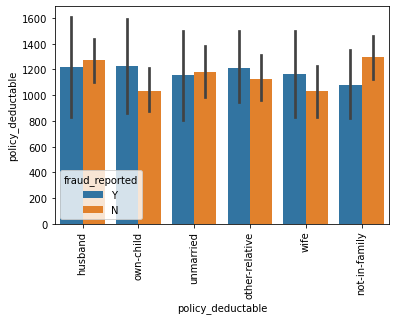

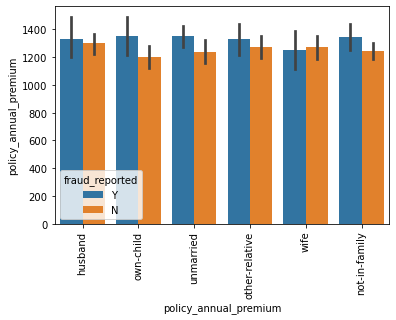

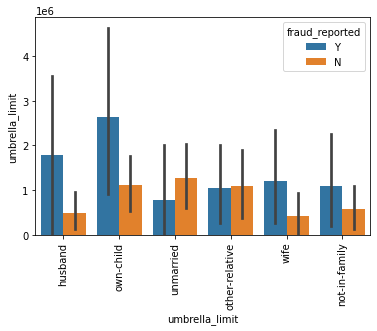

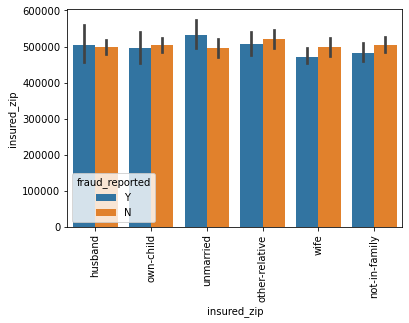

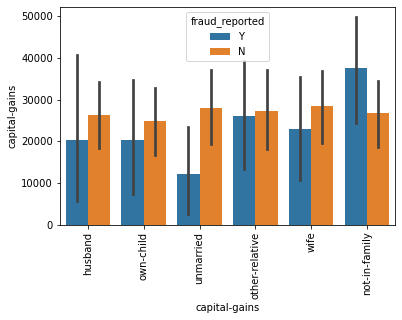

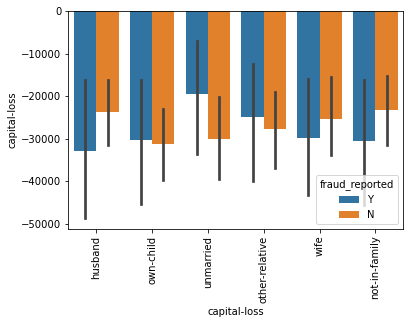

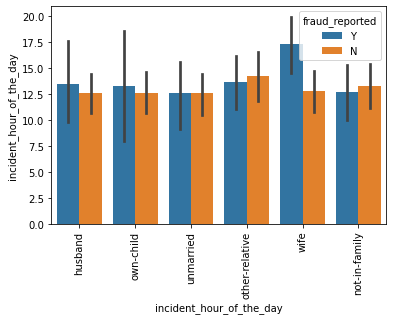

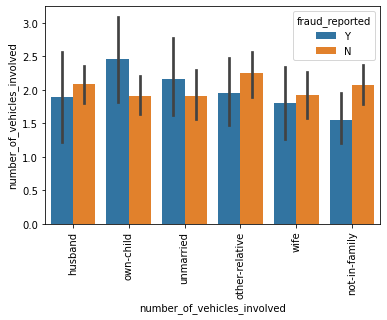

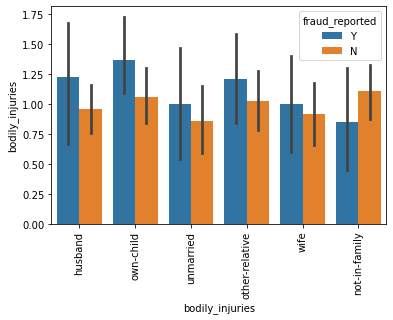

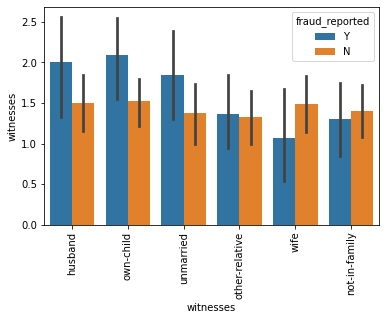

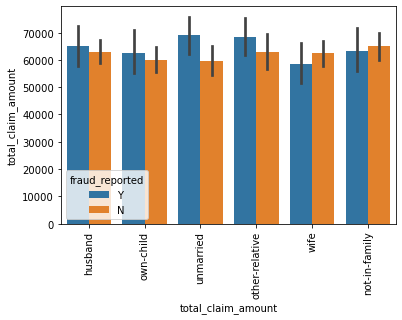

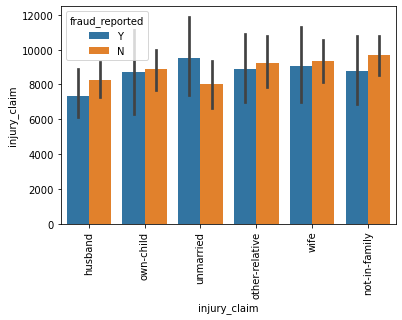

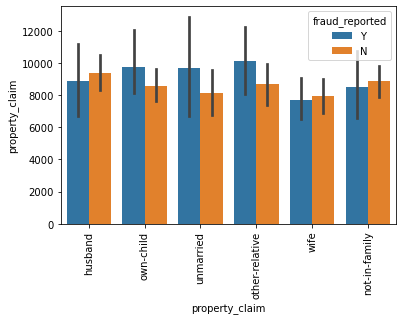

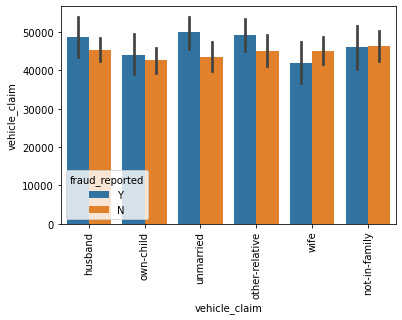

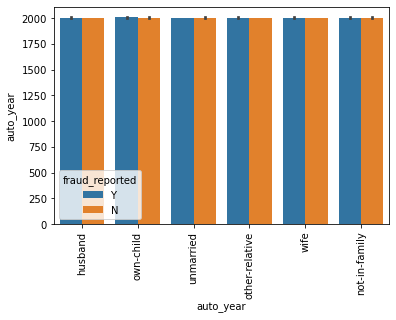

In [84]:
for i in numerical_variables:
    sns.barplot(df['insured_relationship'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

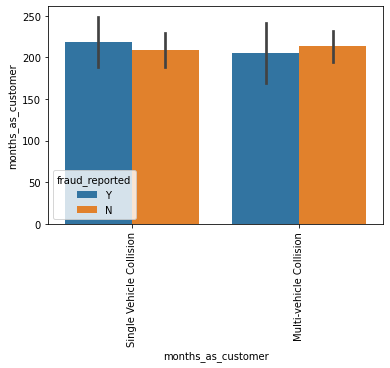

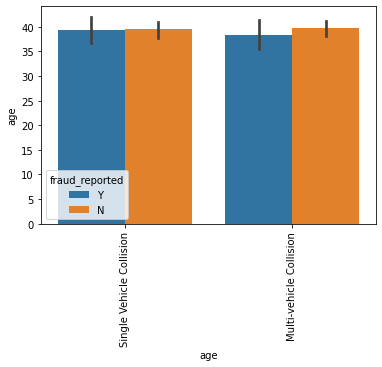

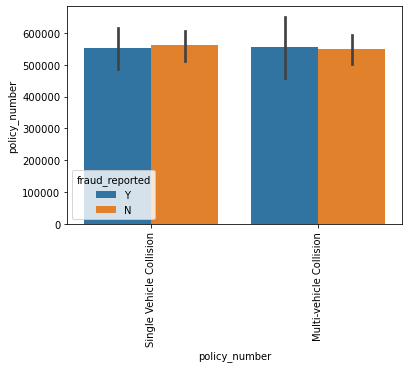

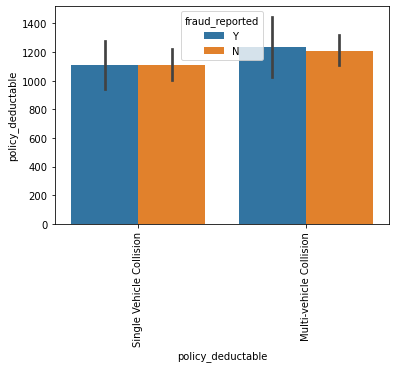

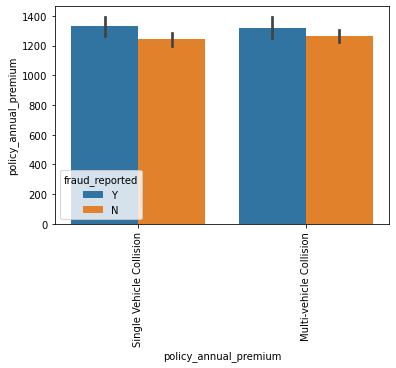

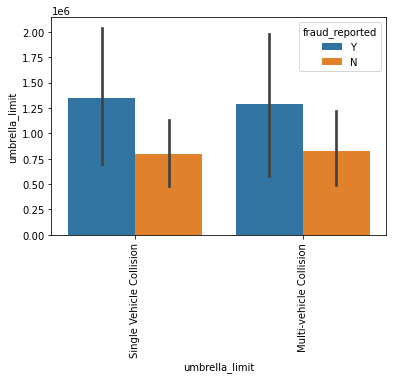

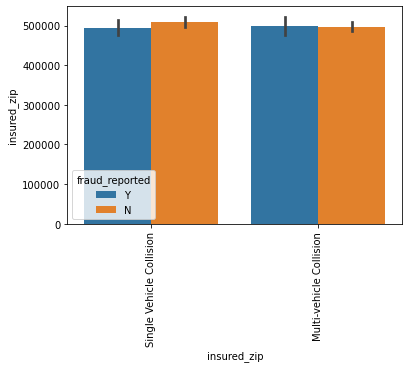

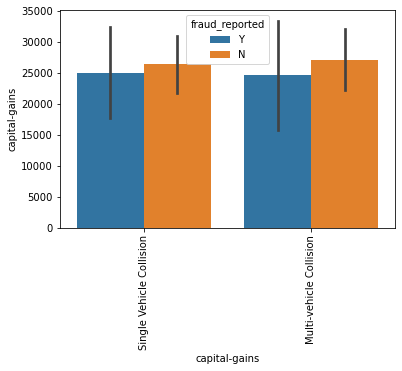

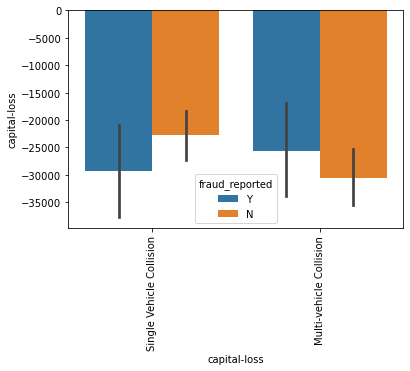

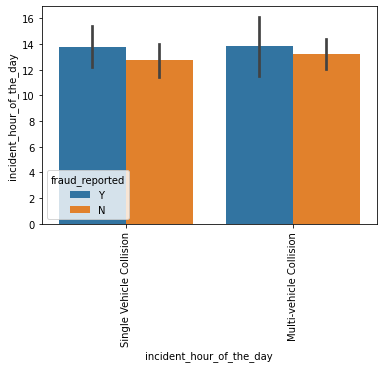

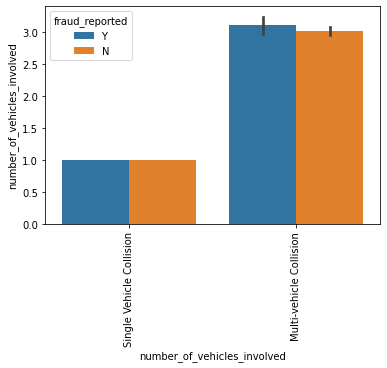

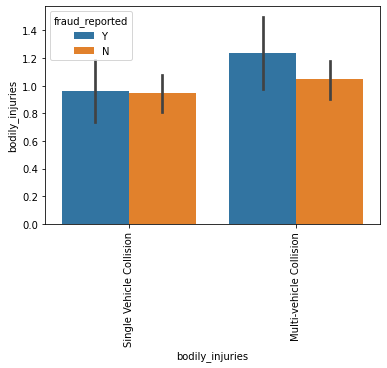

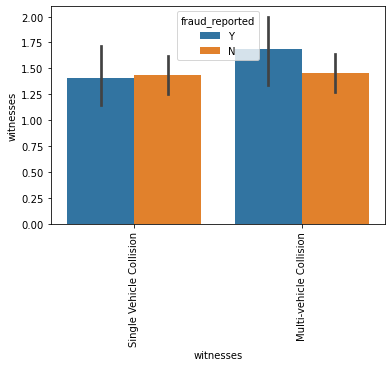

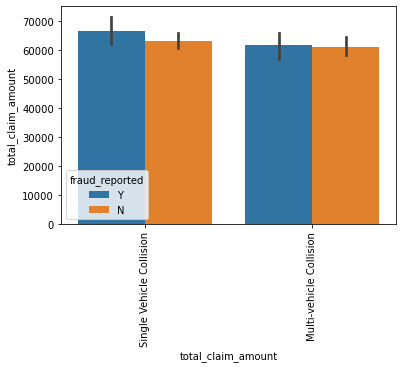

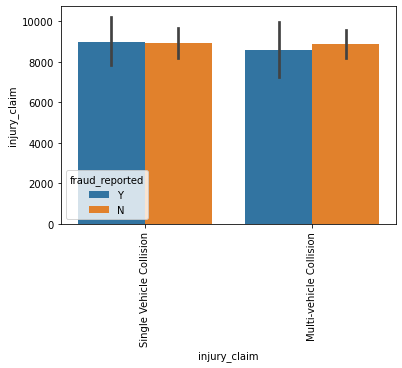

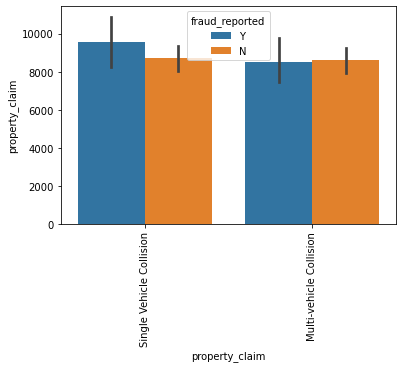

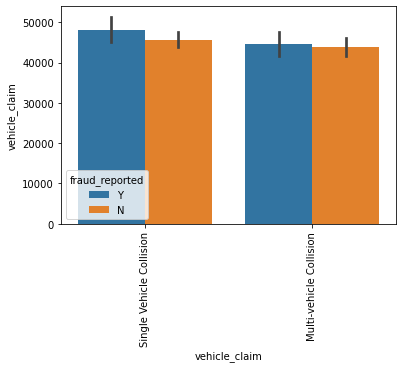

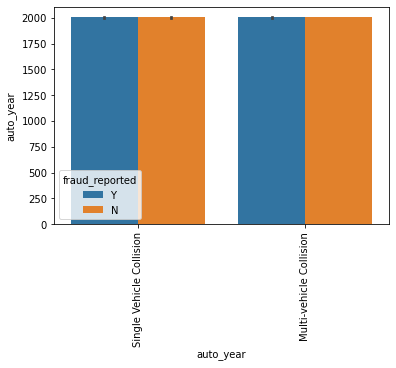

In [85]:
for i in numerical_variables:
    sns.barplot(df['incident_type'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

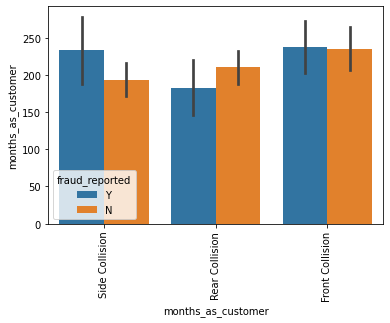

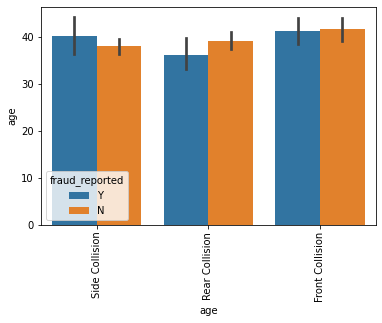

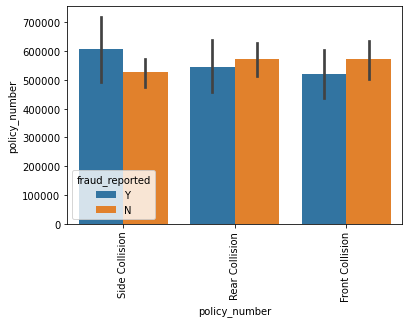

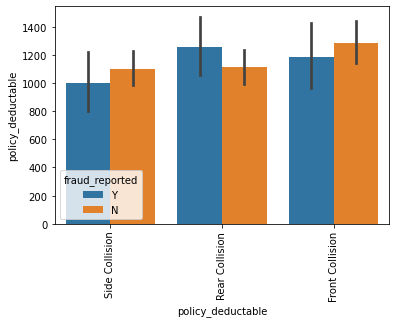

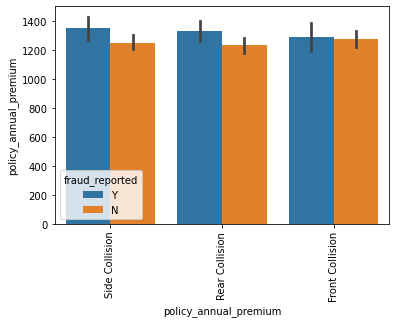

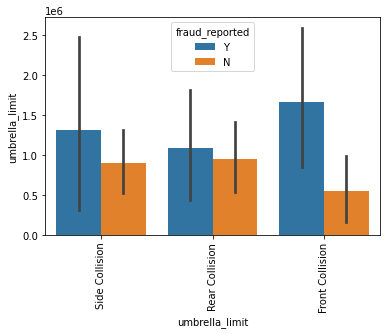

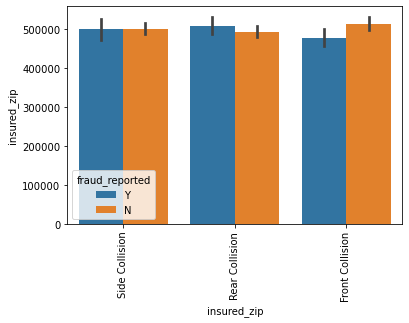

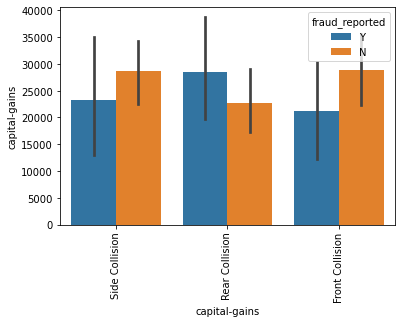

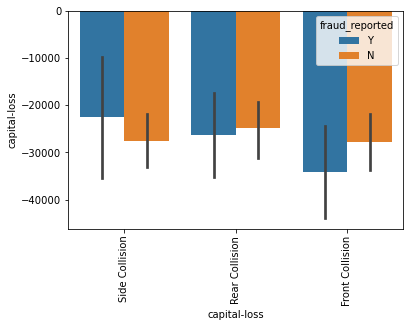

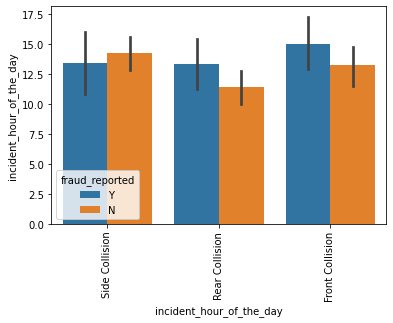

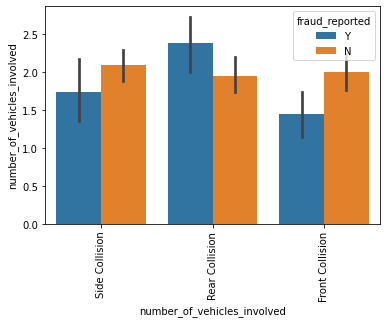

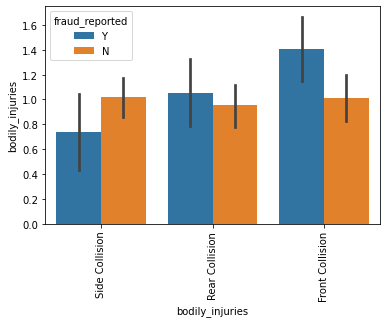

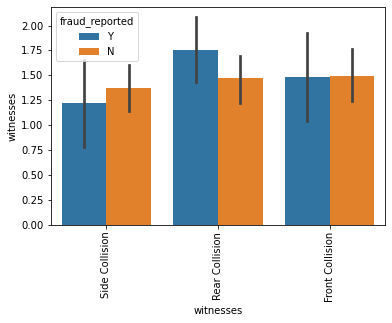

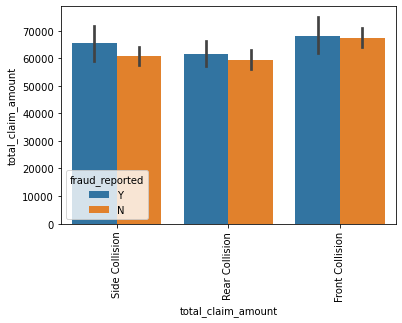

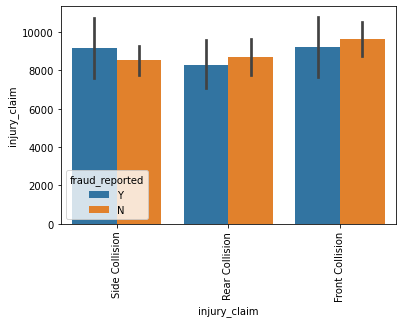

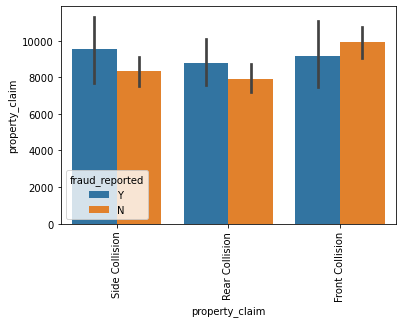

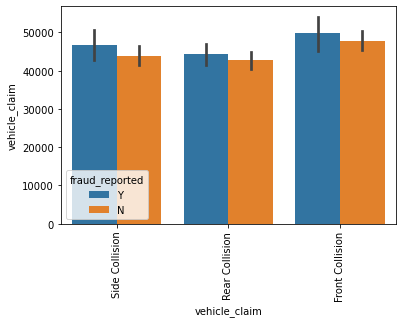

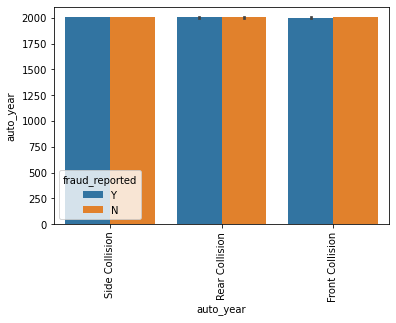

In [86]:
for i in numerical_variables:
    sns.barplot(df['collision_type'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

In [87]:
categorical_variables.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

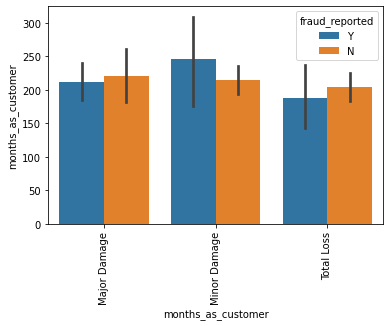

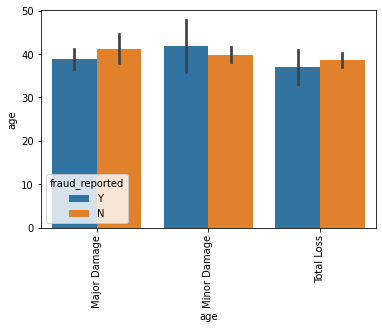

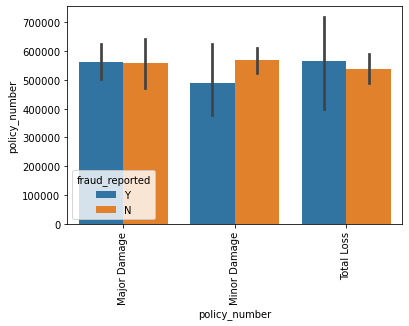

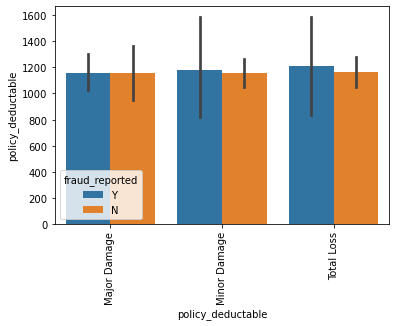

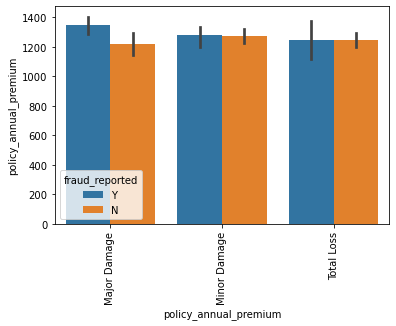

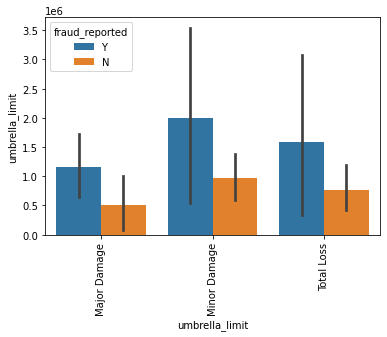

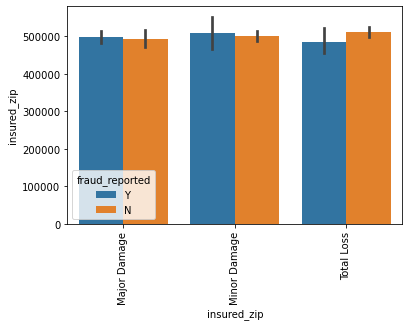

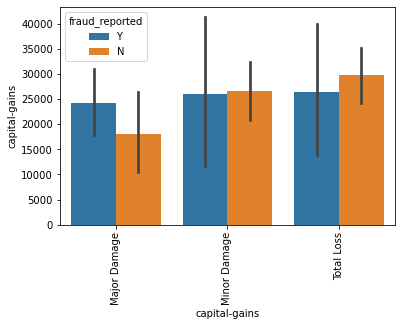

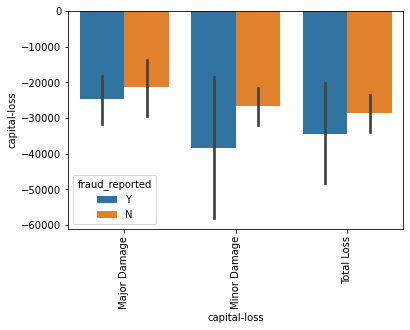

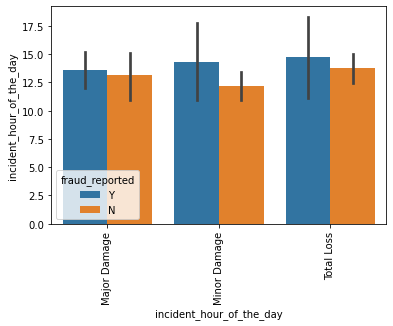

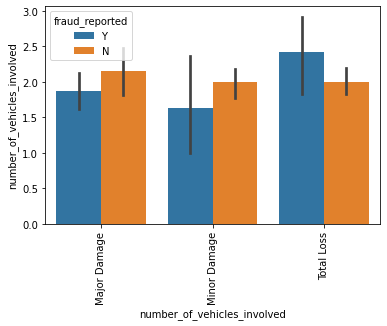

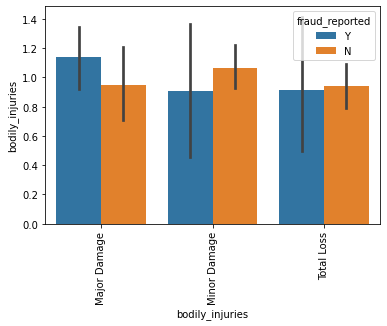

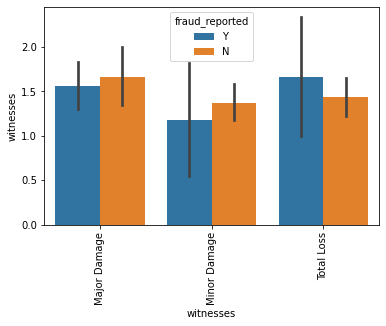

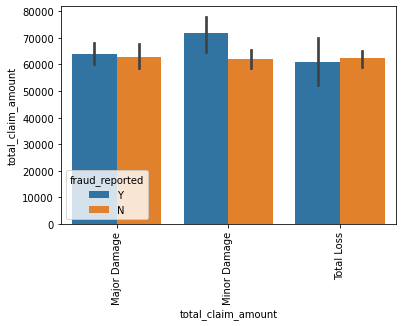

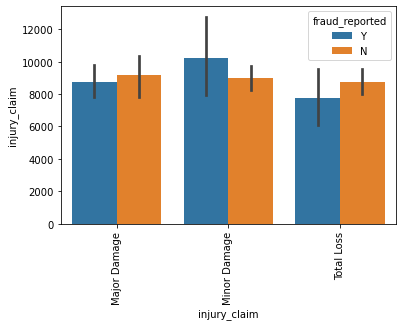

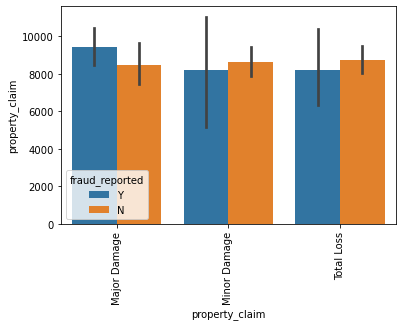

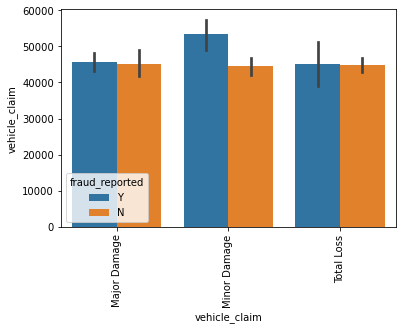

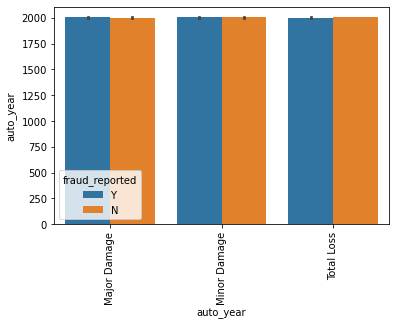

In [88]:
for i in numerical_variables:
    sns.barplot(df['incident_severity'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

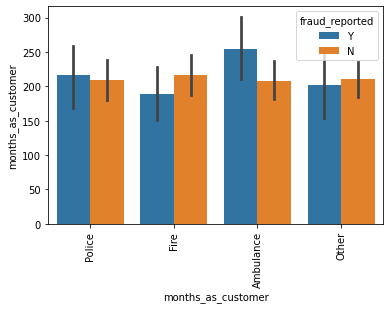

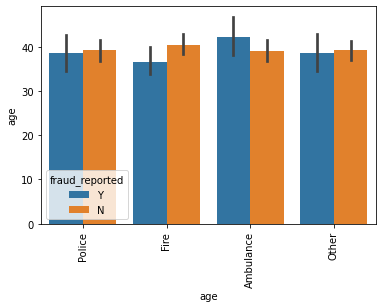

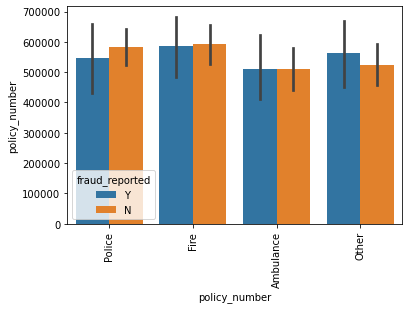

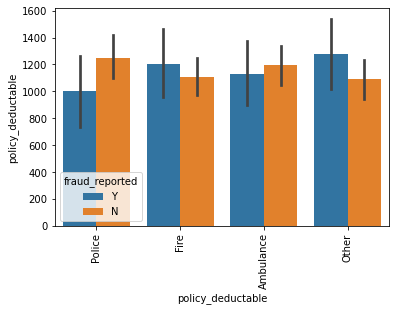

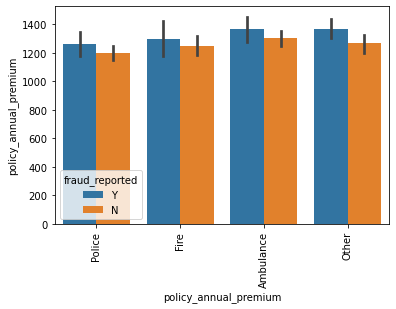

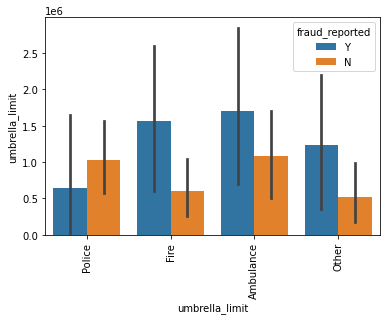

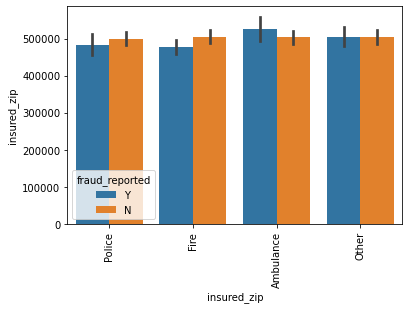

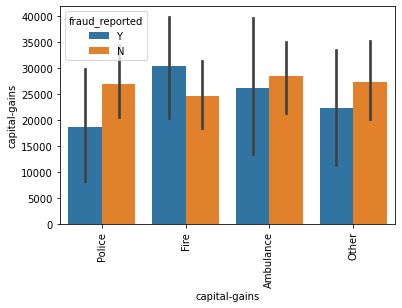

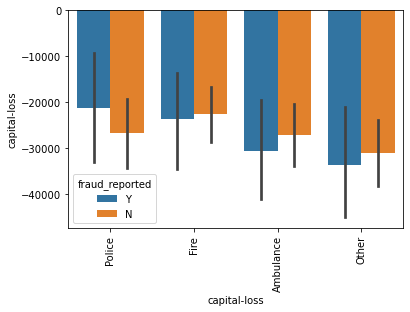

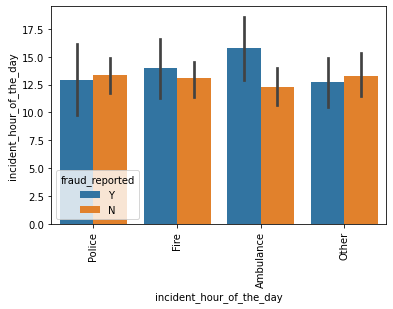

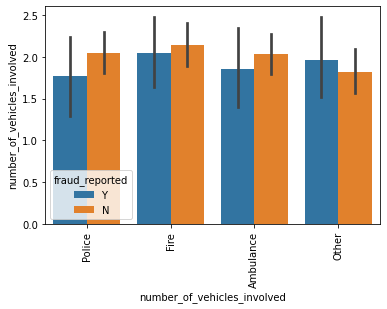

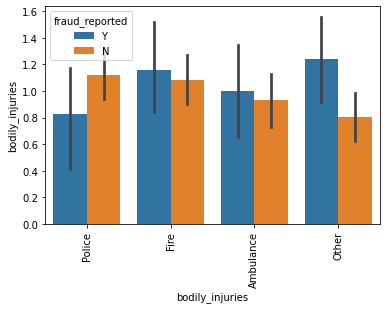

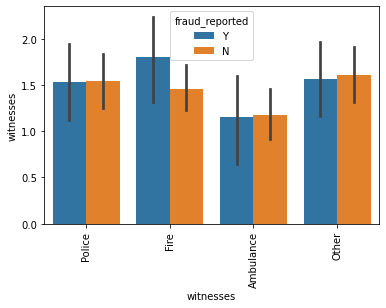

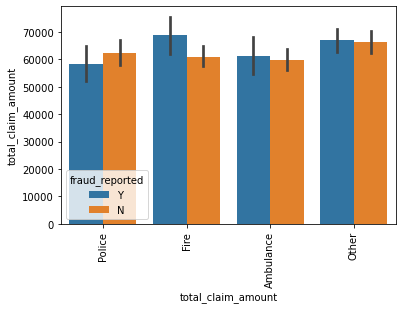

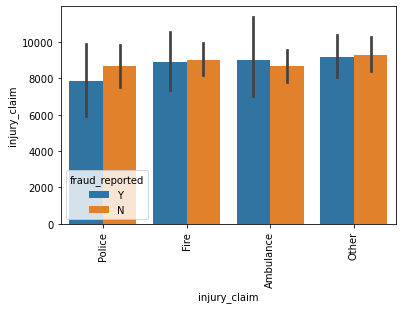

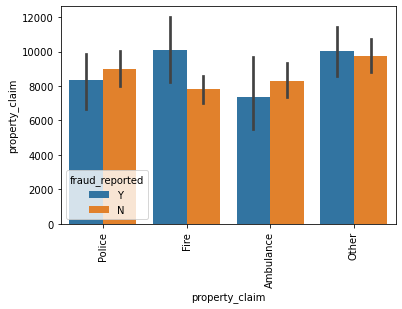

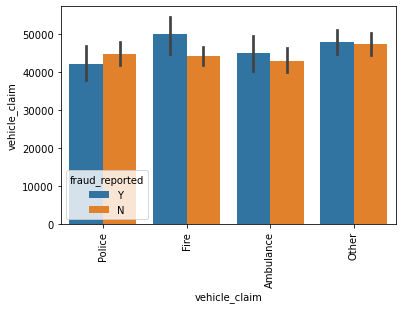

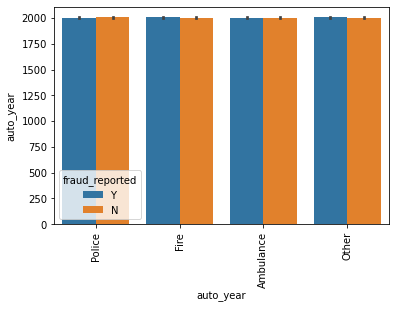

In [89]:
for i in numerical_variables:
    sns.barplot(df['authorities_contacted'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

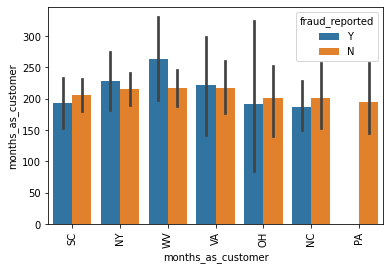

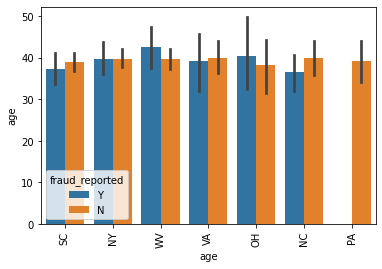

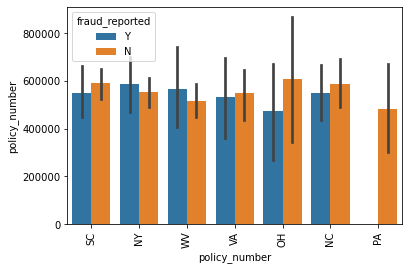

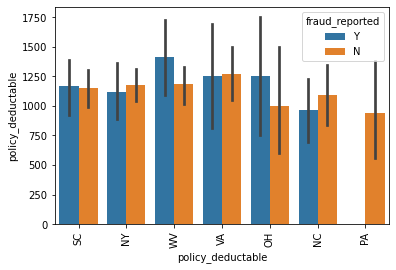

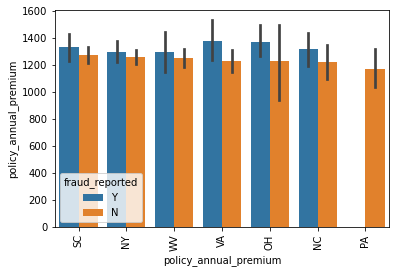

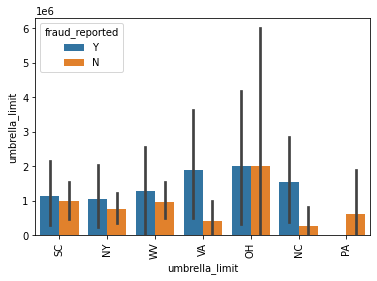

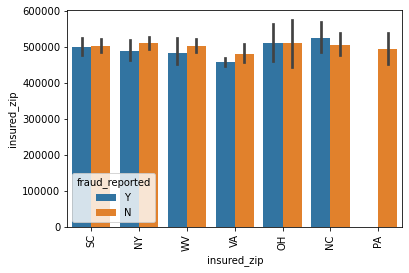

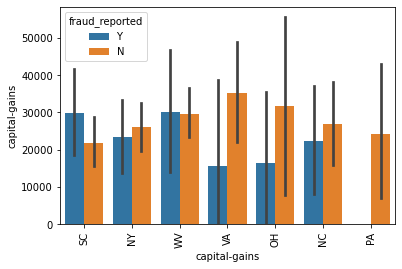

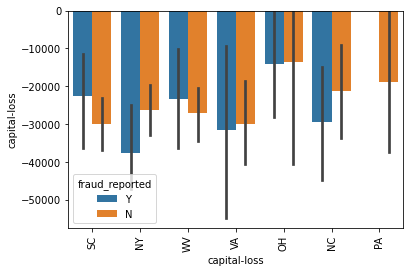

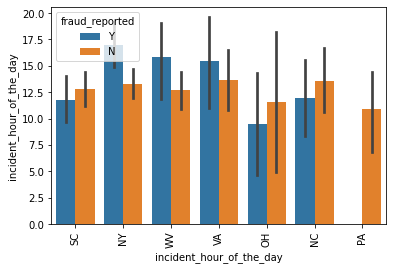

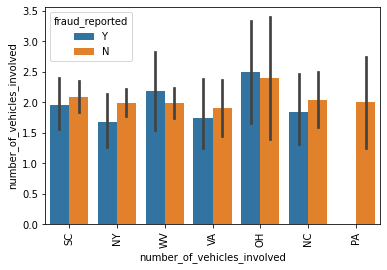

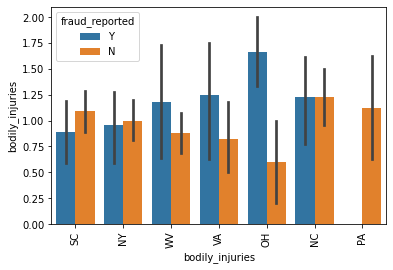

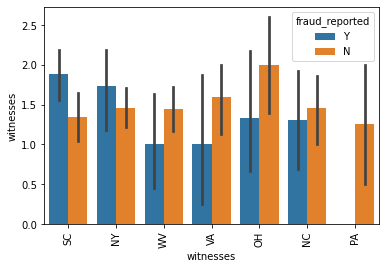

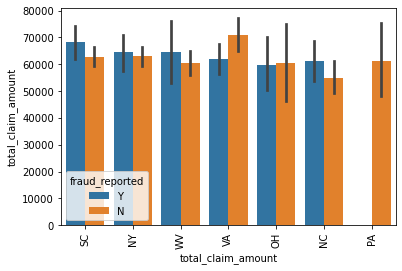

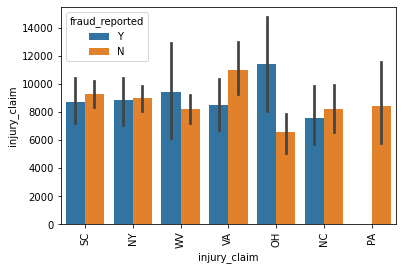

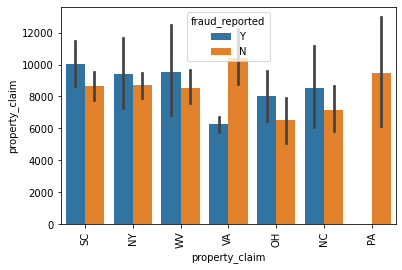

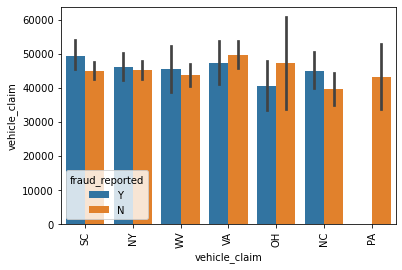

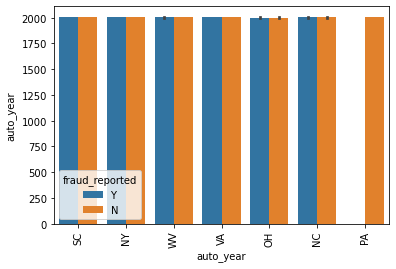

In [90]:
for i in numerical_variables:
    sns.barplot(df['incident_state'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

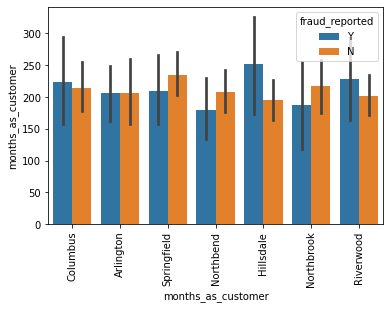

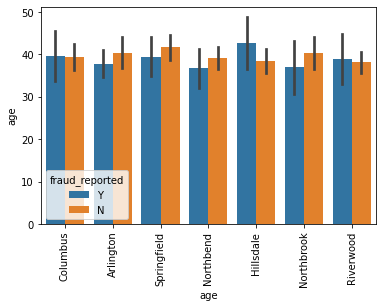

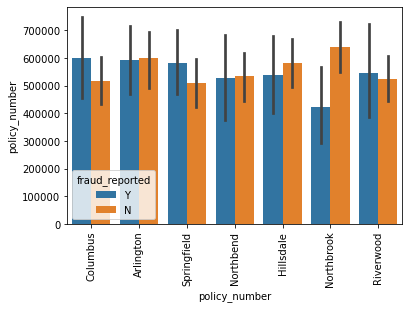

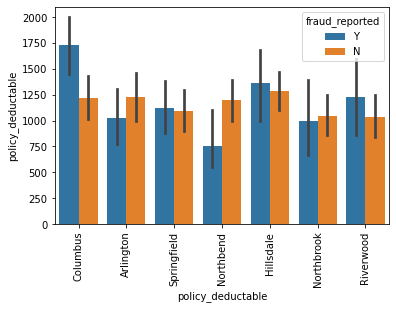

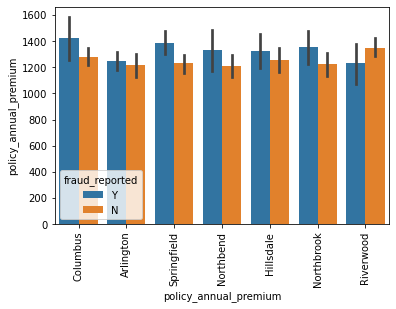

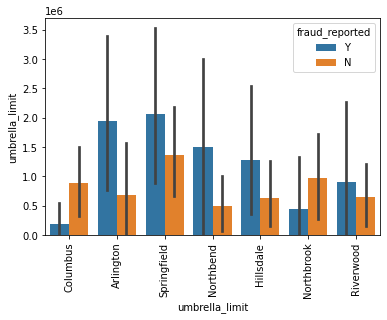

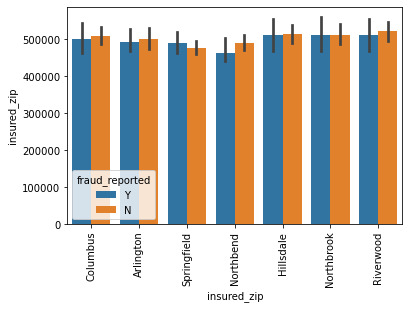

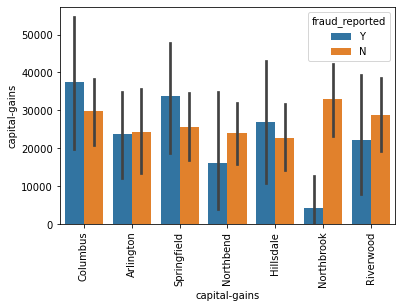

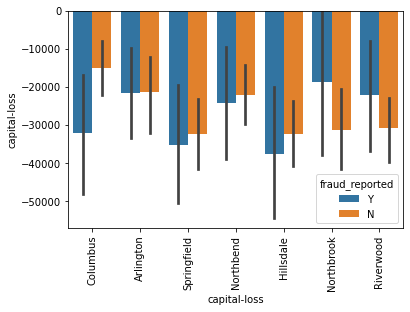

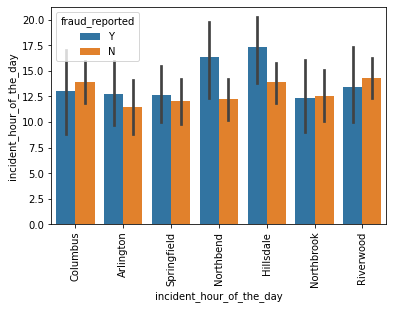

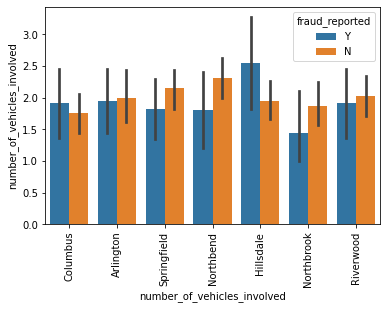

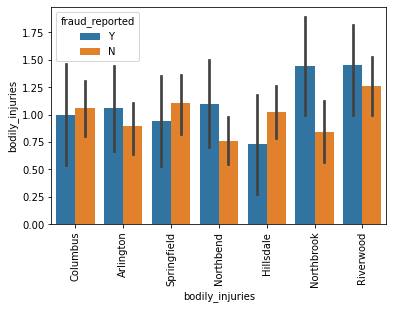

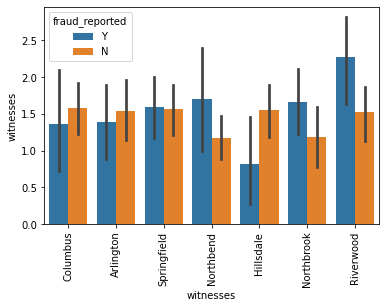

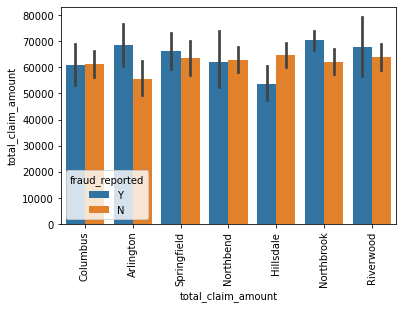

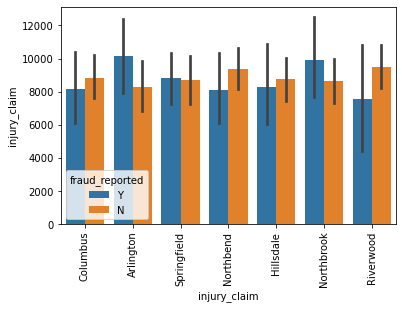

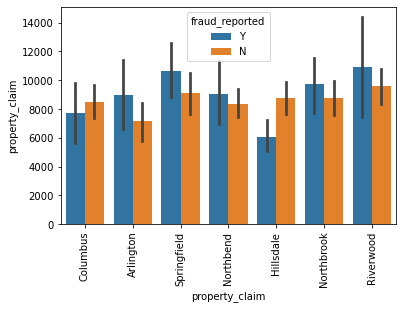

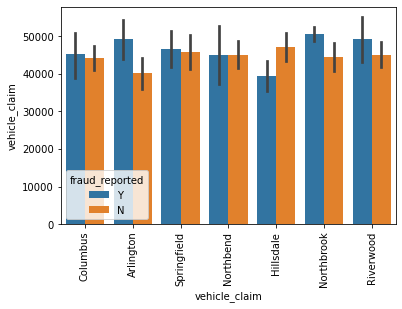

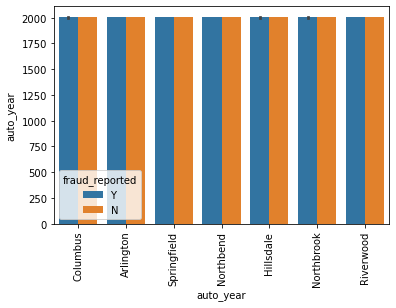

In [91]:
for i in numerical_variables:
    sns.barplot(df['incident_city'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

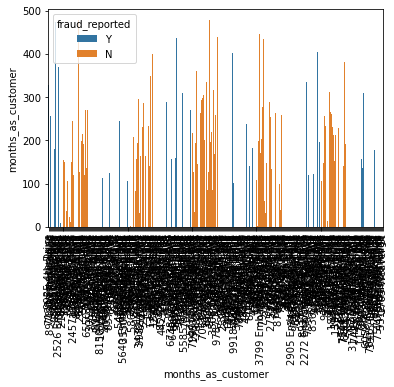

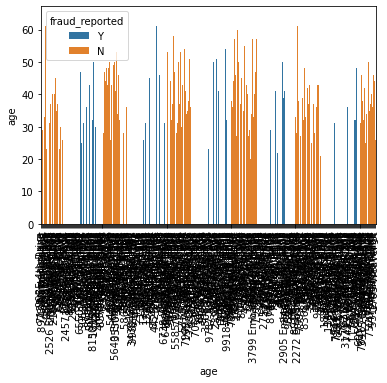

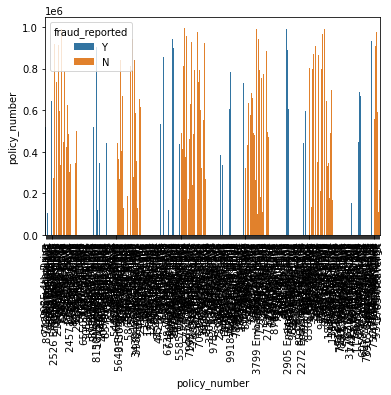

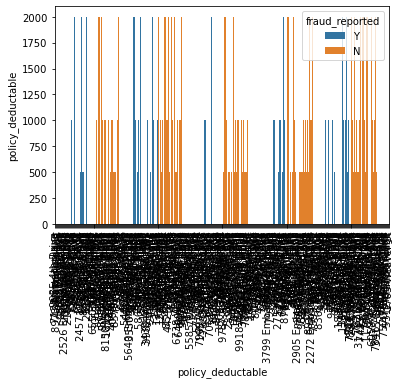

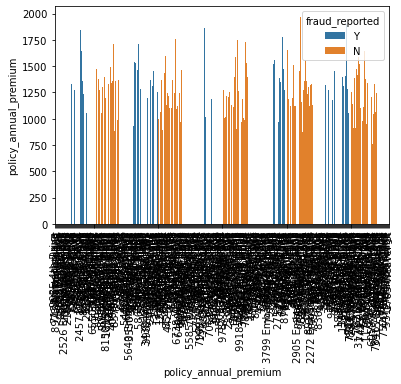

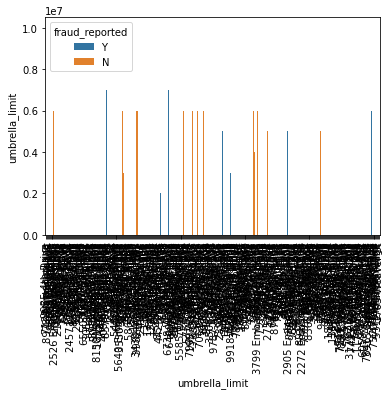

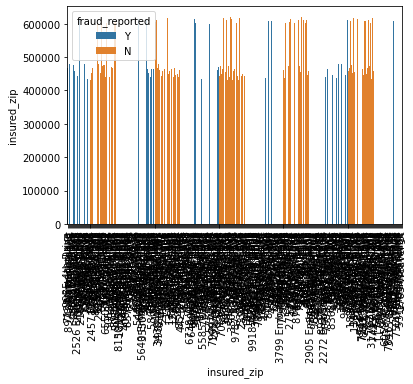

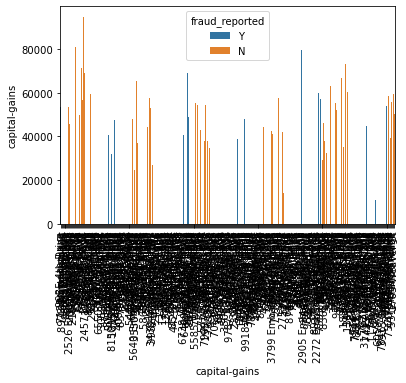

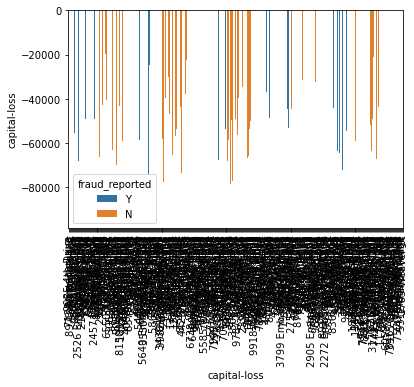

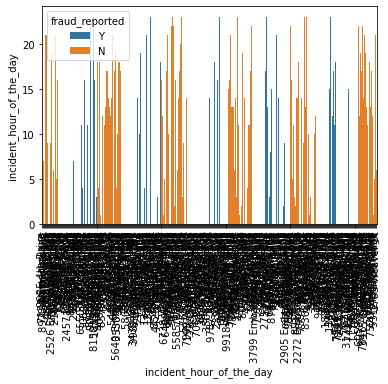

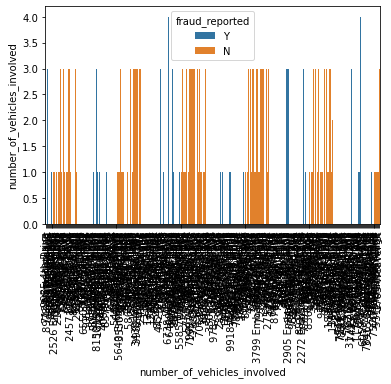

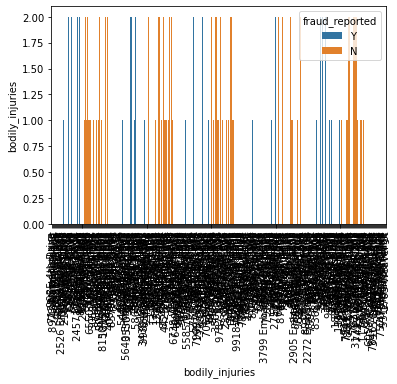

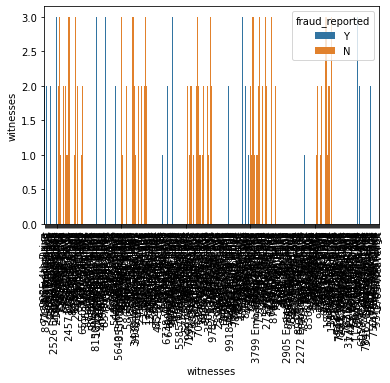

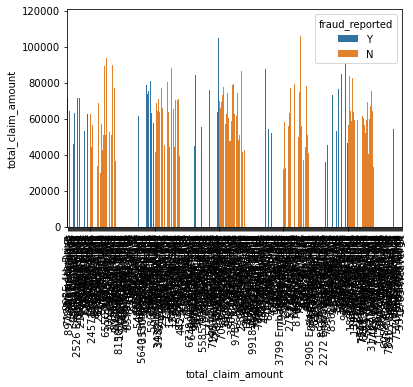

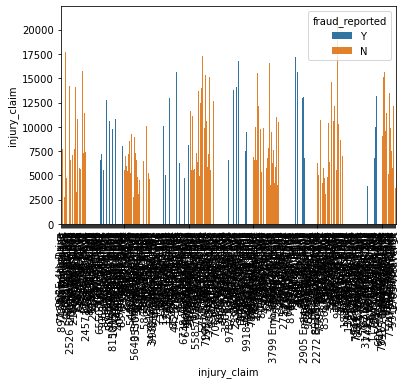

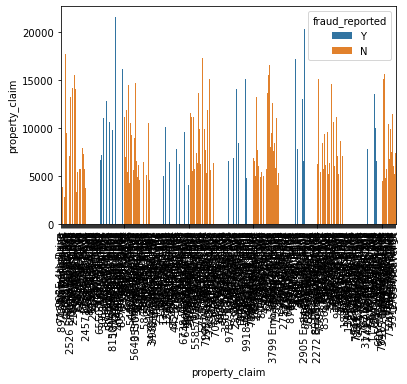

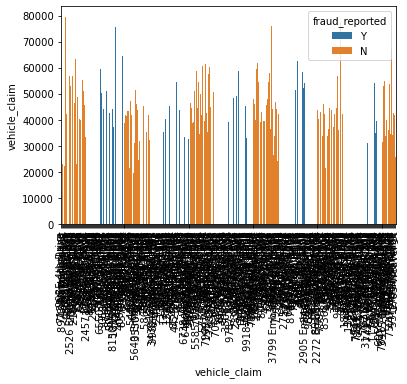

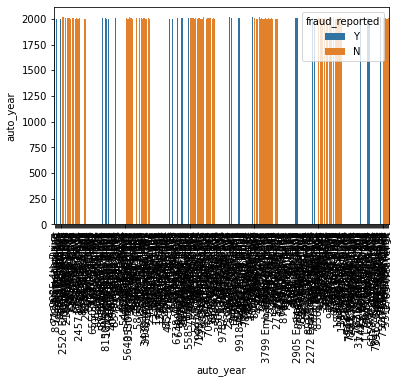

In [92]:
for i in numerical_variables:
    sns.barplot(df['incident_location'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

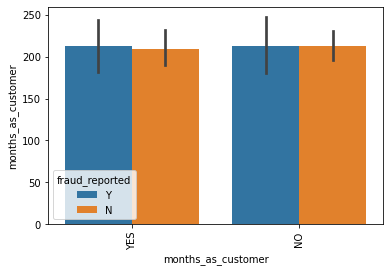

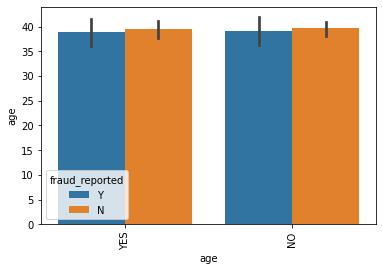

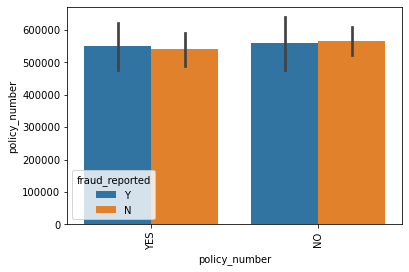

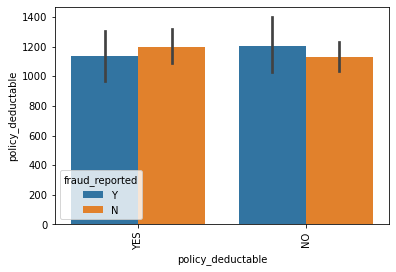

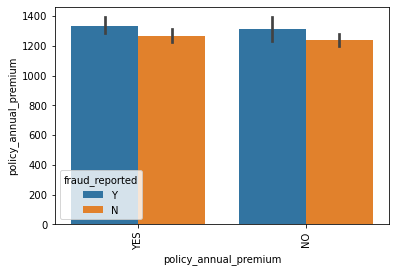

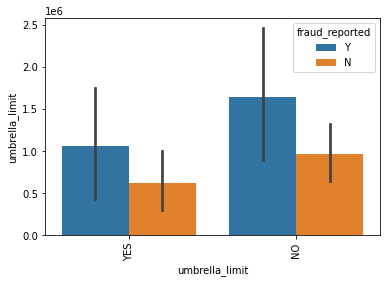

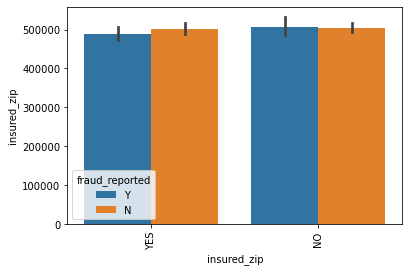

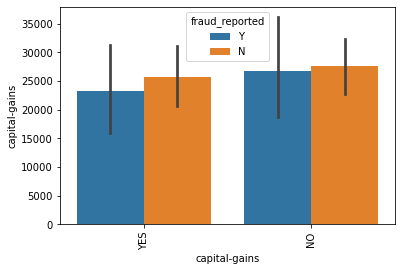

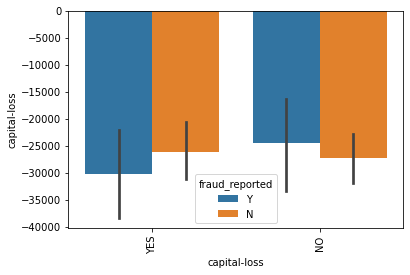

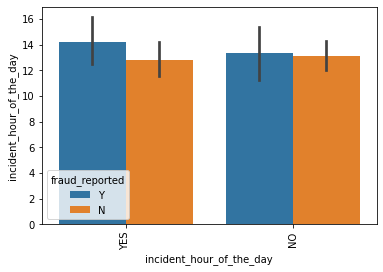

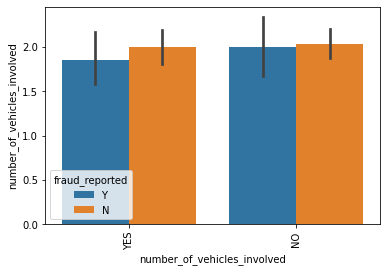

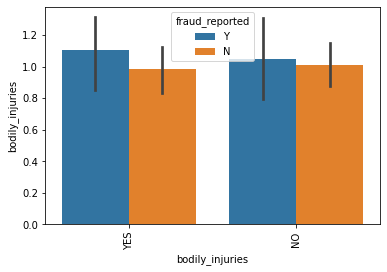

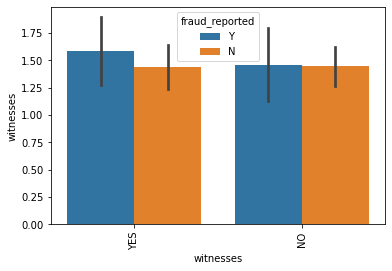

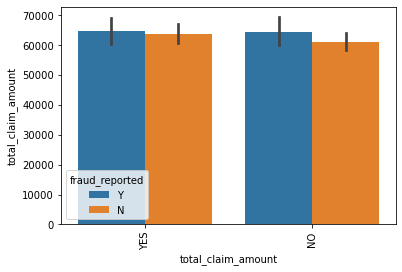

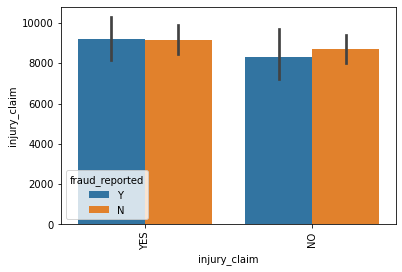

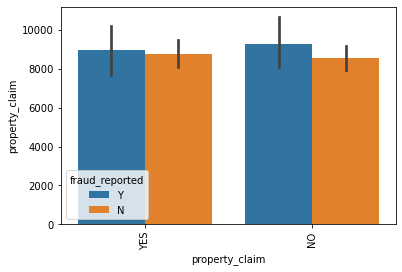

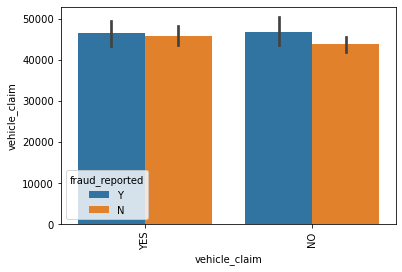

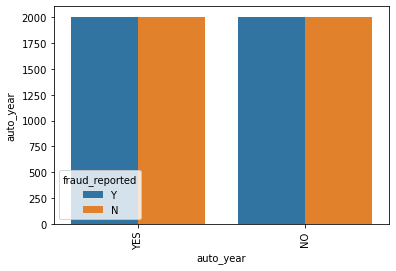

In [93]:
for i in numerical_variables:
    sns.barplot(df['property_damage'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

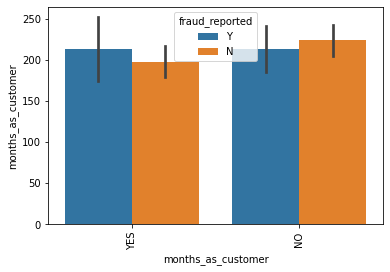

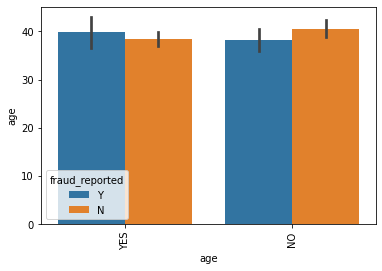

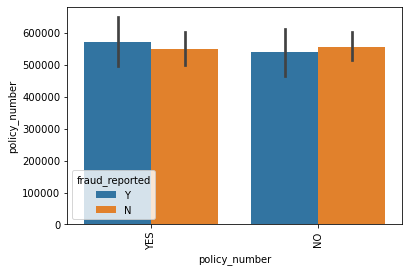

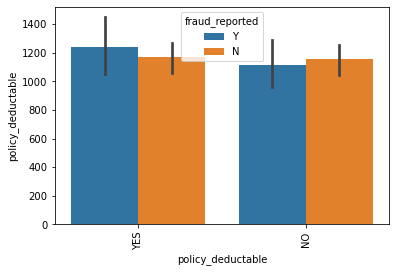

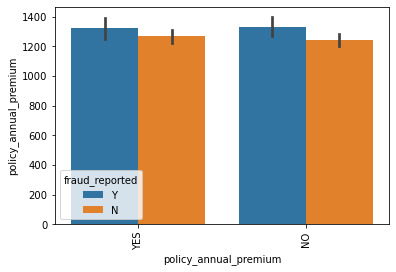

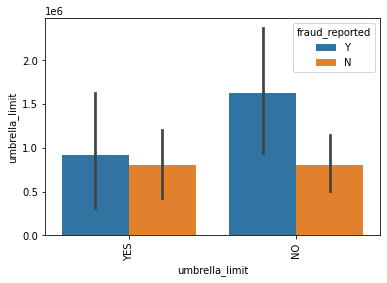

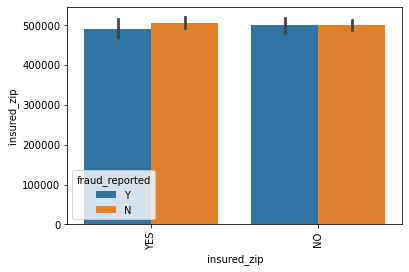

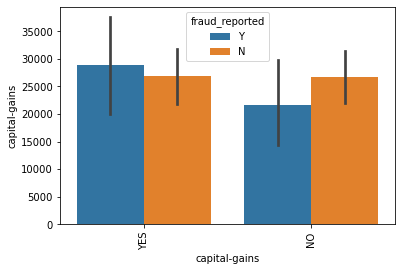

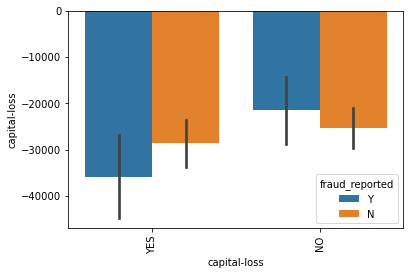

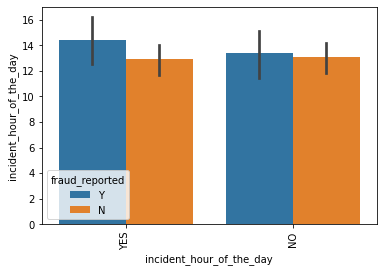

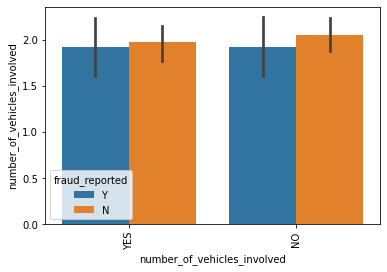

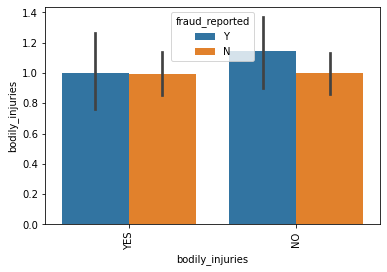

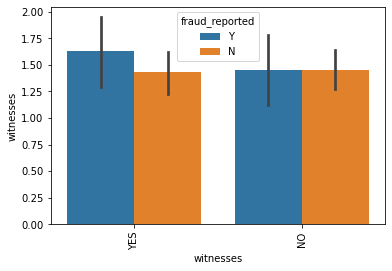

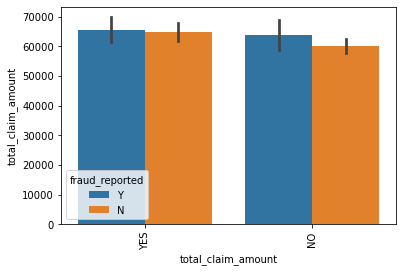

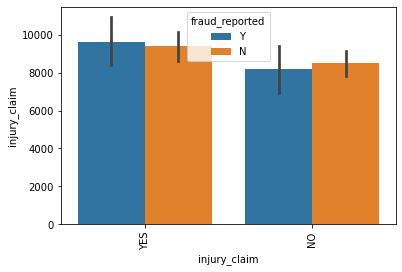

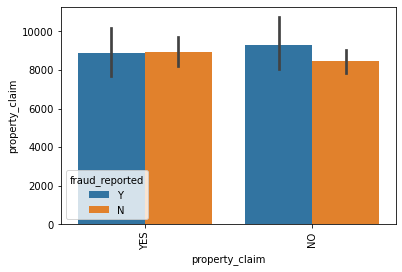

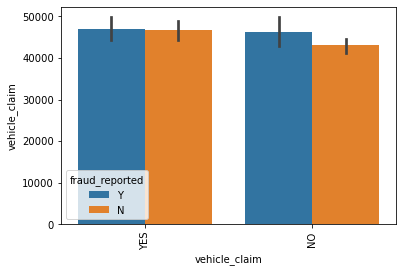

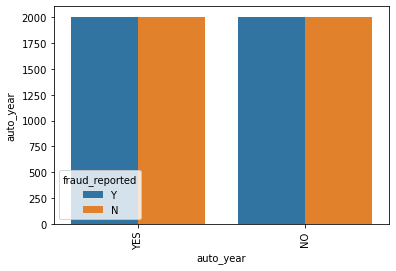

In [94]:
for i in numerical_variables:
    sns.barplot(df['police_report_available'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

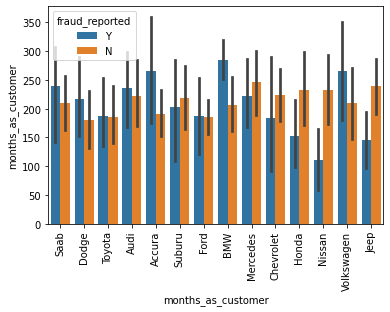

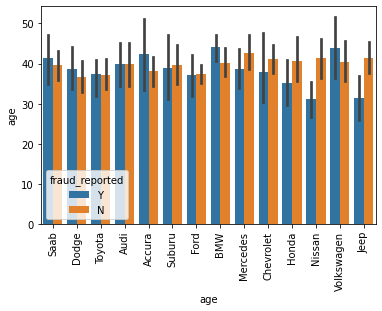

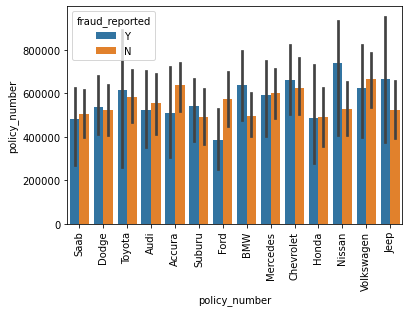

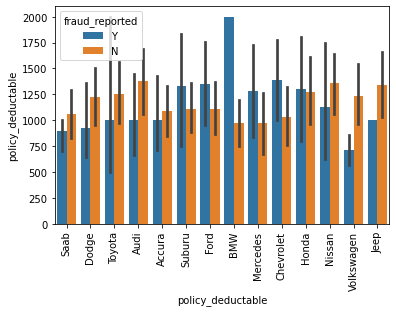

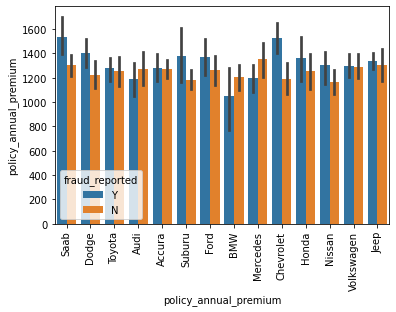

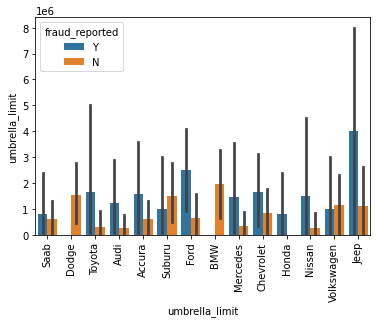

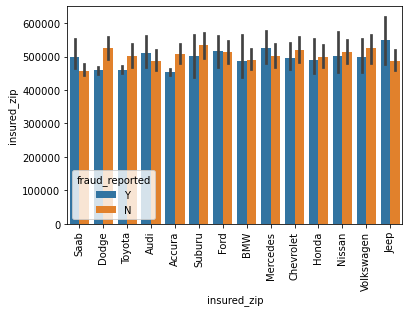

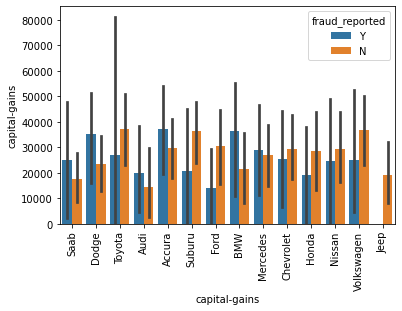

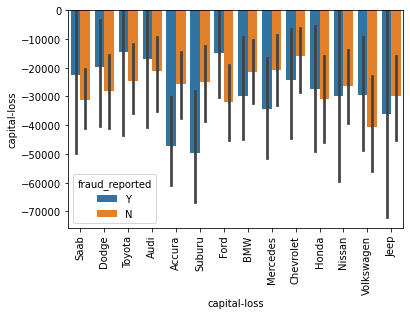

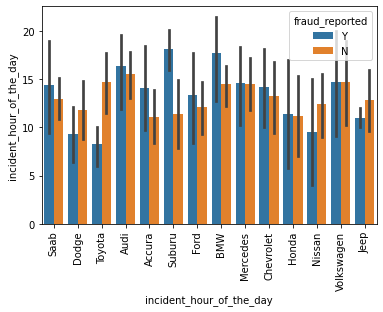

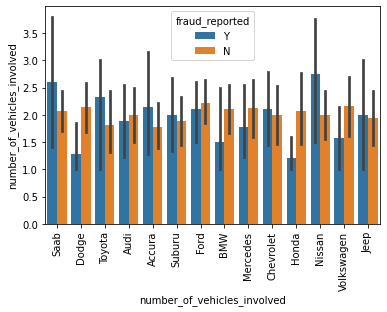

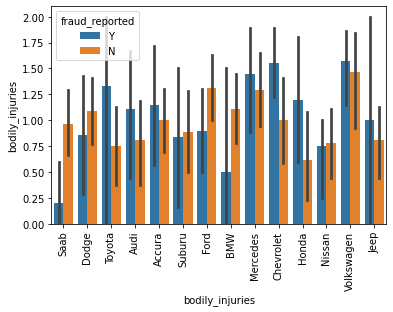

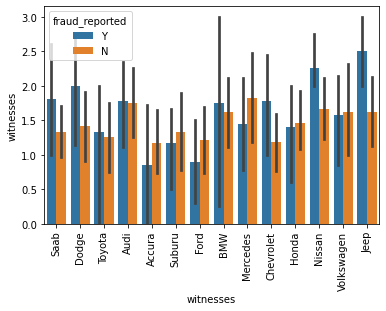

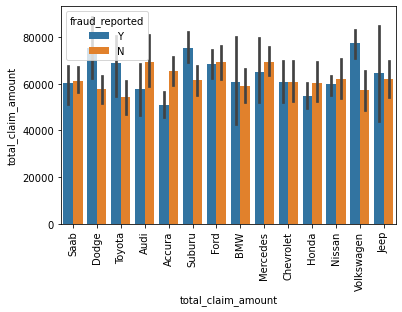

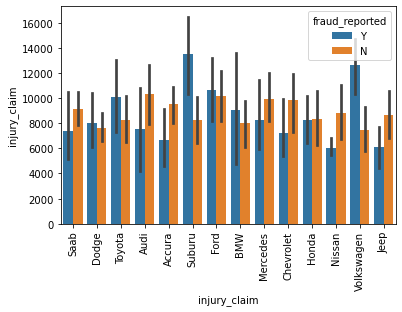

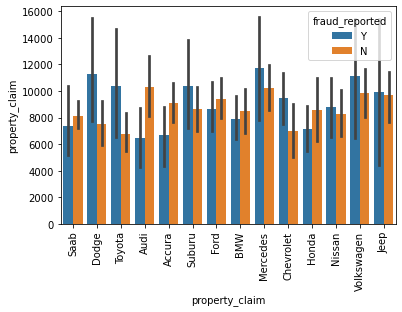

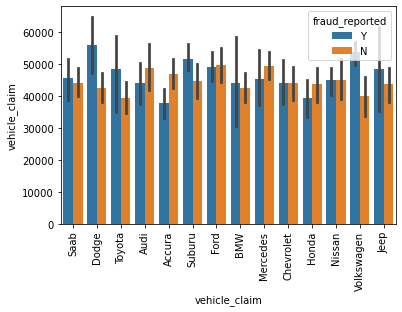

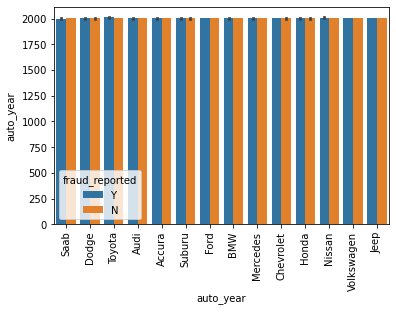

In [95]:
for i in numerical_variables:
    sns.barplot(df['auto_make'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

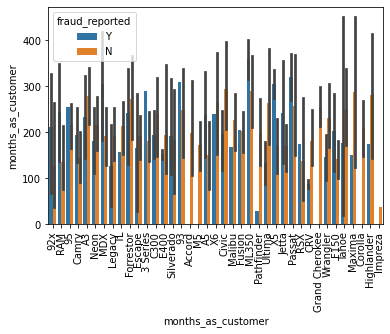

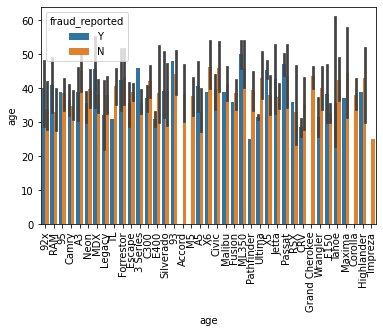

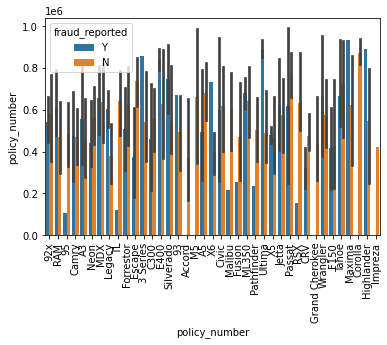

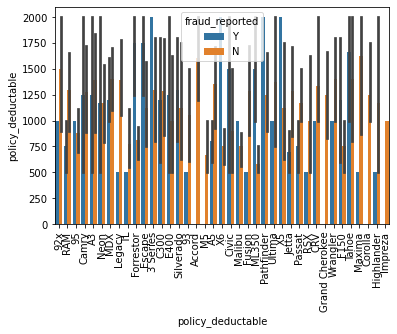

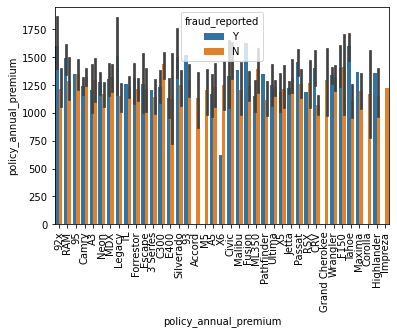

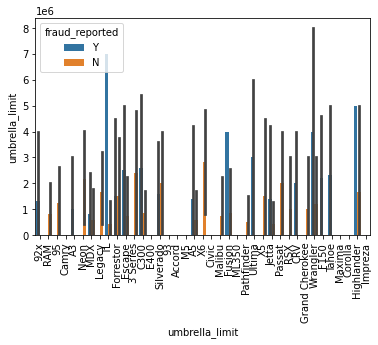

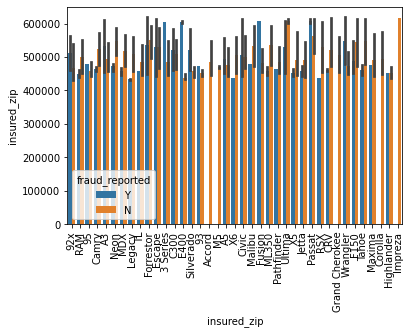

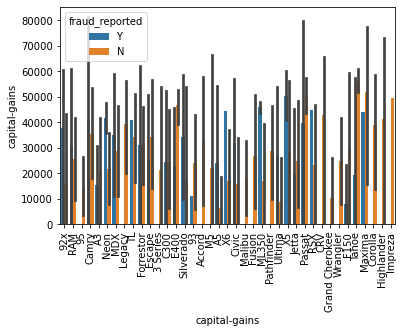

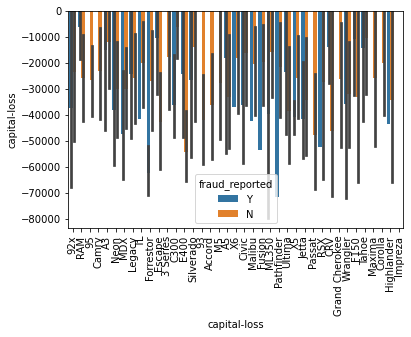

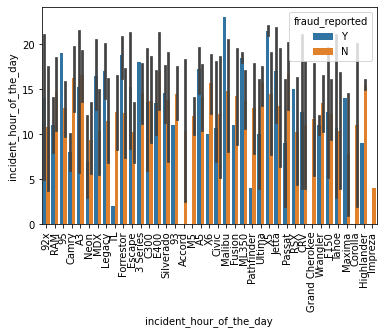

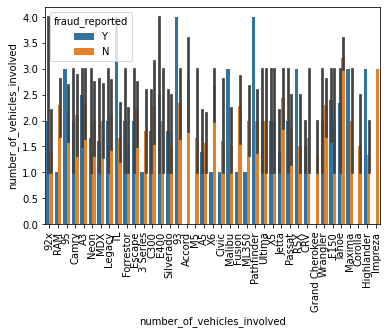

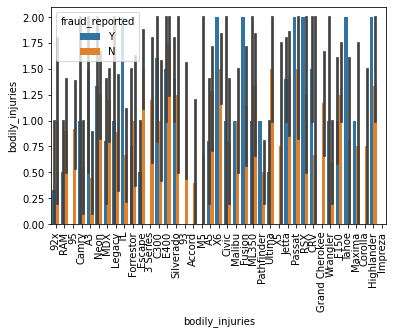

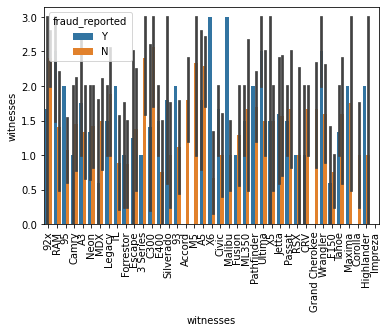

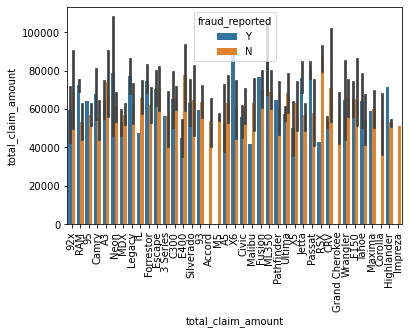

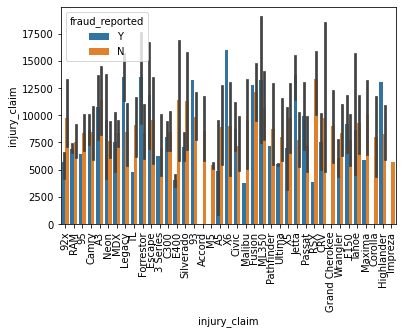

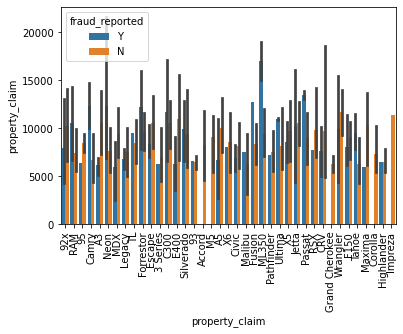

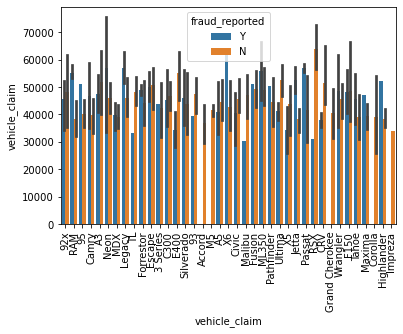

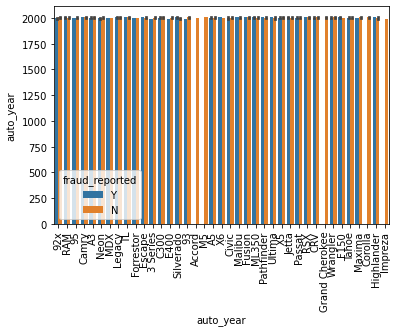

In [96]:
for i in numerical_variables:
    sns.barplot(df['auto_model'],df[i],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

In [97]:
#Drop incident_location
df.drop(['incident_location'],axis=1,inplace=True)

In [98]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'policy_bind_Day', 'policy_bind_Month',
       'policy_bind_Year', 'incident_Day', 'incident_Month', 'incident_Year'],
      dtype='object')

In [99]:
df.shape

(340, 42)

# Encoding

In [100]:
df.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                  328   48         521585           OH    250/500   
2                  134   29         687698           OH    100/300   
5                  256   39         104594           OH    250/500   
8                   27   33         485665           IL    100/300   
11                 447   61         214618           OH    100/300   

    policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                1000                1406.91               0       466132   
2                2000                1413.14         5000000       430632   
5                1000                1351.10               0       478456   
8                 500                1442.99               0       601734   
11               2000                1137.16               0       615561   

   insured_sex  ... auto_make auto_model auto_year fraud_reported  \
0         MALE  ...      Saab        92x      2004              Y   
2       FEMALE  ...     Dodge        RAM      2007              N   
5       FEMALE  ...      Saab         95      2003              Y   
8       FEMALE  ...    Toyota      Camry      2012              N   
11      FEMALE  ...      Audi         A3      2006              N   

    policy_bind_Day  policy_bind_Month policy_bind_Year incident_Day  \
0                17                 10             2014           25   
2                 9                  6             2000           22   
5                10                 12             2006            1   
8                 2                  5             1997           30   
11               29                  5             1999           15   

   incident_Month incident_Year  
0               1          2015  
2               2          2015  
5               2          2015  
8               1          2015  
11              2          2015  

[5 rows x 42 columns]

In [101]:
cat_var = df.select_dtypes(include=['O'])
cat_var

policy_state policy_csl insured_sex insured_education_level  \
0             OH    250/500        MALE                      MD   
2             OH    100/300      FEMALE                     PhD   
5             OH    250/500      FEMALE                     PhD   
8             IL    100/300      FEMALE                     PhD   
11            OH    100/300      FEMALE             High School   
..           ...        ...         ...                     ...   
980           IL   500/1000        MALE                     PhD   
984           IN    250/500        MALE                      MD   
988           IN    100/300      FEMALE             High School   
991           OH    100/300        MALE                      MD   
992           IN    100/300        MALE                      MD   

    insured_occupation insured_hobbies insured_relationship  \
0         craft-repair        sleeping              husband   
2                sales     board-games            own-child   
5         tech-support  bungie-jumping            unmarried   
8        other-service            golf            own-child   
11     exec-managerial       skydiving       other-relative   
..                 ...             ...                  ...   
980  handlers-cleaners         camping            unmarried   
984      other-service       cross-fit              husband   
988       armed-forces         dancing                 wife   
991      other-service      basketball       other-relative   
992    exec-managerial         camping              husband   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
5     Multi-vehicle Collision   Rear Collision      Major Damage   
8    Single Vehicle Collision  Front Collision        Total Loss   
11    Multi-vehicle Collision  Front Collision      Major Damage   
..                        ...              ...               ...   
980  Single Vehicle Collision   Rear Collision      Minor Damage   
984  Single Vehicle Collision   Side Collision        Total Loss   
988  Single Vehicle Collision   Rear Collision      Minor Damage   
991  Single Vehicle Collision   Rear Collision        Total Loss   
992   Multi-vehicle Collision  Front Collision      Major Damage   

    authorities_contacted incident_state incident_city property_damage  \
0                  Police             SC      Columbus             YES   
2                  Police             NY      Columbus              NO   
5                    Fire             SC     Arlington              NO   
8                  Police             WV     Arlington              NO   
11                   Fire             SC   Springfield             YES   
..                    ...            ...           ...             ...   
980             Ambulance             OH     Northbend             YES   
984             Ambulance             WV   Springfield             YES   
988                  Fire             NY      Columbus             YES   
991                 Other             WV     Riverwood              NO   
992                  Fire             OH   Springfield             YES   

    police_report_available auto_make  auto_model fraud_reported  
0                       YES      Saab         92x              Y  
2                        NO     Dodge         RAM              N  
5                        NO      Saab          95              Y  
8                       YES    Toyota       Camry              N  
11                      YES      Audi          A3              N  
..                      ...       ...         ...            ...  
980                     YES    Suburu   Forrestor              N  
984                      NO    Toyota     Corolla              N  
988                      NO     Honda       Civic              N  
991                      NO    Accura          TL              N  

I have used LabelEncoder to convert the object datatype values present in our target label column into numerical format.

In [102]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

In [103]:
le = LabelEncoder()

In [104]:
for feature in cat_var:
    df[feature] = le.fit_transform(df[feature])
    df[feature]

In [105]:
df.head()

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                  328   48         521585             2           1   
2                  134   29         687698             2           0   
5                  256   39         104594             2           1   
8                   27   33         485665             0           0   
11                 447   61         214618             2           0   

    policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                1000                1406.91               0       466132   
2                2000                1413.14         5000000       430632   
5                1000                1351.10               0       478456   
8                 500                1442.99               0       601734   
11               2000                1137.16               0       615561   

    insured_sex  ...  auto_make  auto_model  auto_year  fraud_reported  \
0             1  ...         10           1       2004               1   
2             0  ...          4          30       2007               0   
5             0  ...         10           3       2003               1   
8             0  ...         12           9       2012               0   
11            0  ...          1           4       2006               0   

    policy_bind_Day  policy_bind_Month  policy_bind_Year  incident_Day  \
0                17                 10              2014            25   
2                 9                  6              2000            22   
5                10                 12              2006             1   
8                 2                  5              1997            30   
11               29                  5              1999            15   

    incident_Month  incident_Year  
0                1           2015  
2                2           2015  
5                2           2015  
8                1           2015  
11               2           2015  

[5 rows x 42 columns]

In [106]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries          

In [107]:
df.drop(['incident_Year'],axis=1,inplace=True)

# Correlation Matrix

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [108]:
df_corr = df.corr()

df_corr

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.948106       0.018708   
age                                    0.948106  1.000000       0.032417   
policy_number                          0.018708  0.032417       1.000000   
policy_state                          -0.012292 -0.038303       0.057217   
policy_csl                            -0.041673 -0.064268       0.027664   
policy_deductable                      0.055476  0.053310      -0.024442   
policy_annual_premium                 -0.029872 -0.019726       0.081936   
umbrella_limit                        -0.076510 -0.090816      -0.026299   
insured_zip                           -0.039929 -0.044295       0.057287   
insured_sex                            0.055128  0.065191       0.042693   
insured_education_level               -0.067662 -0.056546      -0.023220   
insured_occupation                    -0.023693 -0.007949       0.009576   
insured_hobbies                       -0.113410 -0.074127       0.021736   
insured_relationship                   0.068373  0.075511       0.009178   
capital-gains                          0.007731 -0.025867      -0.029474   
capital-loss                           0.028531  0.018863      -0.070648   
incident_type                         -0.003004  0.003079       0.014955   
collision_type                        -0.119329 -0.133114      -0.024489   
incident_severity                     -0.048088 -0.051098      -0.030486   
authorities_contacted                 -0.027603 -0.032630       0.057048   
incident_state                         0.032287  0.016925      -0.039154   
incident_city                          0.034963  0.027913      -0.053430   
incident_hour_of_the_day               0.034657  0.064314      -0.054411   
number_of_vehicles_involved            0.001372 -0.000958      -0.023326   
property_damage                       -0.011244 -0.009648      -0.041029   
bodily_injuries                        0.003291 -0.020842       0.022052   
witnesses                              0.016726  0.020510       0.063691   
police_report_available               -0.087360 -0.065445       0.006378   
total_claim_amount                     0.102402  0.091621       0.023322   
injury_claim                           0.112963  0.112108      -0.005520   
property_claim                         0.059356  0.036183       0.051863   
vehicle_claim                          0.084537  0.077557       0.017157   
auto_make                              0.013900  0.019431      -0.005005   
auto_model                             0.012786  0.029416       0.075780   
auto_year                              0.010766  0.000396       0.095868   
fraud_reported                         0.005492 -0.030866      -0.001114   
policy_bind_Day                       -0.022798 -0.047117       0.052525   
policy_bind_Month                     -0.077774 -0.062914       0.030142   
policy_bind_Year                      -0.062494 -0.034329      -0.038746   
incident_Day                          -0.048048 -0.052494       0.044980   
incident_Month                         0.010448  0.013247      -0.046769   

                             policy_state  policy_csl  policy_deductable  \
months_as_customer              -0.012292   -0.041673           0.055476   
age                             -0.038303   -0.064268           0.053310   
policy_number                    0.057217    0.027664          -0.024442   
policy_state                     1.000000   -0.030112           0.015171   
policy_csl                      -0.030112    1.000000          -0.048760   
policy_deductable                0.015171   -0.048760           1.000000   
policy_annual_premium           -0.001229    0.001410          -0.039364   
umbrella_limit                   0.012753   -0.011518          -0.039608   
insured_zip                      0.037965   -0.087683           0.008463   
insured_sex                     -0.000166    0.051527          -0.101365   


<AxesSubplot:>

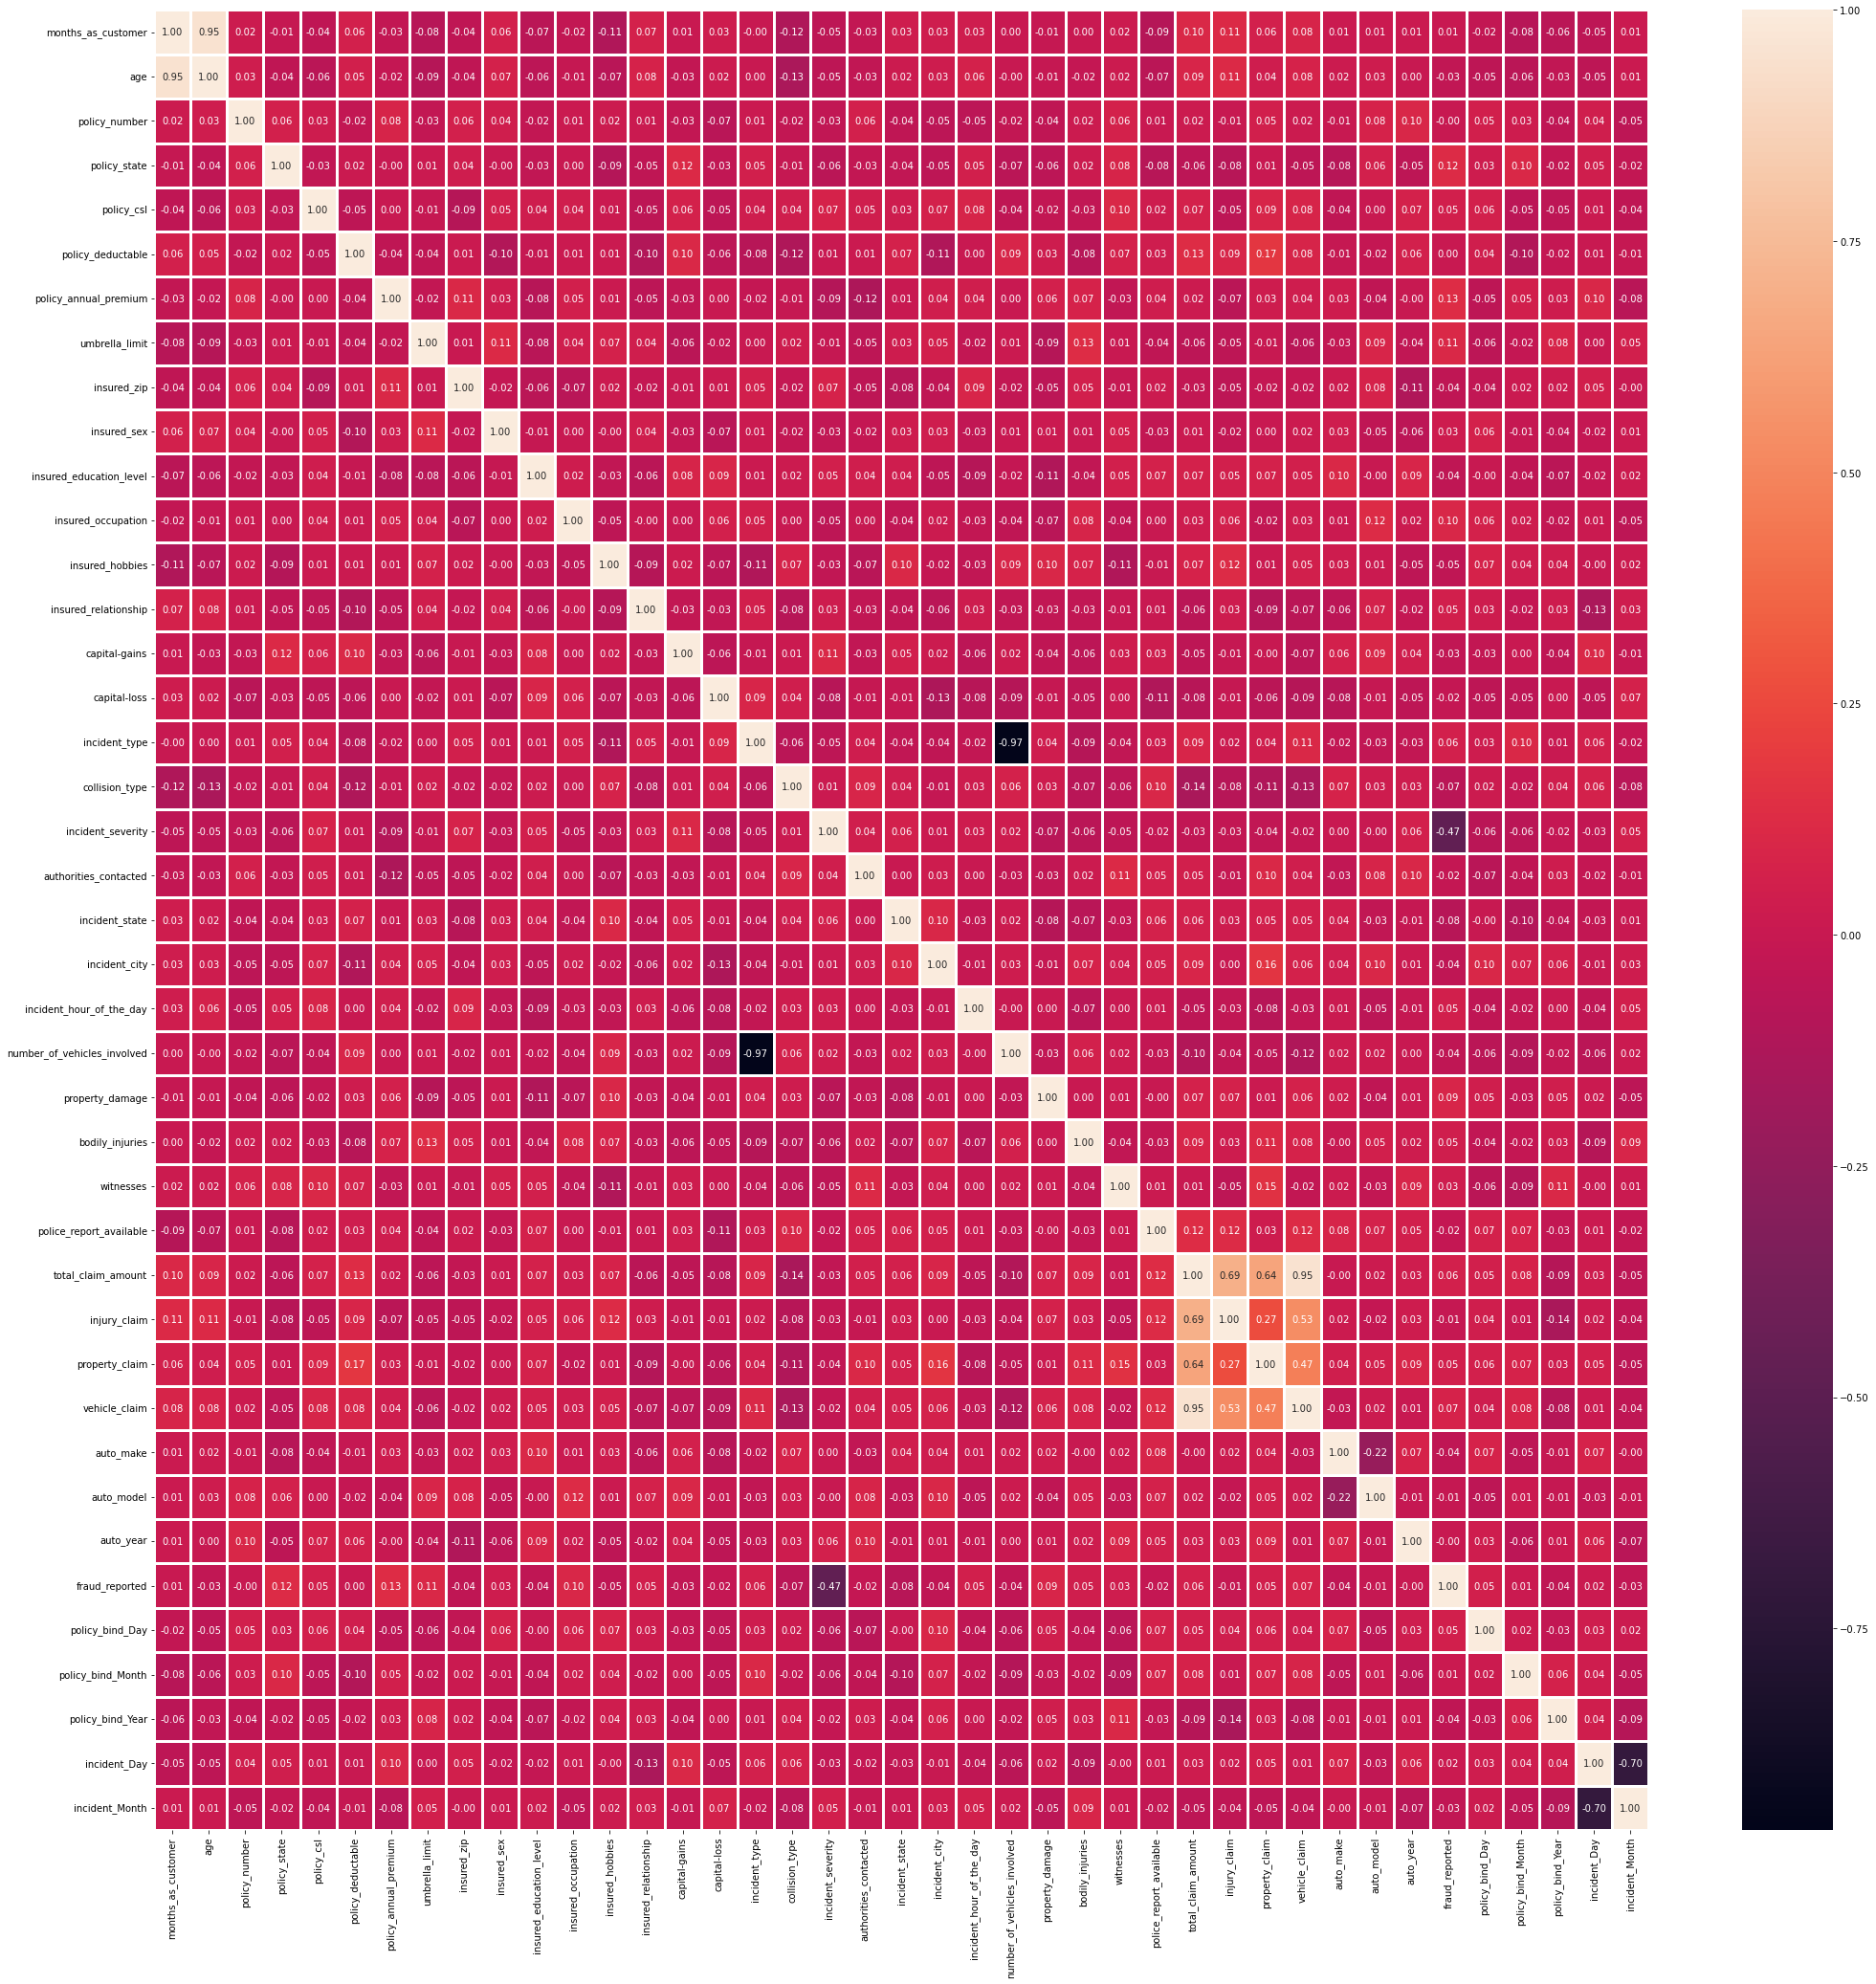

In [109]:
plt.figure(figsize=(35,35))
sns.heatmap(df_corr,annot=True,linecolor='white',linewidths=3,fmt='0.2f')

In the above heatmap we are not able to see the correlation details details but we can make out that there are few columns which are multicollinear. However they seem to add weightage over the label prediction therefore we shall retain them all.

From the above correlation I see there are multicollinearaties bewteen feature variables.I will also check for vif score to determine multicollinearity.

Comparing Feature Variables with Target variable

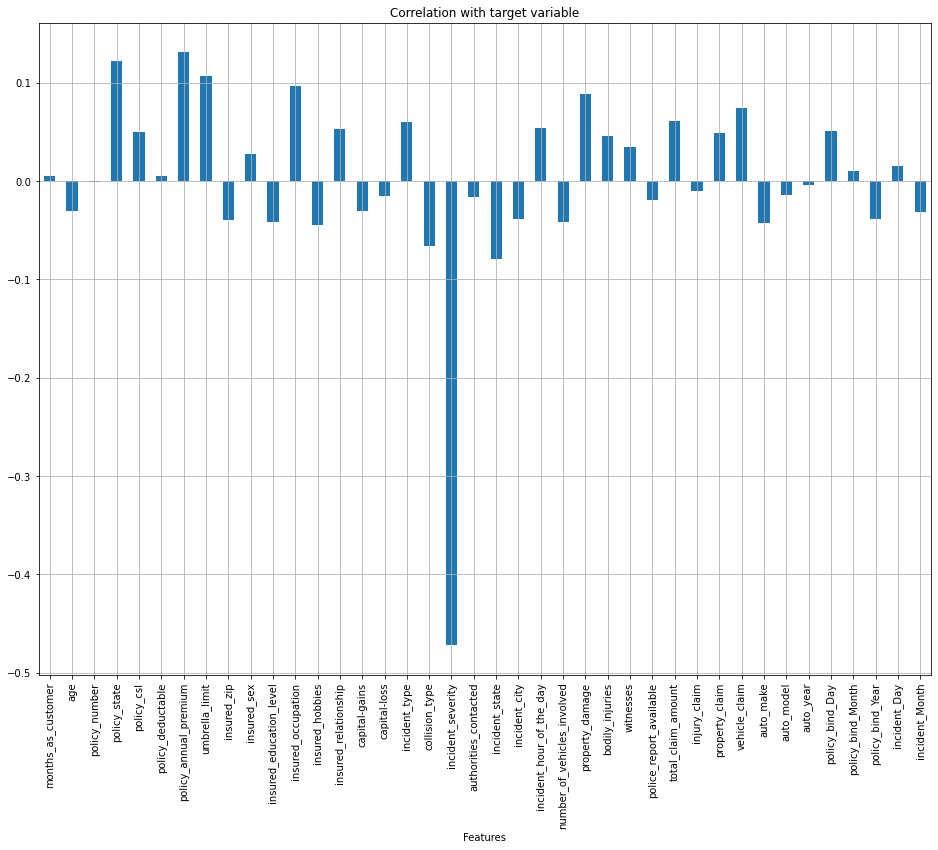

In [110]:
plt.figure(figsize=(16,12))
df.drop('fraud_reported',axis=1).corrwith(df['fraud_reported']).plot(kind='bar',grid=True)
plt.title('Correlation with target variable');
plt.xlabel("Features");

Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that more than half the feature columns are positively correlated with our target label while all the remaining features are negatively correlated with our label column. This indicates that they are all required for the prediction of our classification label.

VIF

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['features'] = df.columns

vif

vif                     features
0   5.104811e+01           months_as_customer
1   2.145625e+02                          age
2   5.760866e+00                policy_number
3   3.000365e+00                 policy_state
4   2.606606e+00                   policy_csl
5   5.436733e+00            policy_deductable
6   3.169123e+01        policy_annual_premium
7   1.374066e+00               umbrella_limit
8   5.620462e+01                  insured_zip
9   2.064776e+00                  insured_sex
10  4.001584e+00      insured_education_level
11  4.210577e+00           insured_occupation
12  4.504940e+00              insured_hobbies
13  3.348595e+00         insured_relationship
14  2.145356e+00                capital-gains
15  2.178568e+00                 capital-loss
16  3.806836e+01                incident_type
17  3.058540e+00               collision_type
18  3.855470e+00            incident_severity
19  3.084029e+00        authorities_contacted
20  3.494512e+00               incident_state
21  3.833163e+00                incident_city
22  5.435954e+00     incident_hour_of_the_day
23  8.395780e+01  number_of_vehicles_involved
24  2.100306e+00              property_damage
25  2.989251e+00              bodily_injuries
26  3.172657e+00                    witnesses
27  2.045871e+00      police_report_available
28           inf           total_claim_amount
29           inf                 injury_claim
30           inf               property_claim
31           inf                vehicle_claim
32  3.903148e+00                    auto_make
33  4.478825e+00                   auto_model
34  5.032832e+04                    auto_year
35  1.959197e+00               fraud_reported
36  4.782175e+00              policy_bind_Day
37  5.221922e+00            policy_bind_Month
38  5.026935e+04             policy_bind_Year
39  5.605547e+00                 incident_Day
40  4.396487e+00               incident_Month

In [112]:
df.shape

(340, 41)

# Feature Selection

In [113]:
from sklearn.feature_selection import SelectKBest,f_classif

In [114]:
X = df.drop(['fraud_reported'],axis=1)
Y = df['fraud_reported']

In [115]:
X.shape

(340, 40)

In [116]:
Y.shape

(340,)

In [117]:
best_features = SelectKBest(score_func=f_classif,k=40)
fit = best_features.fit(X,Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']

feature_scores.nlargest(40,'Score')

Feature_Name      Score
18            incident_severity  96.892515
6         policy_annual_premium   5.889039
3                  policy_state   5.095850
7                umbrella_limit   3.874673
11           insured_occupation   3.159145
24              property_damage   2.659476
20               incident_state   2.138929
31                vehicle_claim   1.859603
17               collision_type   1.475552
28           total_claim_amount   1.265499
16                incident_type   1.236045
22     incident_hour_of_the_day   0.992552
13         insured_relationship   0.964274
35              policy_bind_Day   0.868597
4                    policy_csl   0.834971
30               property_claim   0.794541
25              bodily_injuries   0.697818
12              insured_hobbies   0.691110
32                    auto_make   0.615491
23  number_of_vehicles_involved   0.585580
10      insured_education_level   0.574779
8                   insured_zip   0.531919
37             policy_bind_Year   0.517693
21                incident_city   0.510816
26                    witnesses   0.393150
39               incident_Month   0.333368
1                           age   0.322333
14                capital-gains   0.309097
9                   insured_sex   0.254953
27      police_report_available   0.122534
19        authorities_contacted   0.092819
15                 capital-loss   0.082572
38                 incident_Day   0.076557
33                   auto_model   0.068907
29                 injury_claim   0.036629
36            policy_bind_Month   0.031705
0            months_as_customer   0.010194
5             policy_deductable   0.007471
34                    auto_year   0.006025
2                 policy_number   0.000420

In [118]:
X.skew()

months_as_customer             0.338101
age                            0.352151
policy_number                  0.021584
policy_state                  -0.150381
policy_csl                     0.144780
policy_deductable              0.418490
policy_annual_premium          0.016898
umbrella_limit                 1.983618
insured_zip                    0.800355
insured_sex                    0.070946
insured_education_level       -0.069920
insured_occupation            -0.091108
insured_hobbies                0.025903
insured_relationship           0.135165
capital-gains                  0.372552
capital-loss                  -0.325099
incident_type                 -0.047281
collision_type                -0.079951
incident_severity             -0.091089
authorities_contacted          0.052442
incident_state                -0.054607
incident_city                 -0.014666
incident_hour_of_the_day      -0.382305
number_of_vehicles_involved    0.240410
property_damage                0.094640


# Checking for outliers

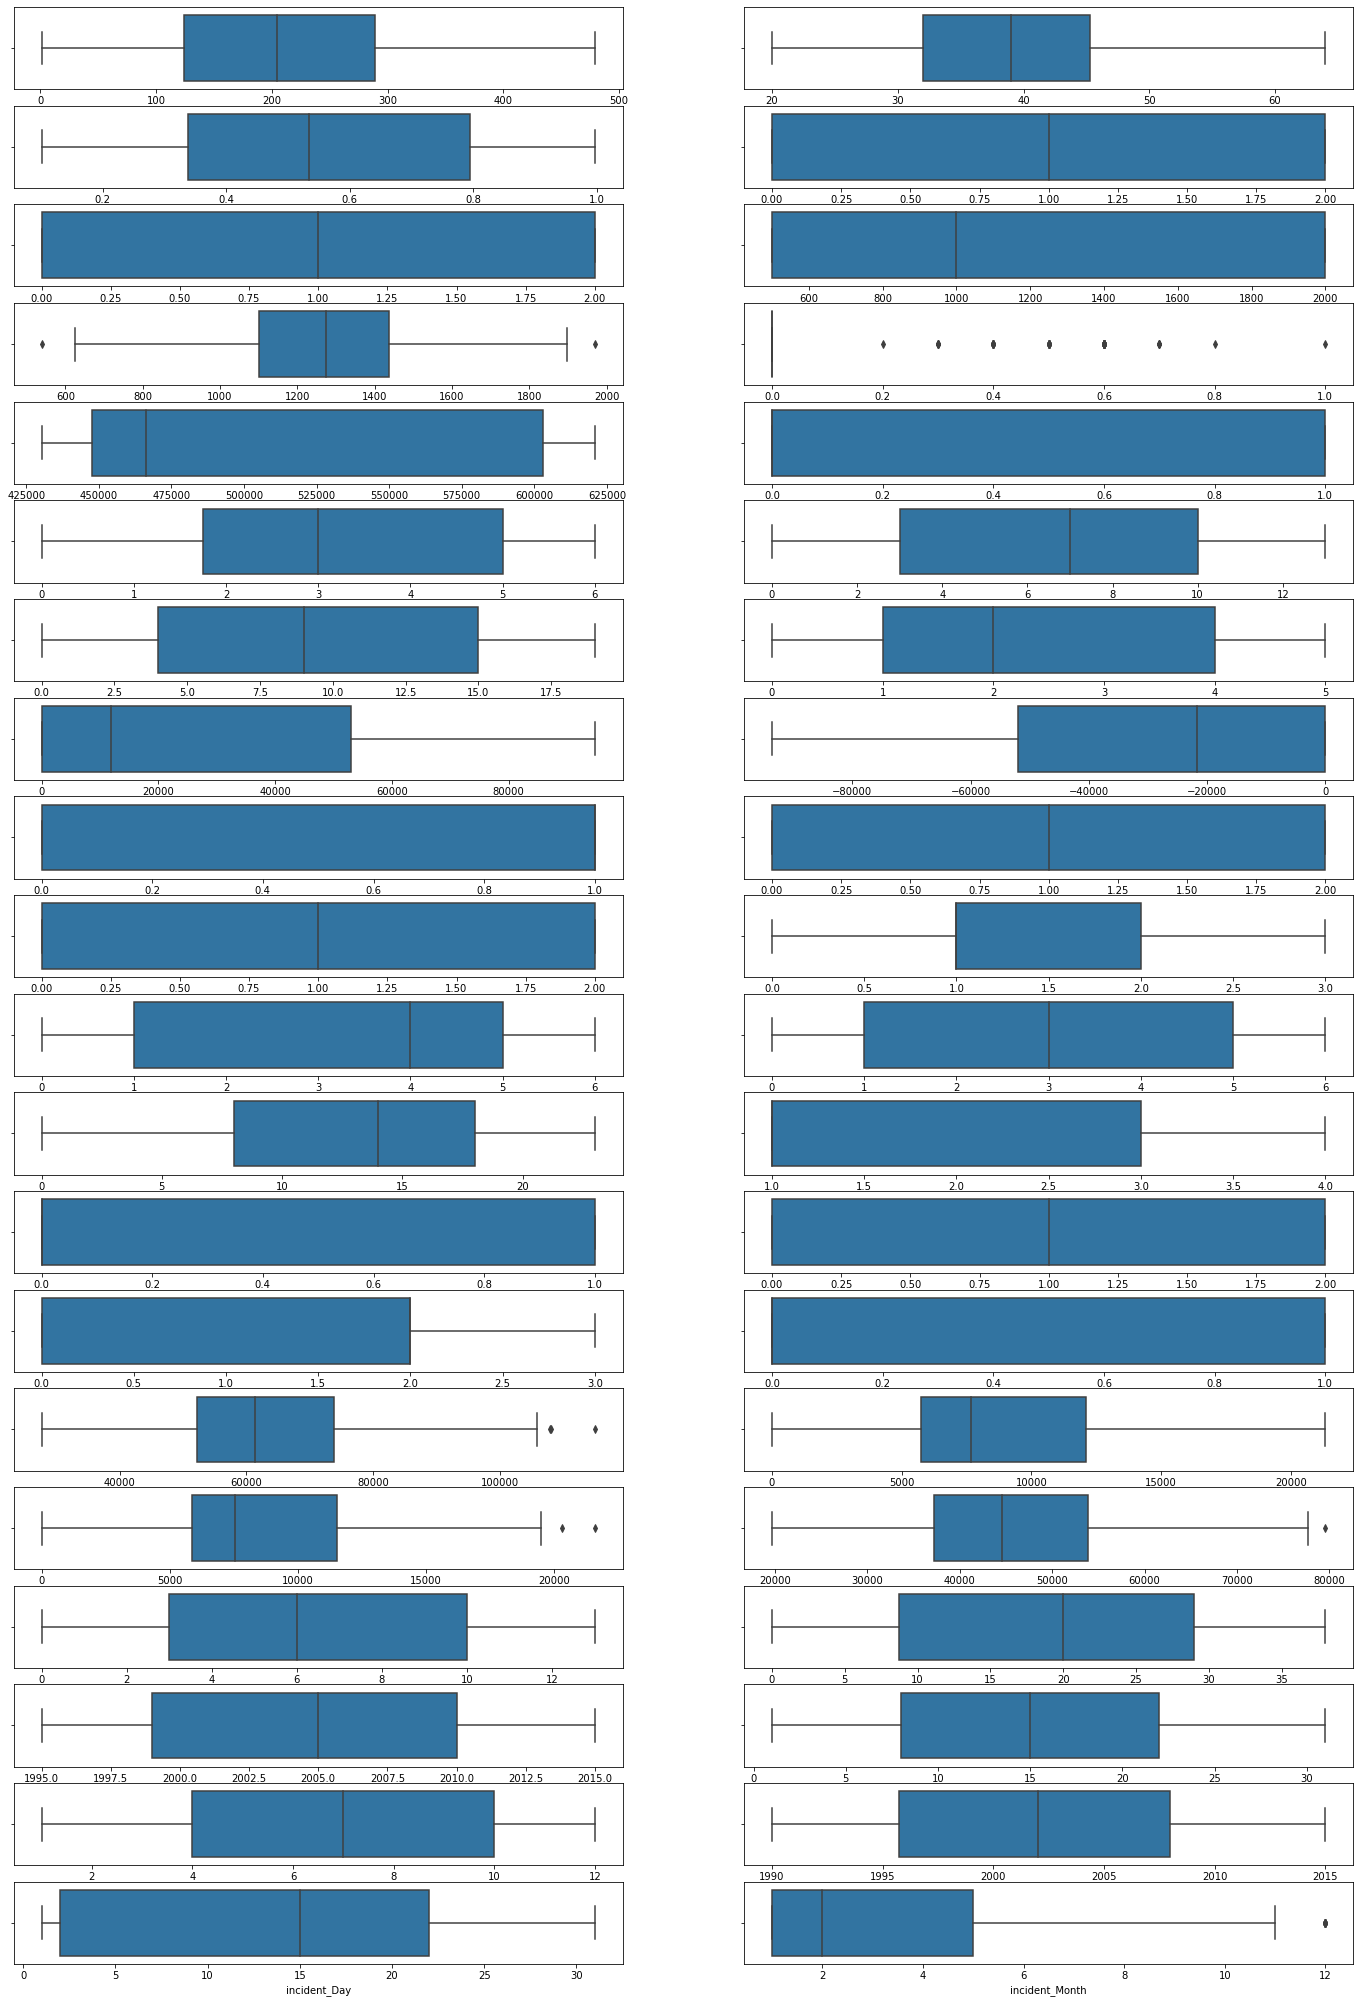

In [119]:
#Outlier Checking 
plt.figure(figsize=(24,36),facecolor='white')
plotno = 1
for i in X:
    if plotno <= 40:
        ax = plt.subplot(20,2,plotno)
        sns.boxplot(df[i])
    plotno += 1
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)
1.1238563622105184


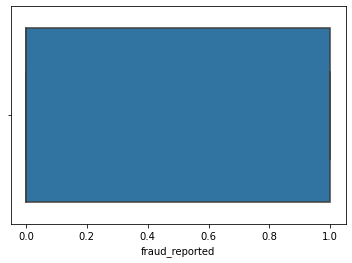

In [120]:
#Check outliers in Y
print(sns.boxplot(Y))
print(Y.skew())

# Power Transformer

In [121]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X = pd.DataFrame(pt.fit_transform(X),columns=X.columns)
print(X)
X.shape[1]

     months_as_customer       age  policy_number  policy_state  policy_csl  \
0              1.017621  0.941543      -0.049419      1.087351    0.237832   
1             -0.614297 -1.155797       0.541711      1.087351   -1.208257   
2              0.463464  0.038918      -1.880192      1.087351    0.237832   
3             -1.912842 -0.647817      -0.183666     -1.311936   -1.208257   
4              1.853205  2.054466      -1.312926      1.087351   -1.208257   
..                  ...       ...            ...           ...         ...   
335            0.374554  0.146022       1.271346     -1.311936    1.252803   
336           -0.336186 -0.294416       1.477867     -0.054974    0.237832   
337            0.769159  0.751984       0.204043     -0.054974   -1.208257   
338            0.471484  0.556527      -1.852789      1.087351   -1.208257   
339           -1.032954 -1.569814      -1.309812     -0.054974   -1.208257   

     policy_deductable  policy_annual_premium  umbrella_limit  

40

# Feature Selection

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
print(X_scaled)
X_scaled.shape[1]

     months_as_customer       age  policy_number  policy_state  policy_csl  \
0              1.017621  0.941543      -0.049419      1.087351    0.237832   
1             -0.614297 -1.155797       0.541711      1.087351   -1.208257   
2              0.463464  0.038918      -1.880192      1.087351    0.237832   
3             -1.912842 -0.647817      -0.183666     -1.311936   -1.208257   
4              1.853205  2.054466      -1.312926      1.087351   -1.208257   
..                  ...       ...            ...           ...         ...   
335            0.374554  0.146022       1.271346     -1.311936    1.252803   
336           -0.336186 -0.294416       1.477867     -0.054974    0.237832   
337            0.769159  0.751984       0.204043     -0.054974   -1.208257   
338            0.471484  0.556527      -1.852789      1.087351   -1.208257   
339           -1.032954 -1.569814      -1.309812     -0.054974   -1.208257   

     policy_deductable  policy_annual_premium  umbrella_limit  

40

In [123]:
X_scaled_corr = X_scaled.corr()
X_scaled_corr

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.927892       0.008876   
age                                    0.927892  1.000000       0.021235   
policy_number                          0.008876  0.021235       1.000000   
policy_state                          -0.007294 -0.041503       0.057843   
policy_csl                            -0.035420 -0.063577       0.046393   
policy_deductable                      0.044558  0.045037      -0.045625   
policy_annual_premium                 -0.024899 -0.011013       0.078084   
umbrella_limit                        -0.084314 -0.107045      -0.034157   
insured_zip                           -0.033844 -0.042720       0.049435   
insured_sex                            0.049676  0.065322       0.037360   
insured_education_level               -0.065667 -0.050500      -0.020806   
insured_occupation                    -0.032976 -0.013201       0.014421   
insured_hobbies                       -0.127505 -0.077954       0.022381   
insured_relationship                   0.071600  0.076948      -0.005742   
capital-gains                          0.015547 -0.031354      -0.035382   
capital-loss                          -0.007124 -0.020398      -0.061072   
incident_type                         -0.004168  0.004029       0.023287   
collision_type                        -0.121390 -0.131243      -0.019383   
incident_severity                     -0.041510 -0.040444      -0.033802   
authorities_contacted                 -0.033370 -0.033623       0.062483   
incident_state                         0.031540  0.016915      -0.039818   
incident_city                          0.043503  0.024966      -0.056034   
incident_hour_of_the_day               0.027311  0.068180      -0.054846   
number_of_vehicles_involved            0.001810 -0.003069      -0.028121   
property_damage                       -0.024911 -0.018796      -0.043903   
bodily_injuries                        0.004918 -0.027827       0.024854   
witnesses                              0.019245  0.028724       0.069753   
police_report_available               -0.084411 -0.060239       0.006581   
total_claim_amount                     0.094819  0.084623       0.032227   
injury_claim                           0.094839  0.087333       0.007085   
property_claim                         0.049677  0.026259       0.061771   
vehicle_claim                          0.079063  0.073308       0.024072   
auto_make                              0.007725  0.017847      -0.011653   
auto_model                             0.010889  0.020115       0.080410   
auto_year                              0.020799  0.004900       0.089915   
policy_bind_Day                       -0.019455 -0.054106       0.053747   
policy_bind_Month                     -0.069892 -0.055969       0.032502   
policy_bind_Year                      -0.057475 -0.026156      -0.042608   
incident_Day                          -0.045924 -0.057963       0.050966   
incident_Month                         0.031217  0.038553      -0.047416   

                             policy_state  policy_csl  policy_deductable  \
months_as_customer              -0.007294   -0.035420           0.044558   
age                             -0.041503   -0.063577           0.045037   
policy_number                    0.057843    0.046393          -0.045625   
policy_state                     1.000000   -0.024721           0.027847   
policy_csl                      -0.024721    1.000000          -0.062958   
policy_deductable                0.027847   -0.062958           1.000000   
policy_annual_premium           -0.001033    0.007314          -0.035693   
umbrella_limit                   0.039000   -0.000414          -0.040127   
insured_zip                      0.044546   -0.084192           0.007028   
insured_sex                      0.000604    0.061782          -0.099366   
insured_education_level         -0.032530    0.030846          -0.028104   


<AxesSubplot:>

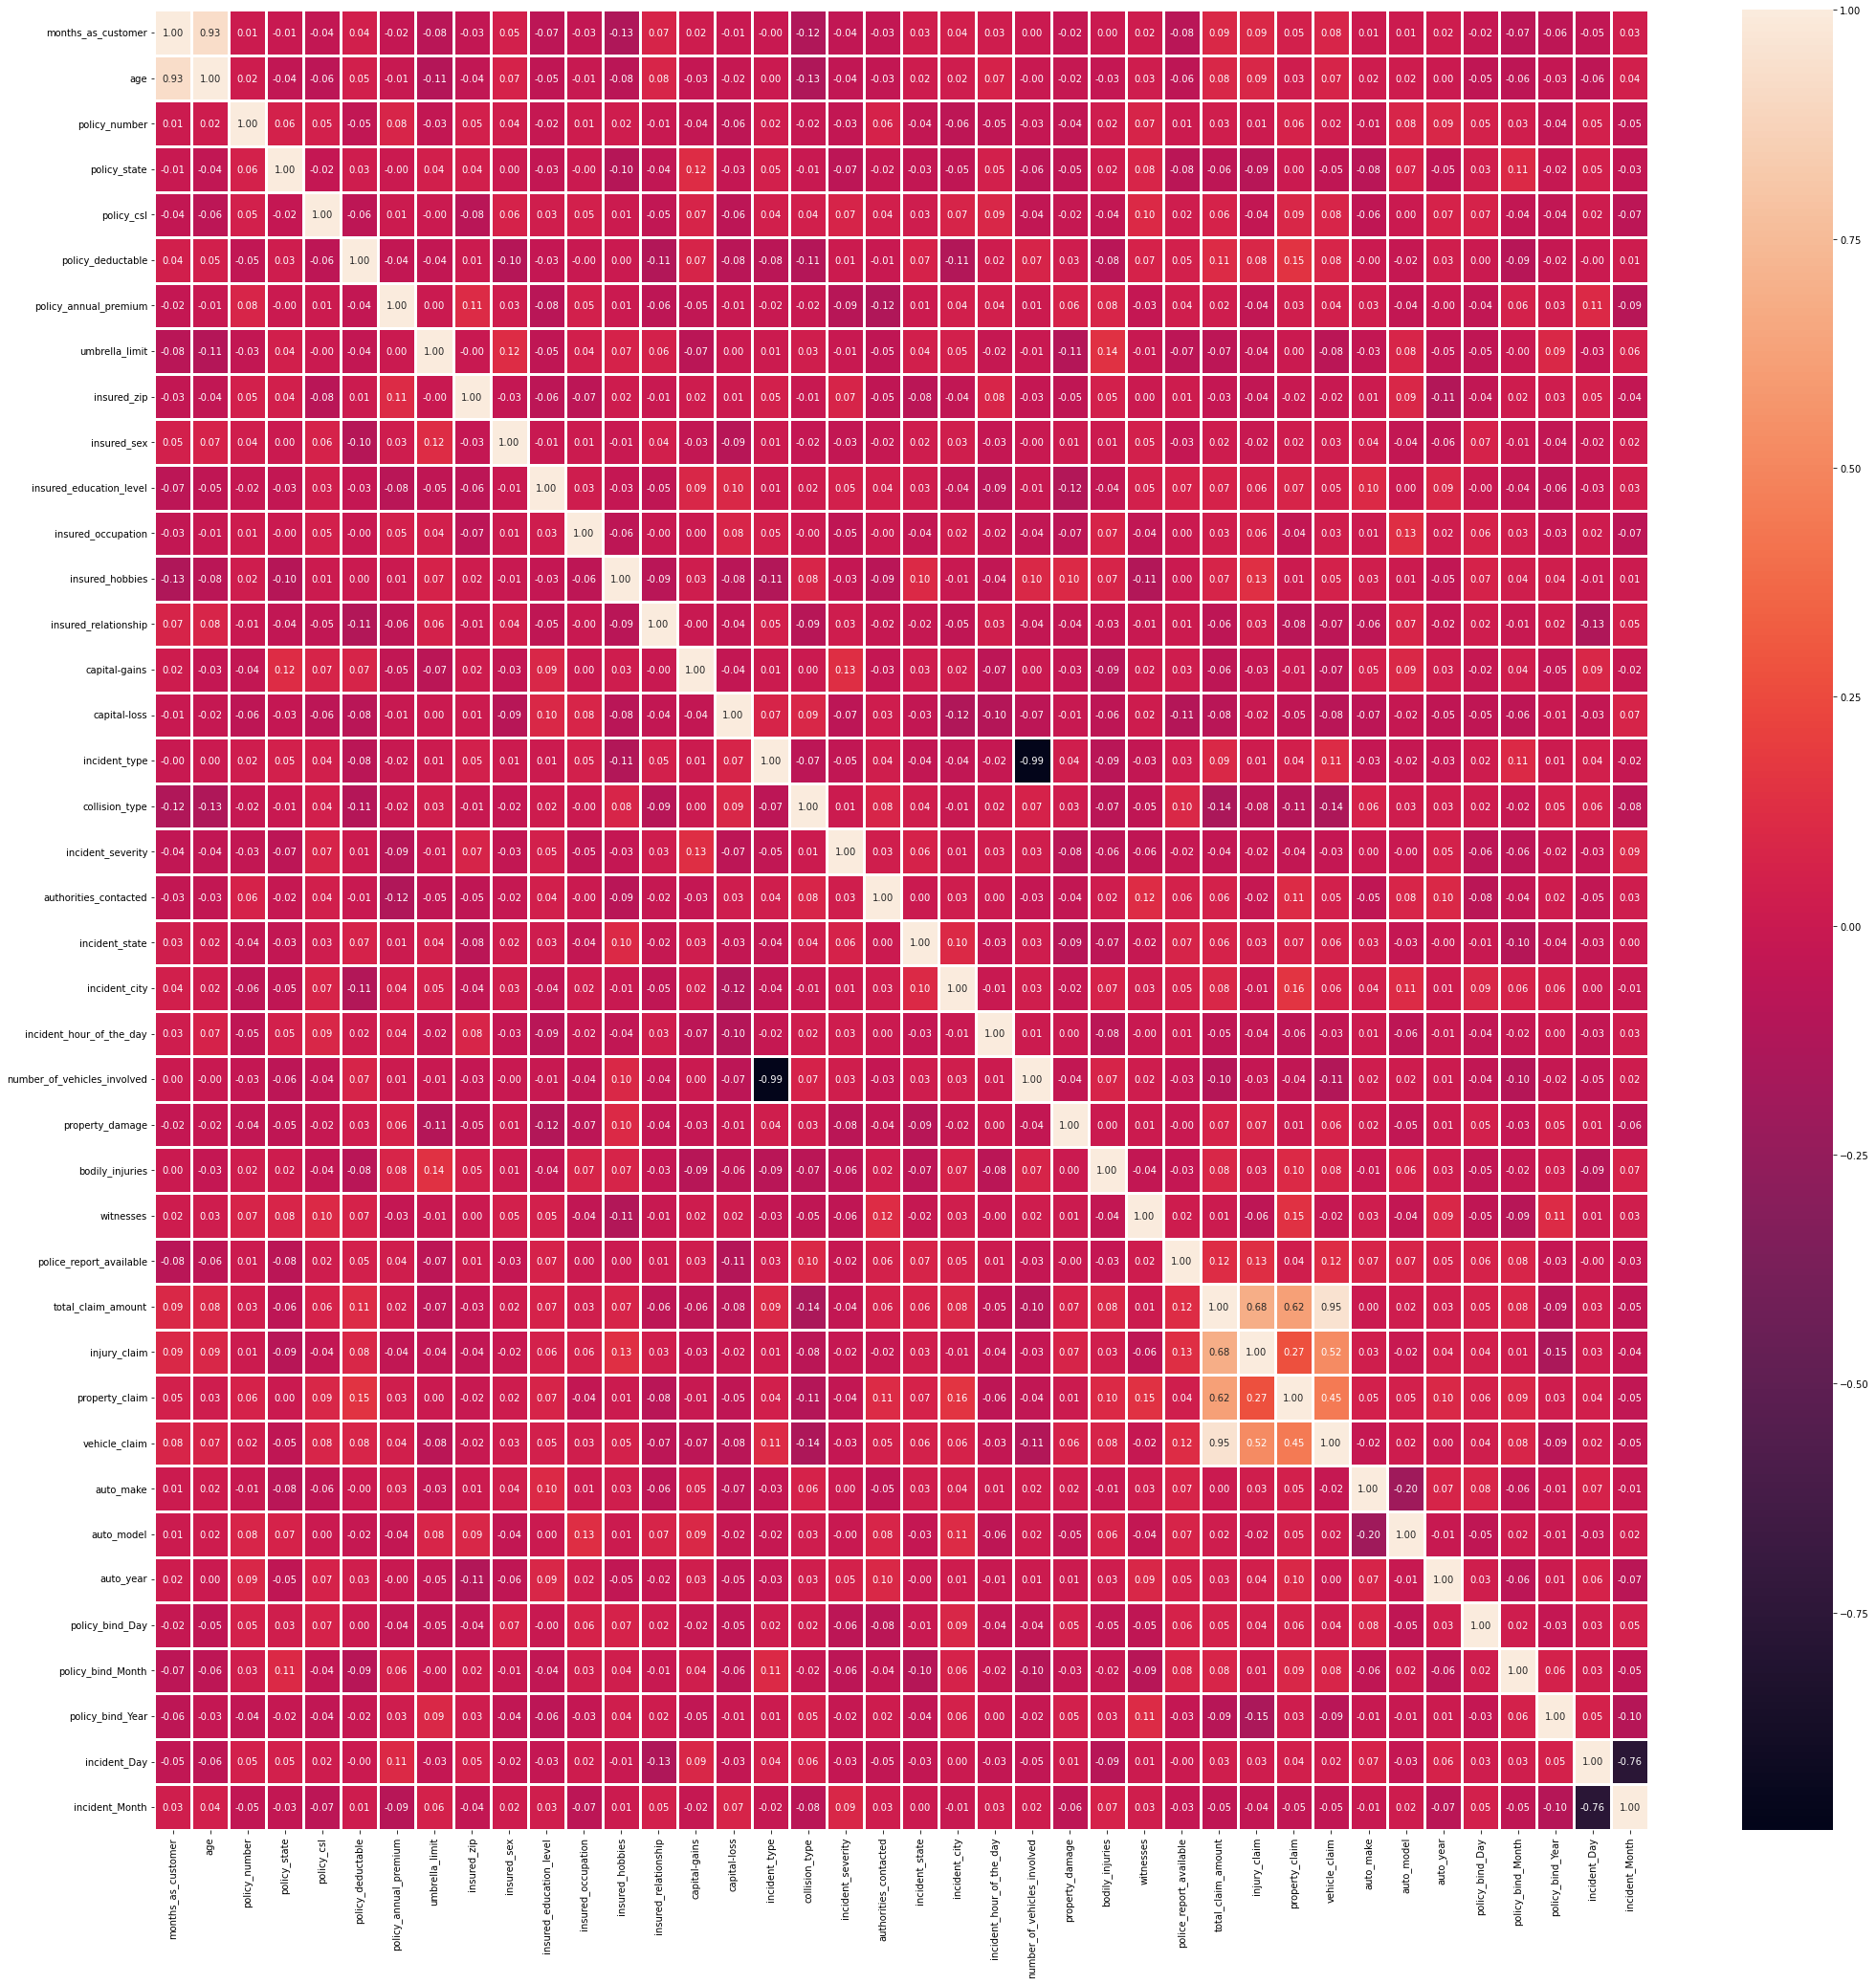

In [124]:
plt.figure(figsize=(35,35))
sns.heatmap(X_scaled_corr,annot=True,linecolor='white',linewidths=3,fmt='0.2f')

In [126]:
import joblib
joblib.dump(scaler,'Standard_Scalar.pkl')

['Standard_Scalar.pkl']

# VIF

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif['features'] = X_scaled.columns

vif

vif                     features
0     8.308096           months_as_customer
1     8.323580                          age
2     1.082560                policy_number
3     1.133280                 policy_state
4     1.154843                   policy_csl
5     1.166594            policy_deductable
6     1.116291        policy_annual_premium
7     1.147446               umbrella_limit
8     1.135993                  insured_zip
9     1.082442                  insured_sex
10    1.115568      insured_education_level
11    1.133122           insured_occupation
12    1.210405              insured_hobbies
13    1.129383         insured_relationship
14    1.168183                capital-gains
15    1.176868                 capital-loss
16   46.861839                incident_type
17    1.135849               collision_type
18    1.139950            incident_severity
19    1.113717        authorities_contacted
20    1.105524               incident_state
21    1.150710                incident_city
22    1.120859     incident_hour_of_the_day
23   46.250773  number_of_vehicles_involved
24    1.106572              property_damage
25    1.171651              bodily_injuries
26    1.176399                    witnesses
27    1.130401      police_report_available
28  488.670897           total_claim_amount
29   30.690377                 injury_claim
30   26.778722               property_claim
31  258.396482                vehicle_claim
32    1.134065                    auto_make
33    1.189329                   auto_model
34    1.107298                    auto_year
35    1.154367              policy_bind_Day
36    1.147759            policy_bind_Month
37    1.117705             policy_bind_Year
38    2.659763                 incident_Day
39    2.692333               incident_Month

In [127]:
#Dropping columns in the X_Scaled
X_scaled.drop(['total_claim_amount','incident_type','vehicle_claim','number_of_vehicles_involved','age','injury_claim','property_claim'],axis=1,inplace=True)

In [128]:
X_scaled.shape

(340, 33)

I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Converting an Imbalanced Dataset into a Balanced Dataset

0    253
1     87
Name: fraud_reported, dtype: int64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

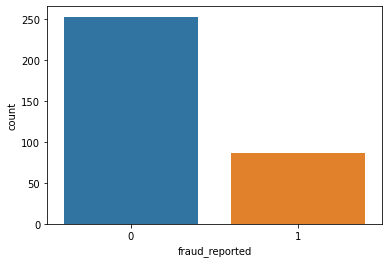

In [129]:
print(Y.value_counts())
sns.countplot(Y)

In [130]:
from imblearn.over_sampling import SMOTE

# adding samples to make all the categorical quality values same
oversample = SMOTE()
X_scaled, Y = oversample.fit_resample(X_scaled, Y)

In [131]:
Y.value_counts()

1    253
0    253
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

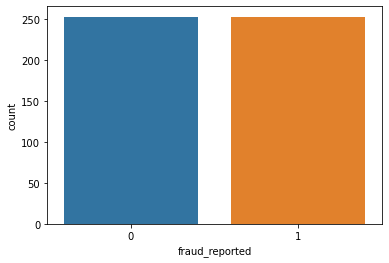

In [132]:
sns.countplot(Y)

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

# Model Building

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score,KFold,StratifiedShuffleSplit

# 1}Logistic Regression

In [134]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    accuracy_lr = accuracy_score(y_test, y_lr)
    
    if accuracy_lr>maxAccuracy:
        maxAccuracy=accuracy_lr
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8818897637795275  on Random State 31


In [135]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=31)

#training our model
lr=LogisticRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_lr)

#Accuracy Score
print("Accuracy score : ", accuracy_lr*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_lr))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_lr))

Accuracy score :  88.18897637795276
---------------------------------------------
[0.70588235 0.68316832 0.75247525 0.78217822 0.8019802 ]
Cross Validation Score :  74.51368666278393
---------------------------------------------
[[51  9]
 [ 6 61]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        60
           1       0.87      0.91      0.89        67

    accuracy                           0.88       127
   macro avg       0.88      0.88      0.88       127
weighted avg       0.88      0.88      0.88       127



In [136]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
l1 = cross_val_score(lr,X_scaled,Y,cv=K_fold)
print(l1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , l1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.74509804 0.68316832 0.67326733 0.77227723 0.76237624]
--------------------------------------------------
K-Fold Cross Validation Score :  72.72374296253155


In [137]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
s1 = cross_val_score(lr,X_scaled,Y,cv=Stratified_Shuffle)
print(s1)
print('--'*50)
print("Stratified Shuffle Split : ",s1.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.76377953 0.84251969 0.77952756 0.76377953 0.7480315 ]
----------------------------------------------------------------------------------------------------
Stratified Shuffle Split :  77.95275590551181


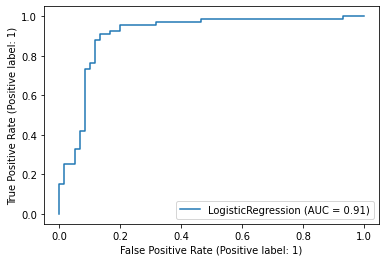

In [138]:
#Roc Curve
plot_roc_curve(lr,x_test,y_test)

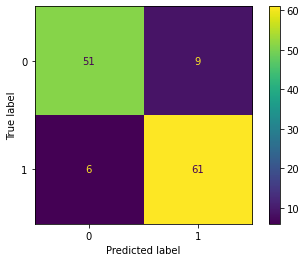

In [141]:
#Plot Confusion Matrix
plot_confusion_matrix(lr,x_test,y_test)

# 2}Decision Tree

In [142]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    accuracy = accuracy_score(y_test, y_dt)
    
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.9212598425196851  on Random State 43


In [144]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=43)

#training our model
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_dt)

#Accuracy Score
print("Accuracy score : ", accuracy_dt*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_dt))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_dt))

Accuracy score :  90.5511811023622
---------------------------------------------
[0.8627451  0.8019802  0.85148515 0.89108911 0.82178218]
Cross Validation Score :  84.58163463405164
---------------------------------------------
[[54  5]
 [ 7 61]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        59
           1       0.92      0.90      0.91        68

    accuracy                           0.91       127
   macro avg       0.90      0.91      0.91       127
weighted avg       0.91      0.91      0.91       127



In [145]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
d1 = cross_val_score(dt,X_scaled,Y,cv=K_fold)
print(d1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , d1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.80392157 0.78217822 0.84158416 0.9009901  0.87128713]
--------------------------------------------------
K-Fold Cross Validation Score :  83.99922345175695


In [146]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
d1 = cross_val_score(lr,X_scaled,Y,cv=Stratified_Shuffle)
print(d1)
print('--'*30)
print("Stratified Shuffle Split : ",d1.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.71653543 0.7480315  0.7480315  0.73228346 0.78740157]
------------------------------------------------------------
Stratified Shuffle Split :  74.64566929133858


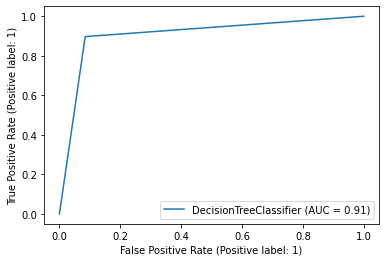

In [147]:
#Roc Curve
plot_roc_curve(dt,x_test,y_test)

In [148]:
print(dt.score(x_train,y_train)*100)#Training Score
print(dt.score(x_test,y_test)*100)#Testing Score

100.0
90.5511811023622


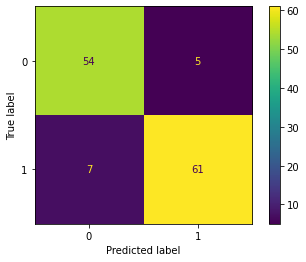

In [149]:
#Plot Confusion Matrix
plot_confusion_matrix(dt,x_test,y_test)

# 3}KNN

In [150]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_knn)
    
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.7401574803149606  on Random State 5


In [151]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=5)

#training our model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_knn)

#Accuracy Score
print("Accuracy score : ", accuracy_knn*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_knn))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_knn))

Accuracy score :  74.01574803149606
---------------------------------------------
[0.6372549  0.64356436 0.66336634 0.66336634 0.67326733]
Cross Validation Score :  65.61638516792857
---------------------------------------------
[[27 32]
 [ 1 67]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.46      0.62        59
           1       0.68      0.99      0.80        68

    accuracy                           0.74       127
   macro avg       0.82      0.72      0.71       127
weighted avg       0.81      0.74      0.72       127



In [152]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
k1 = cross_val_score(knn,X_scaled,Y,cv=K_fold)
print(k1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , k1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.53921569 0.40594059 0.45544554 0.77227723 0.98019802]
--------------------------------------------------
K-Fold Cross Validation Score :  63.06154144826247


In [153]:
#Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
k2 = cross_val_score(knn,X_scaled,Y,cv=Stratified_Shuffle)
print(k2)
print("--------------------------------------------------")
print("Shuffle Split : ",k2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.57480315 0.65354331 0.63779528 0.66929134 0.65354331]
--------------------------------------------------
Shuffle Split :  63.77952755905512


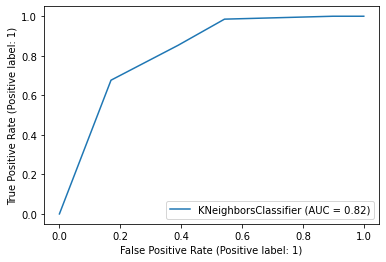

In [154]:
#Plot Roc Curve
plot_roc_curve(knn,x_test,y_test)

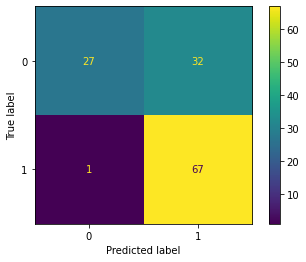

In [156]:
#Plot Confusion Matrix
plot_confusion_matrix(knn,x_test,y_test)

# 4}Support Vector Machine

In [157]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    y_svc = svc.predict(x_test)
    accuracy = accuracy_score(y_test, y_svc)
    
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.9291338582677166  on Random State 31


In [158]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=31)

#training our model
svc=SVC()
svc.fit(x_train, y_train)

#Predicting y_test
y_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_svc)

#Accuracy Score
print("Accuracy score : ", accuracy_svc*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_svc = cross_val_score(svc,X_scaled,Y,cv=5)
print(cross_val_svc)
print("Cross Validation Score : ",cross_val_svc.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_svc))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_svc))

Accuracy score :  92.91338582677166
---------------------------------------------
[0.87254902 0.83168317 0.9009901  0.93069307 0.92079208]
Cross Validation Score :  89.13414870898855
---------------------------------------------
[[55  5]
 [ 4 63]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        60
           1       0.93      0.94      0.93        67

    accuracy                           0.93       127
   macro avg       0.93      0.93      0.93       127
weighted avg       0.93      0.93      0.93       127



In [159]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
s1 = cross_val_score(svc,X_scaled,Y,cv=K_fold)
print(s1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , s1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.90196078 0.78217822 0.82178218 0.92079208 0.98019802]
--------------------------------------------------
K-Fold Cross Validation Score :  0.8813822558726461


In [160]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle)
s2 = cross_val_score(svc,X_scaled,Y,cv=Stratified_Shuffle)
print(s2)
print("--------------------------------------------------")
print("Shuffle Split : ",s2.mean())

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)
[0.8627451  0.88235294 0.88235294 0.92156863 0.98039216]
--------------------------------------------------
Shuffle Split :  0.9058823529411765


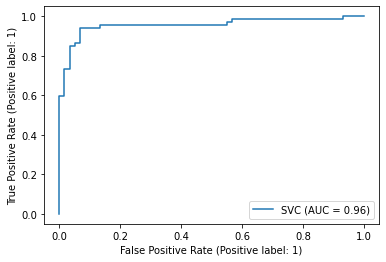

In [161]:
#Plot Roc Curve
plot_roc_curve(svc,x_test,y_test)

In [162]:
print(svc.score(x_train,y_train)*100)#Training Score
print(svc.score(x_test,y_test)*100)#Testing Score

98.68073878627969
92.91338582677166


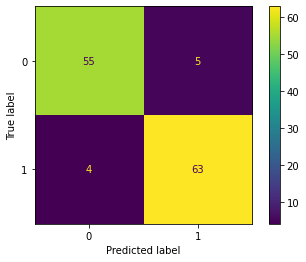

In [163]:
#plot confusion matrix
plot_confusion_matrix(svc,x_test,y_test)

# 5}Random Forest

In [164]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_rf)
    
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.937007874015748  on Random State 16


In [165]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=16)

#training our model
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_rf)

#Accuracy Score
print("Accuracy score : ", accuracy_rf*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_rf))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_rf))

Accuracy score :  92.91338582677166
---------------------------------------------
[0.80392157 0.79207921 0.95049505 0.95049505 0.91089109]
Cross Validation Score :  88.1576392933411
---------------------------------------------
[[58  3]
 [ 6 60]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        61
           1       0.95      0.91      0.93        66

    accuracy                           0.93       127
   macro avg       0.93      0.93      0.93       127
weighted avg       0.93      0.93      0.93       127



In [166]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
r1 = cross_val_score(rf,X_scaled,Y,cv=K_fold)
print(r1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , r1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.90196078 0.84158416 0.84158416 0.96039604 0.95049505]
--------------------------------------------------
K-Fold Cross Validation Score :  0.8992040380508639


In [167]:
# Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
r2 = cross_val_score(rf,X_scaled,Y,cv=Stratified_Shuffle)
print(r2)
print("--------------------------------------------------")
print("Shuffle Split : ",r2.mean())

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.91338583 0.92125984 0.8976378  0.88976378 0.92125984]
--------------------------------------------------
Shuffle Split :  0.9086614173228347


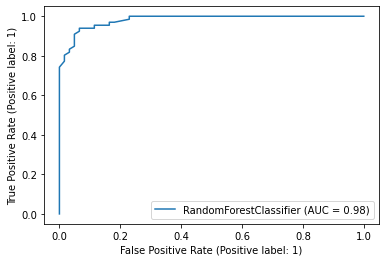

In [168]:
#Plot Roc curve
plot_roc_curve(rf,x_test,y_test)

In [169]:
print(rf.score(x_train,y_train)*100)#Training Score
print(rf.score(x_test,y_test)*100)#Testing Score

100.0
92.91338582677166


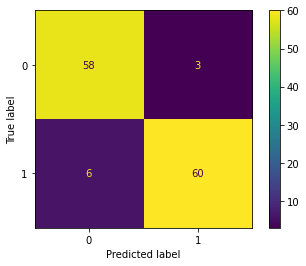

In [170]:
#Plot Confusion Matrix
plot_confusion_matrix(rf,x_test,y_test)

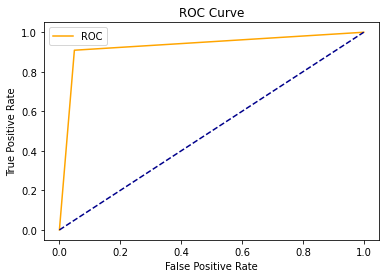

92.99552906110283

In [171]:
fpr,tpr ,thresholds = roc_curve(y_test,y_rf)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_rf)
auc_score*100

# 6}Ada Boost Classifier

In [172]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    ad=AdaBoostClassifier()
    ad.fit(x_train, y_train)
    y_ad = ad.predict(x_test)
    accuracy_ad = accuracy_score(y_test, y_ad)
    
    if accuracy_ad>maxAccuracy:
        maxAccuracy=accuracy_ad
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8976377952755905  on Random State 38


In [173]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=38)

#training our model
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)

#Predicting y_test
y_ad = ad.predict(x_test)
accuracy_ad = accuracy_score(y_test, y_ad)

#Accuracy Score
print("Accuracy score : ", accuracy_ad*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_ad = cross_val_score(ad,X_scaled,Y,cv=5)
print(cross_val_ad)
print("Cross Validation Score : ",cross_val_ad.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_ad))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_ad))

Accuracy score :  89.76377952755905
---------------------------------------------
[0.74509804 0.75247525 0.87128713 0.9009901  0.9009901 ]
Cross Validation Score :  83.41681226946224
---------------------------------------------
[[57  7]
 [ 6 57]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.89      0.90      0.90        63

    accuracy                           0.90       127
   macro avg       0.90      0.90      0.90       127
weighted avg       0.90      0.90      0.90       127



In [174]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
a1 = cross_val_score(ad,X_scaled,Y,cv=K_fold)
print(a1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , a1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.7745098  0.82178218 0.69306931 0.89108911 0.97029703]
--------------------------------------------------
K-Fold Cross Validation Score :  83.01494855367888


In [175]:
# Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
a2 = cross_val_score(ad,X_scaled,Y,cv=Stratified_Shuffle)
print(a2)
print("--------------------------------------------------")
print("Shuffle Split : ",a2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.84251969 0.79527559 0.85826772 0.75590551 0.85826772]
--------------------------------------------------
Shuffle Split :  82.20472440944881


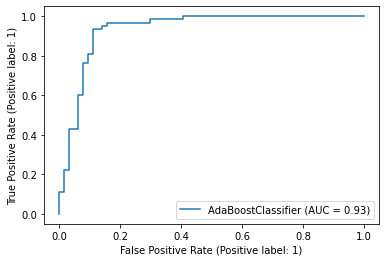

In [176]:
#plot roc curve
plot_roc_curve(ad,x_test,y_test)

In [177]:
print(ad.score(x_train,y_train)*100)#Training Score
print(ad.score(x_test,y_test)*100)#Testing Score

96.04221635883906
89.76377952755905


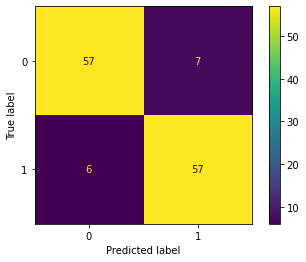

In [178]:
#Plot confusion matrix
plot_confusion_matrix(ad,x_test,y_test)

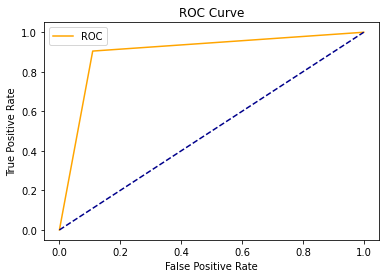

89.76934523809523

In [179]:
fpr,tpr ,thresholds = roc_curve(y_test,y_ad)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_ad)
auc_score*100

# 7}Gradient boost

In [180]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    gb=GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    accuracy = accuracy_score(y_test, y_gb)
    
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.937007874015748  on Random State 31


In [181]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=31)

#training our model
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_gb)

#Accuracy Score
print("Accuracy score : ", accuracy_gb*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_gb = cross_val_score(gb,X_scaled,Y,cv=5)
print(cross_val_gb)
print("Cross Validation Score : ",cross_val_gb.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_gb))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_gb))

Accuracy score :  93.7007874015748
---------------------------------------------
[0.78431373 0.8019802  0.89108911 0.94059406 0.89108911]
Cross Validation Score :  86.18132401475442
---------------------------------------------
[[55  5]
 [ 3 64]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        60
           1       0.93      0.96      0.94        67

    accuracy                           0.94       127
   macro avg       0.94      0.94      0.94       127
weighted avg       0.94      0.94      0.94       127



In [182]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
g1 = cross_val_score(gb,X_scaled,Y,cv=K_fold)
print(g1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , g1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.87254902 0.82178218 0.82178218 0.93069307 0.94059406]
--------------------------------------------------
K-Fold Cross Validation Score :  87.74801009512714


In [183]:
#Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
g2 = cross_val_score(gb,X_scaled,Y,cv=Stratified_Shuffle)
print(g2)
print("--------------------------------------------------")
print("Shuffle Split : ",g2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.91338583 0.85826772 0.8976378  0.87401575 0.91338583]
--------------------------------------------------
Shuffle Split :  89.13385826771653


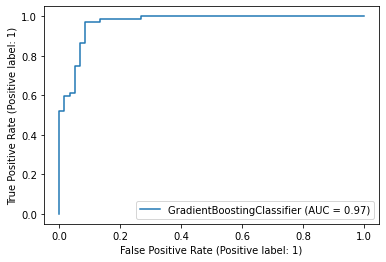

In [184]:
#Plot roc curve
plot_roc_curve(gb,x_test,y_test)

In [185]:
print(gb.score(x_train,y_train)*100)#Training Score
print(gb.score(x_test,y_test)*100)#Testing Score

100.0
93.7007874015748


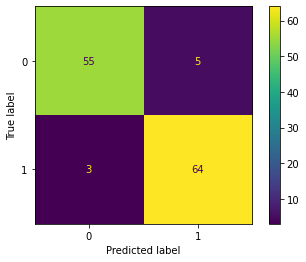

In [186]:
#Plot confusion matrix
plot_confusion_matrix(gb,x_test,y_test)

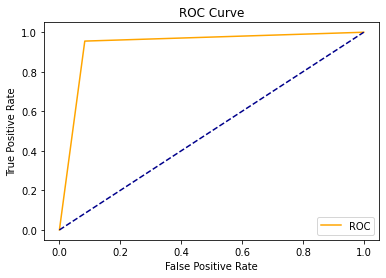

93.59452736318408

In [187]:
fpr,tpr ,thresholds = roc_curve(y_test,y_gb)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_gb)
auc_score*100

From the above models I have selected Random Forest for tuning my hyperparameters because its accuracy is bigger than the accuracy of other models.

# Hyperparameter Tuning

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
#Choosing Random Forest Classifier

params = {
    'n_estimators' : [100,120,150,170],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [2,4,6,8],
    'min_samples_split' : [1,2,3],
    'max_features' : ['sqrt','log2']
}

In [190]:
gs_rf = GridSearchCV(rf,param_grid=params,cv=5)

gs_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

In [191]:
gs_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

In [192]:
gs_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 120}

In [193]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_split=3, n_estimators=120)

In [194]:
gs_rf.best_score_

0.8813333333333333

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=150)
------------------------------------------------------------------------
[1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1]
Accuracy Score : 0.9291338582677166
------------------------------------------------------------------------
Classification Report :                precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.94      0.93      0.93        67

    accuracy                           0.93       127
   macro avg       0.93      0.93      0.93       127
weighted avg       0.93      0.93      0.93       127

-------------------------------------------------------------------------
Confusion Matrix 
----------------------------------------

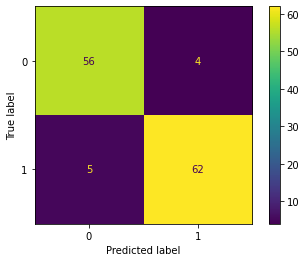

In [196]:
final_model = RandomForestClassifier(max_depth=6, min_samples_split=2,max_features='sqrt',n_estimators=150,criterion='entropy')
print(final_model)
print("------------------------------------------------------------------------")
final_model.fit(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(final_model_pred)
print("Accuracy Score :",accuracy_score(y_test,final_model_pred))
print("------------------------------------------------------------------------")
print("Classification Report : ",classification_report(y_test,final_model_pred))
print("-------------------------------------------------------------------------")
print("Confusion Matrix ")
print(plot_confusion_matrix(final_model,x_test,y_test))
print("------------------------------------------------------------------------")

In [197]:
#Cross Validation Score
cross_val_score(final_model,x_test,y_test,cv=5).mean()*100

89.0153846153846

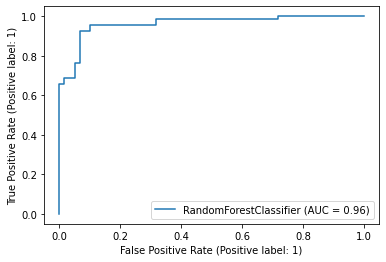

In [198]:
#Plot Roc Curve
plot_roc_curve(final_model,x_test,y_test)

In [199]:
#K fold Cross Validation Score
K = KFold(n_splits=5)
print(K)
cross_val_score(final_model,x_test,y_test,cv=K).mean()*100

KFold(n_splits=5, random_state=None, shuffle=False)


88.21538461538461

In [200]:
#Stratified Shuffle Split Cross Validation Score
Stratified_Shuffle_final_model = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle_final_model)
cross_val_score(final_model,x_test,y_test,cv=Stratified_Shuffle_final_model).mean()*100

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)


87.69230769230771

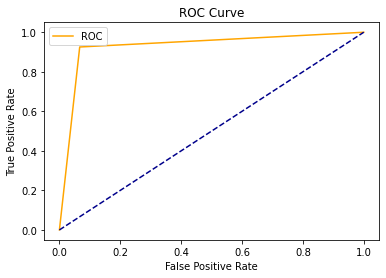

92.93532338308458

In [201]:
fpr,tpr ,thresholds = roc_curve(y_test,final_model_pred)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,final_model_pred)
auc_score*100

# Saving My Best Model

In [202]:
import joblib

In [204]:
filename = "Insurance Claims- Fraud Detection.pkl"

In [209]:
a = joblib.dump(final_model,filename)
a

['Insurance Claims- Fraud Detection.pkl']